In [ ]:
!pip install optuna

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import optuna
import numpy as np 
import pandas as pd
import seaborn as sns
import lightgbm as lgb
from scipy import stats
import matplotlib.pyplot as plt 
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler

import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.4f}'.format

In [ ]:
train = pd.read_csv("/content/train.csv")
test = pd.read_csv("/content/test.csv")
orginal =  pd.read_csv("/content/WildBlueberryPollinationSimulationData.csv")

In [ ]:
print('Train Data Shape:', train.shape)
print('Test Data Shape:', test.shape)
print('Orginal Data Shape:', orginal.shape)

Train Data Shape: (15289, 18)
Test Data Shape: (10194, 17)
Orginal Data Shape: (777, 18)


In [ ]:
train.head()

,id,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,0,25.0000,0.5000,0.2500,0.7500,0.5000,69.7000,42.1000,58.2000,50.2000,24.3000,41.2000,24.0000,0.3900,0.4250,0.4175,32.4609,4476.8115
1,1,25.0000,0.5000,0.2500,0.5000,0.5000,69.7000,42.1000,58.2000,50.2000,24.3000,41.2000,24.0000,0.3900,0.4449,0.4221,33.8583,5548.1220
2,2,12.5000,0.2500,0.2500,0.6300,0.6300,86.0000,52.0000,71.9000,62.0000,30.0000,50.8000,24.0000,0.3900,0.5529,0.4709,38.3418,6869.7776
3,3,12.5000,0.2500,0.2500,0.6300,0.5000,77.4000,46.8000,64.7000,55.8000,27.0000,45.8000,24.0000,0.3900,0.5660,0.4781,39.4676,6880.7759
4,4,25.0000,0.5000,0.2500,0.6300,0.6300,77.4000,46.8000,64.7000,55.8000,27.0000,45.8000,24.0000,0.3900,0.5797,0.4942,40.4845,7479.9342


In [ ]:
test.head()

,id,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds
0,15289,25.0000,0.2500,0.2500,0.2500,0.2500,86.0000,52.0000,71.9000,62.0000,30.0000,50.8000,24.0000,0.3900,0.3994,0.4081,31.3946
1,15290,12.5000,0.2500,0.2500,0.7500,0.6300,94.6000,57.2000,79.0000,68.2000,33.0000,55.9000,1.0000,0.1000,0.4880,0.4429,36.8470
2,15291,12.5000,0.2500,0.2500,0.6300,0.6300,86.0000,52.0000,71.9000,62.0000,30.0000,50.8000,16.0000,0.2600,0.5834,0.4871,40.0376
3,15292,25.0000,0.5000,0.3800,0.3800,0.6300,86.0000,52.0000,71.9000,62.0000,30.0000,50.8000,16.0000,0.2600,0.4330,0.4228,33.1161
4,15293,37.5000,0.7500,0.2500,0.2500,0.2500,94.6000,57.2000,79.0000,68.2000,33.0000,55.9000,24.0000,0.3900,0.3610,0.3889,29.5580


In [ ]:
orginal.head()

,Row#,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,0,37.5000,0.7500,0.2500,0.2500,0.2500,86.0000,52.0000,71.9000,62.0000,30.0000,50.8000,16.0000,0.2600,0.4107,0.4082,31.6789,3813.1658
1,1,37.5000,0.7500,0.2500,0.2500,0.2500,86.0000,52.0000,71.9000,62.0000,30.0000,50.8000,1.0000,0.1000,0.4443,0.4255,33.4494,4947.6057
2,2,37.5000,0.7500,0.2500,0.2500,0.2500,94.6000,57.2000,79.0000,68.2000,33.0000,55.9000,16.0000,0.2600,0.3838,0.3992,30.5463,3866.7990
3,3,37.5000,0.7500,0.2500,0.2500,0.2500,94.6000,57.2000,79.0000,68.2000,33.0000,55.9000,1.0000,0.1000,0.4076,0.4088,31.5626,4303.9430
4,4,37.5000,0.7500,0.2500,0.2500,0.2500,86.0000,52.0000,71.9000,62.0000,30.0000,50.8000,24.0000,0.3900,0.3544,0.3827,28.8737,3436.4935


In [ ]:
train.dtypes

id                        int64
clonesize               float64
honeybee                float64
bumbles                 float64
andrena                 float64
osmia                   float64
MaxOfUpperTRange        float64
MinOfUpperTRange        float64
AverageOfUpperTRange    float64
MaxOfLowerTRange        float64
MinOfLowerTRange        float64
AverageOfLowerTRange    float64
RainingDays             float64
AverageRainingDays      float64
fruitset                float64
fruitmass               float64
seeds                   float64
yield                   float64
dtype: object

In [ ]:
train = train.drop('id', axis = 1)
orginal = orginal.drop('Row#', axis = 1)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15289 entries, 0 to 15288
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   clonesize             15289 non-null  float64
 1   honeybee              15289 non-null  float64
 2   bumbles               15289 non-null  float64
 3   andrena               15289 non-null  float64
 4   osmia                 15289 non-null  float64
 5   MaxOfUpperTRange      15289 non-null  float64
 6   MinOfUpperTRange      15289 non-null  float64
 7   AverageOfUpperTRange  15289 non-null  float64
 8   MaxOfLowerTRange      15289 non-null  float64
 9   MinOfLowerTRange      15289 non-null  float64
 10  AverageOfLowerTRange  15289 non-null  float64
 11  RainingDays           15289 non-null  float64
 12  AverageRainingDays    15289 non-null  float64
 13  fruitset              15289 non-null  float64
 14  fruitmass             15289 non-null  float64
 15  seeds              

In [ ]:
orginal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   clonesize             777 non-null    float64
 1   honeybee              777 non-null    float64
 2   bumbles               777 non-null    float64
 3   andrena               777 non-null    float64
 4   osmia                 777 non-null    float64
 5   MaxOfUpperTRange      777 non-null    float64
 6   MinOfUpperTRange      777 non-null    float64
 7   AverageOfUpperTRange  777 non-null    float64
 8   MaxOfLowerTRange      777 non-null    float64
 9   MinOfLowerTRange      777 non-null    float64
 10  AverageOfLowerTRange  777 non-null    float64
 11  RainingDays           777 non-null    float64
 12  AverageRainingDays    777 non-null    float64
 13  fruitset              777 non-null    float64
 14  fruitmass             777 non-null    float64
 15  seeds                 7

**Observations:**

- All columns have non-null values, indicating that there are no missing values in the dataset.
- All columns have a data type of float64, indicating that they contain numerical data.
- The memory usage of the DataFrame is 1.2 MB.
- Looking into memory is very important because effective way to reduce memory usage is to Optimize data type  (eg: converting float64 to float32 )

In [ ]:
df = pd.concat([train, orginal])

In [ ]:
df.head()

,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,25.0000,0.5000,0.2500,0.7500,0.5000,69.7000,42.1000,58.2000,50.2000,24.3000,41.2000,24.0000,0.3900,0.4250,0.4175,32.4609,4476.8115
1,25.0000,0.5000,0.2500,0.5000,0.5000,69.7000,42.1000,58.2000,50.2000,24.3000,41.2000,24.0000,0.3900,0.4449,0.4221,33.8583,5548.1220
2,12.5000,0.2500,0.2500,0.6300,0.6300,86.0000,52.0000,71.9000,62.0000,30.0000,50.8000,24.0000,0.3900,0.5529,0.4709,38.3418,6869.7776
3,12.5000,0.2500,0.2500,0.6300,0.5000,77.4000,46.8000,64.7000,55.8000,27.0000,45.8000,24.0000,0.3900,0.5660,0.4781,39.4676,6880.7759
4,25.0000,0.5000,0.2500,0.6300,0.6300,77.4000,46.8000,64.7000,55.8000,27.0000,45.8000,24.0000,0.3900,0.5797,0.4942,40.4845,7479.9342


In [ ]:
df['total_bee_density'] = df['honeybee'] + df['bumbles'] + df['andrena'] + df['osmia']

df['temp_range'] = df['MaxOfUpperTRange'] - df['MinOfLowerTRange']

df['temp_deviation'] = df[['MaxOfUpperTRange', 'MinOfLowerTRange']].sub(df['AverageOfUpperTRange'], axis=0).abs().sum(axis=1)

df['pollination_potential'] = df['clonesize'] * df['total_bee_density'] * df['AverageOfUpperTRange']

df['yield_potential'] = df['clonesize'] * df['total_bee_density'] * df['AverageOfUpperTRange'] * df['RainingDays']

df['total_seeds'] = df['fruitset'] * df['seeds']


`total_bee_density` Total density of four types of bees, honeybees, bumbles, andrena, and osmia, in a given area.

`temp_range` The range between the maximum and minimum temperatures recorded in a given area.

`temp_deviation`: The average deviation of the maximum and minimum temperatures from the average temperature recorded in a given area.

`pollination_potential`: A measure of the potential for pollination in a given area, calculated by multiplying the clonesize, total_bee_density, and AverageOfUpperTRange columns.

`yield_potential`: A measure of the potential yield in a given area, calculated by multiplying the clonesize, total_bee_density, AverageOfUpperTRange, and RainingDays columns.

`total_seeds`: The total number of seeds produced, calculated by multiplying the fruitset and seeds columns.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16066 entries, 0 to 776
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   clonesize              16066 non-null  float64
 1   honeybee               16066 non-null  float64
 2   bumbles                16066 non-null  float64
 3   andrena                16066 non-null  float64
 4   osmia                  16066 non-null  float64
 5   MaxOfUpperTRange       16066 non-null  float64
 6   MinOfUpperTRange       16066 non-null  float64
 7   AverageOfUpperTRange   16066 non-null  float64
 8   MaxOfLowerTRange       16066 non-null  float64
 9   MinOfLowerTRange       16066 non-null  float64
 10  AverageOfLowerTRange   16066 non-null  float64
 11  RainingDays            16066 non-null  float64
 12  AverageRainingDays     16066 non-null  float64
 13  fruitset               16066 non-null  float64
 14  fruitmass              16066 non-null  float64
 15  seed

In [ ]:
train = df
del df

In [ ]:
100*(train.shape[0]-train.count())/train.shape[0]

clonesize               0.0000
honeybee                0.0000
bumbles                 0.0000
andrena                 0.0000
osmia                   0.0000
MaxOfUpperTRange        0.0000
MinOfUpperTRange        0.0000
AverageOfUpperTRange    0.0000
MaxOfLowerTRange        0.0000
MinOfLowerTRange        0.0000
AverageOfLowerTRange    0.0000
RainingDays             0.0000
AverageRainingDays      0.0000
fruitset                0.0000
fruitmass               0.0000
seeds                   0.0000
yield                   0.0000
total_bee_density       0.0000
temp_range              0.0000
temp_deviation          0.0000
pollination_potential   0.0000
yield_potential         0.0000
total_seeds             0.0000
dtype: float64

**Observations:**

- All columns have non-null values, indicating that there are no missing values in the dataset. 

In [ ]:
summary_stats = train.describe(include='all').T
summary_stats['median'] = train.median()
summary_stats


,count,mean,std,min,25%,50%,75%,max,median
clonesize,16066.0000,19.6594,6.6181,10.0000,12.5000,25.0000,25.0000,40.0000,25.0000
honeybee,16066.0000,0.3907,0.4133,0.0000,0.2500,0.5000,0.5000,18.4300,0.5000
bumbles,16066.0000,0.2866,0.0602,0.0000,0.2500,0.2500,0.3800,0.5850,0.2500
andrena,16066.0000,0.4915,0.1488,0.0000,0.3800,0.5000,0.6300,0.7500,0.5000
osmia,16066.0000,0.5909,0.1412,0.0000,0.5000,0.6300,0.7500,0.7500,0.6300
MaxOfUpperTRange,16066.0000,82.1751,9.1487,69.7000,77.4000,86.0000,86.0000,94.6000,86.0000
MinOfUpperTRange,16066.0000,49.6746,5.5486,39.0000,46.8000,52.0000,52.0000,57.2000,52.0000
AverageOfUpperTRange,16066.0000,68.6595,7.6433,58.2000,64.7000,71.9000,71.9000,79.0000,71.9000
MaxOfLowerTRange,16066.0000,59.2334,6.6123,50.2000,55.8000,62.0000,62.0000,68.2000,62.0000
MinOfLowerTRange,16066.0000,28.6620,3.1960,24.3000,27.0000,30.0000,30.0000,33.0000,30.0000


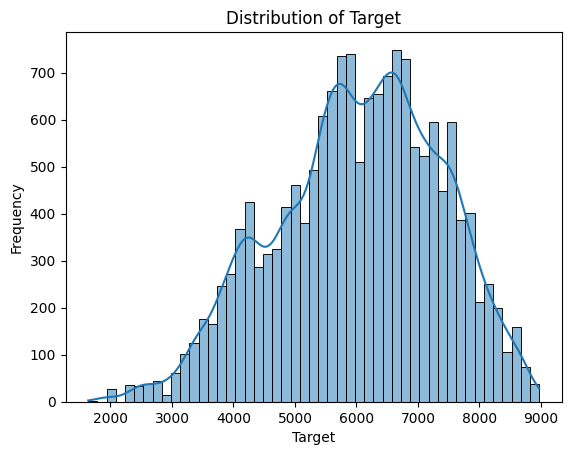

In [ ]:
sns.histplot(data=train, x=train['yield'], kde=True)
plt.xlabel('Target')
plt.ylabel('Frequency')
plt.title('Distribution of Target')
plt.show()


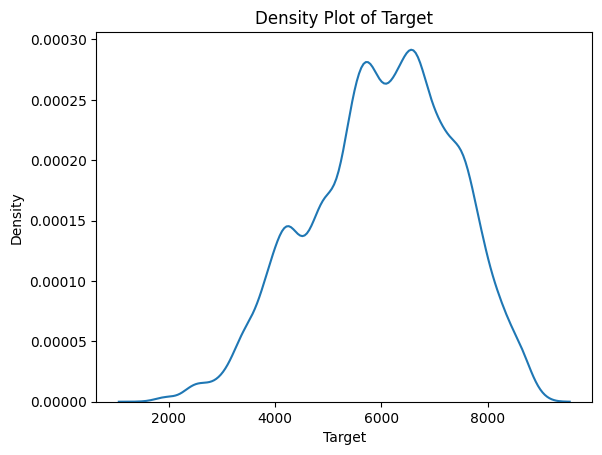

In [ ]:
sns.kdeplot(data=train, x=train['yield'])
plt.xlabel('Target')
plt.ylabel('Density')
plt.title('Density Plot of Target')
plt.show()


**Observations:**


- If we observe the mean and the median of the target column they are close indicating that the target column is likely to be symmetric and normally distributed. 
- We can use wide range of modeling techniques that assume a symmetric and normally distributed residual error (Eg: linear regression) 
- It is always recommended to look at different statistical methods and different plots before making any conclusions. 
- So by observing both the statical values (mean & median) and plots (distribution and density plot) they indicate that the data is likely to be symmetric and normally distributed but not exactly and perfectly 


**What are Outliers and z-score :**

- Outliers are data points that are very different from the rest of the data. 
- They can have a significant impact on the conclusions drawn from the data and our accuracy. 
- To detect outliers, statistical techniques like z-scores are often used. 
- The z-score measures how many standard deviations a data point is away from the mean. It is calculated as (x - mean) / standard deviation. 
- A threshold of 2 or 3 standard deviations is used to identify outliers. If a data point has a z score above the threshold, it is considered an outlier. 

Identified outliers:
287     1945.5306
327     1945.5306
614     1945.5306
1203    1945.5306
1503    1945.5306
2075    1945.5306
3056    1945.5306
4159    1945.5306
4419    1945.5306
4965    1945.5306
5456    1945.5306
7520    1945.5306
8581    1945.5306
9088    1945.5306
10792   1945.5306
10801   1945.5306
11814   1945.5306
11824   1945.5306
12360   1945.5306
12636   1945.5306
13551   1945.5306
13591   1945.5306
13662   1945.5306
13962   1945.5306
14019   1945.5306
14880   1945.5306
18      1945.5306
766     1637.7040
Name: yield, dtype: float64


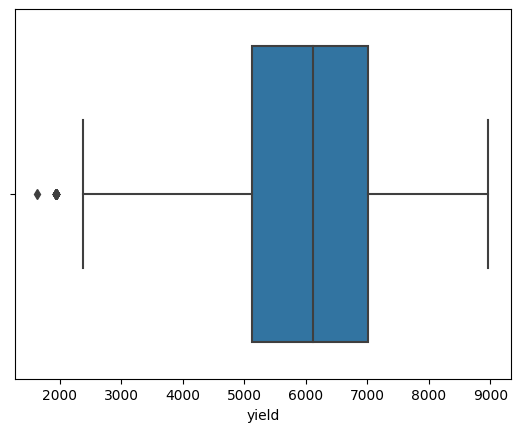

In [ ]:
target_column = train['yield']
sns.boxplot(x=target_column)

# Calculating z-scores
z_scores = (target_column - np.mean(target_column)) / np.std(target_column)
threshold = 3

outliers = target_column[abs(z_scores) > threshold]

print("Identified outliers:")
print(outliers)

**Observations:**

- We can observe that there are 28 outliers in the target column all with the same value of 1945.530610, and this value is also the minimum value of your target column. This indicates that these data points are potentially valid and not necessarily outliers, so we need not remove these outliers. 

**What is Skewness and Q-Q plot:**

- Skewness (measure of “asymmetry”) tells us whether the data is skewed to the left or to the right, or if it is roughly symmetrical. 
- Q-Q plot compares the values in a dataset to the values we would expect if the data followed a certain pattern or distribution 
- So by using skew() and Q-Q plot we will able to detect the Skewness 


In [ ]:
skewness = train['yield'].skew()
print("Skewness coefficient:", skewness)

Skewness coefficient: -0.2927469121736323


**Observations:**

- We can observe that the Skewness coefficient is -0.29119496049488897 indicates a slightly negative skewness in the distribution of the target column. 
- This means that the distribution of the target column is not perfectly symmetric, but it is not heavily skewed either. 
- The skewness may not have a significant impact on the analysis or modeling process. 


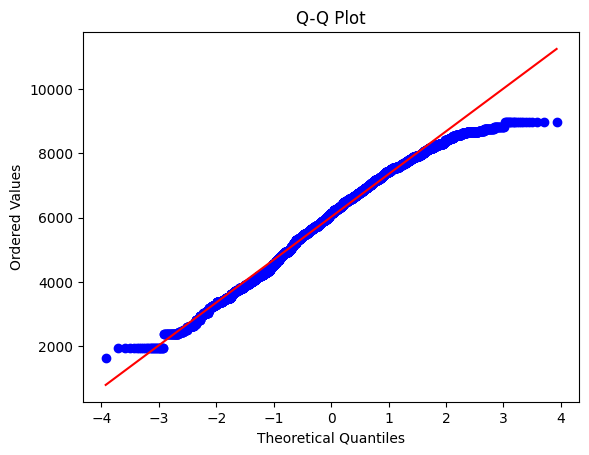

In [ ]:
stats.probplot(train['yield'], dist="norm", plot=plt)
plt.title("Q-Q Plot")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Ordered Values")
plt.show()

**Observations:**

- We can observe that the Q-Q plot indicates that there is not much Skewness in the target column but there is a slightly thin tail on both sides. 


In [ ]:
summary_stats

,count,mean,std,min,25%,50%,75%,max,median
clonesize,16066.0000,19.6594,6.6181,10.0000,12.5000,25.0000,25.0000,40.0000,25.0000
honeybee,16066.0000,0.3907,0.4133,0.0000,0.2500,0.5000,0.5000,18.4300,0.5000
bumbles,16066.0000,0.2866,0.0602,0.0000,0.2500,0.2500,0.3800,0.5850,0.2500
andrena,16066.0000,0.4915,0.1488,0.0000,0.3800,0.5000,0.6300,0.7500,0.5000
osmia,16066.0000,0.5909,0.1412,0.0000,0.5000,0.6300,0.7500,0.7500,0.6300
MaxOfUpperTRange,16066.0000,82.1751,9.1487,69.7000,77.4000,86.0000,86.0000,94.6000,86.0000
MinOfUpperTRange,16066.0000,49.6746,5.5486,39.0000,46.8000,52.0000,52.0000,57.2000,52.0000
AverageOfUpperTRange,16066.0000,68.6595,7.6433,58.2000,64.7000,71.9000,71.9000,79.0000,71.9000
MaxOfLowerTRange,16066.0000,59.2334,6.6123,50.2000,55.8000,62.0000,62.0000,68.2000,62.0000
MinOfLowerTRange,16066.0000,28.6620,3.1960,24.3000,27.0000,30.0000,30.0000,33.0000,30.0000


**Observations:**

- Similar to the analysis done in the target column there are no missing values and mean and the median of the all columns are close indicating that the all column is likely to be symmetric and normally distributed. 


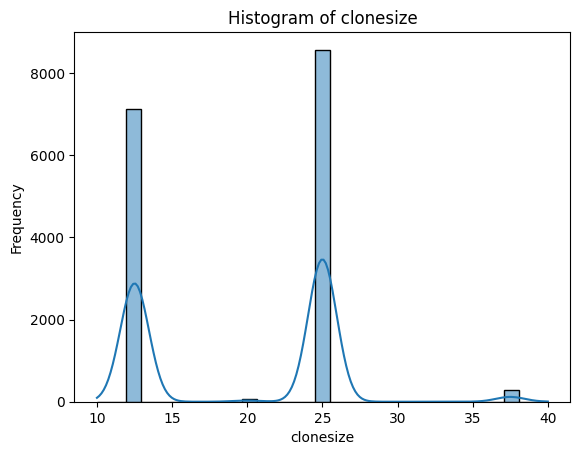

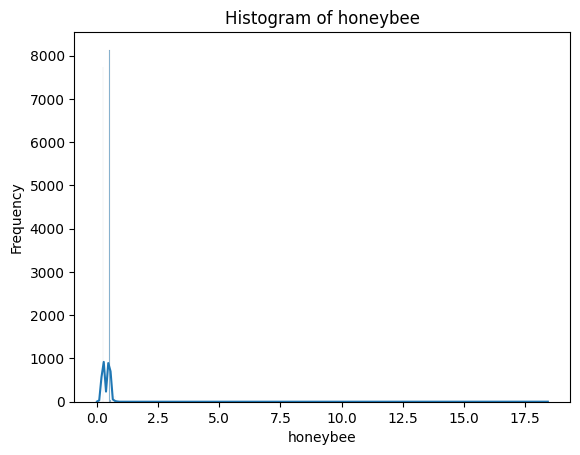

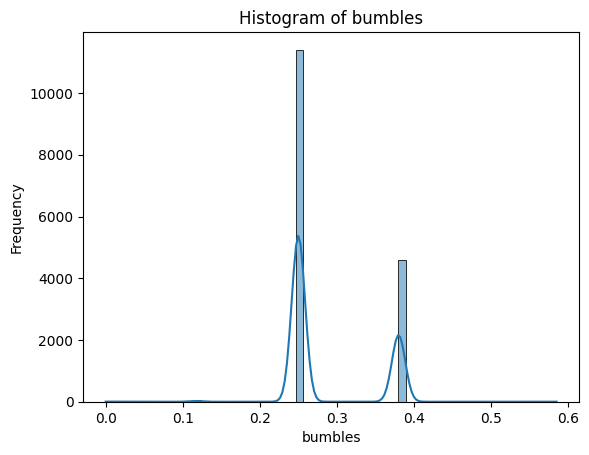

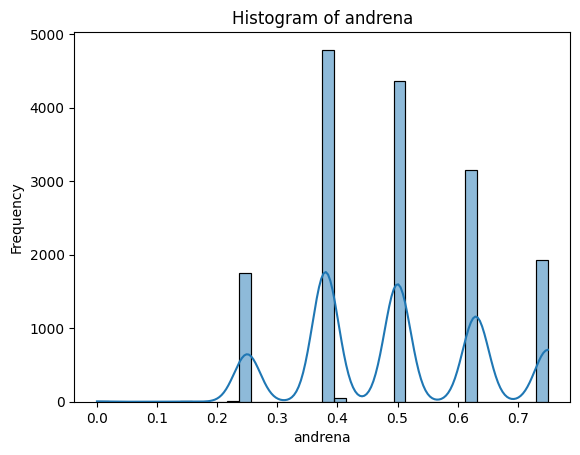

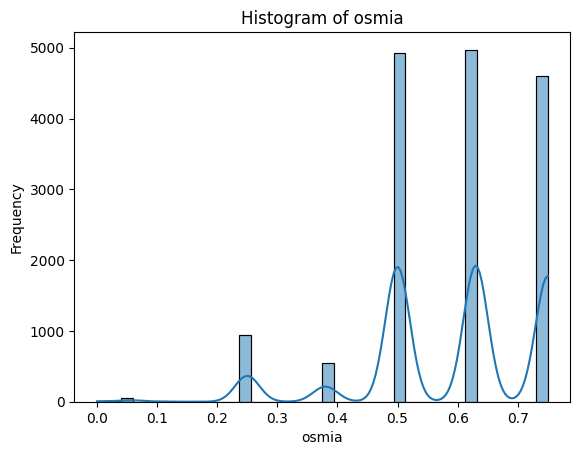

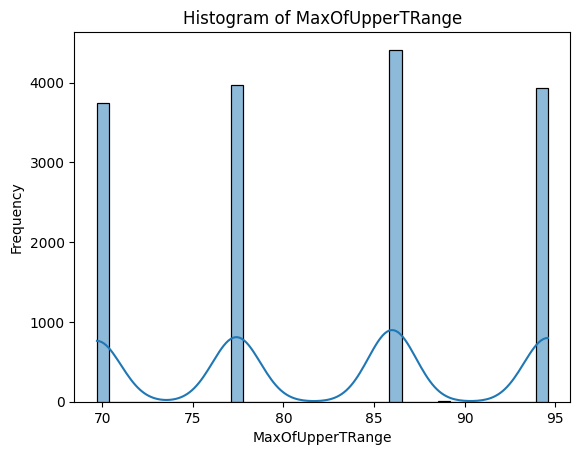

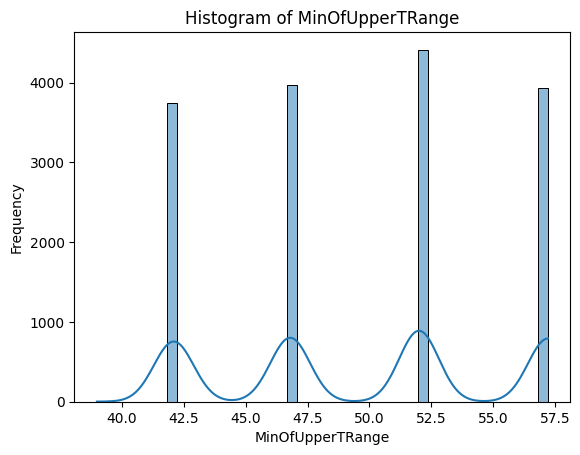

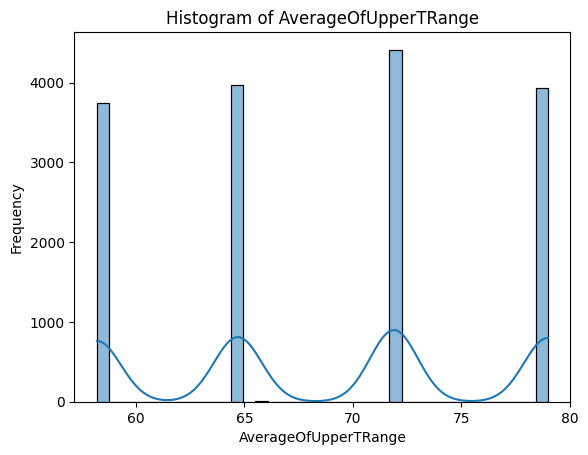

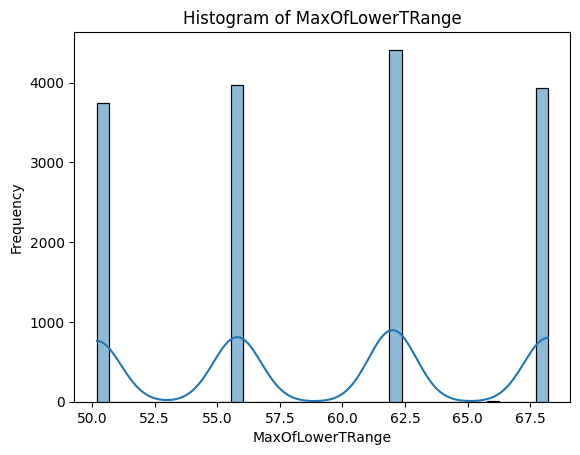

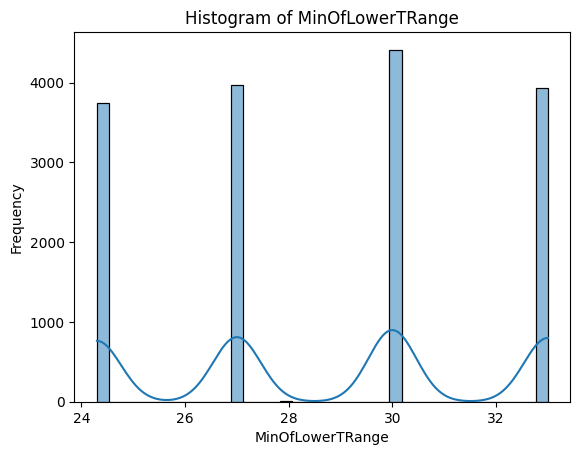

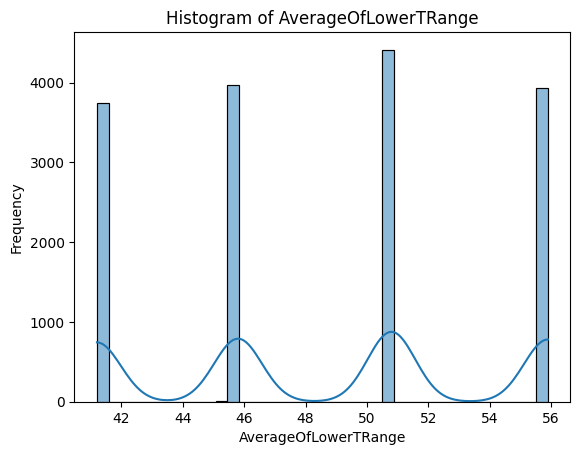

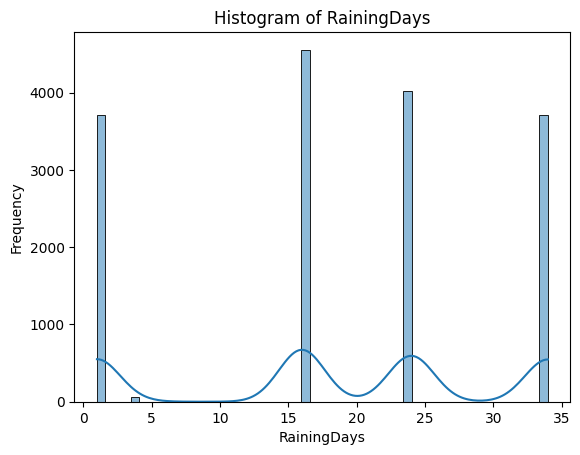

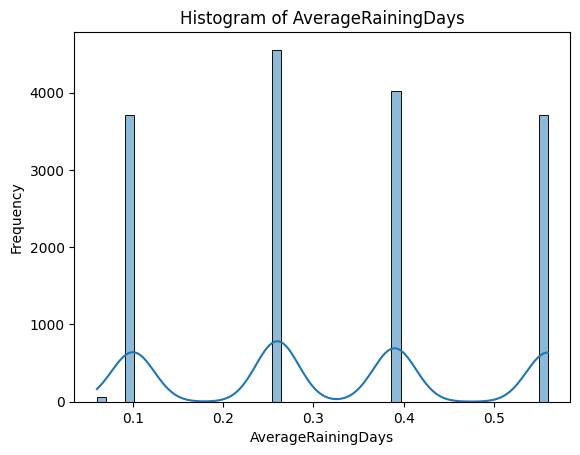

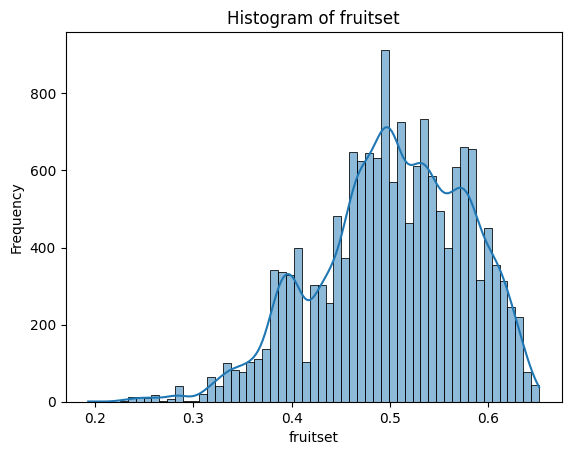

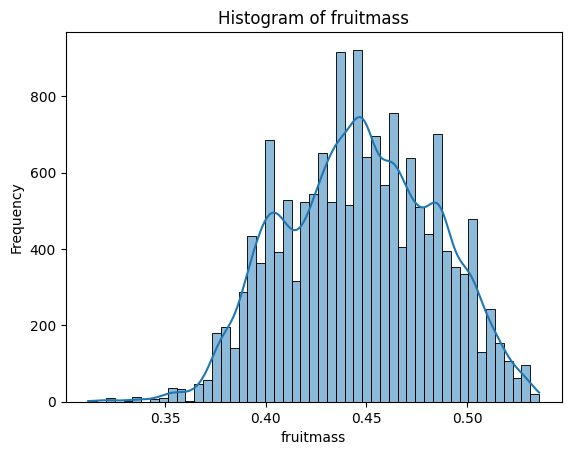

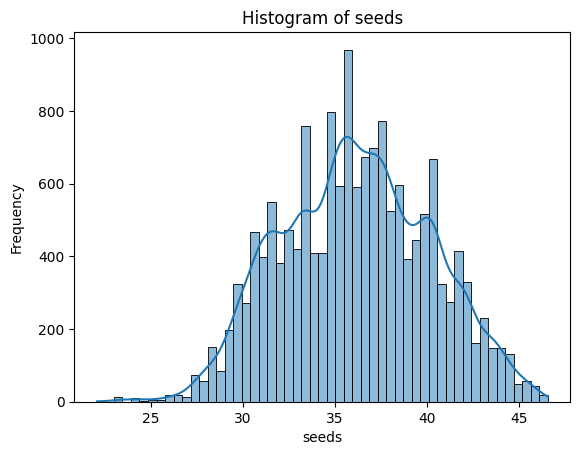

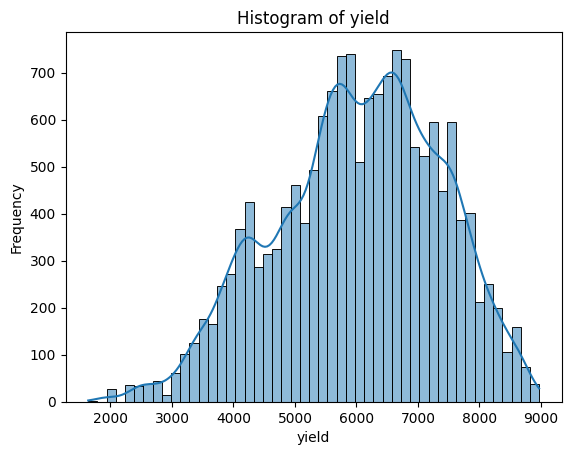

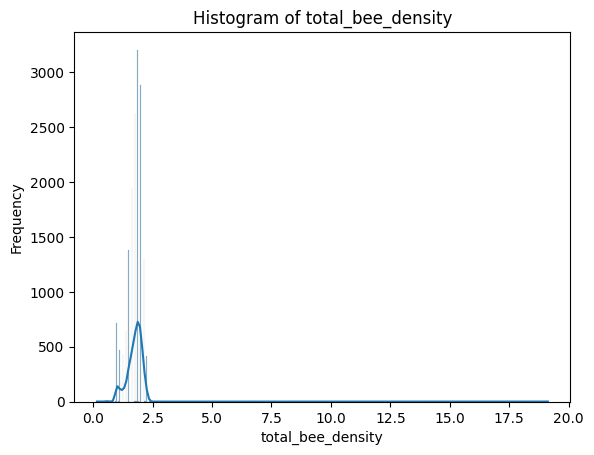

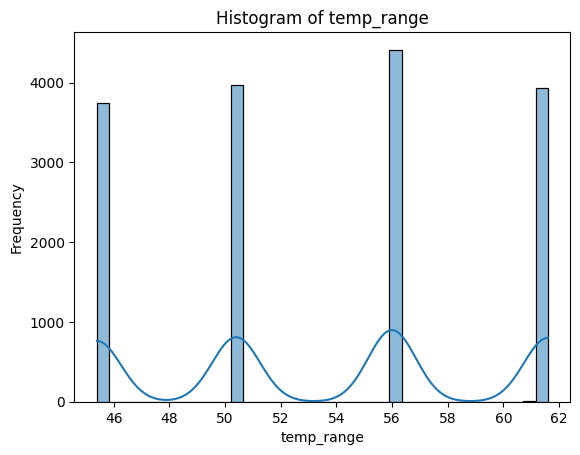

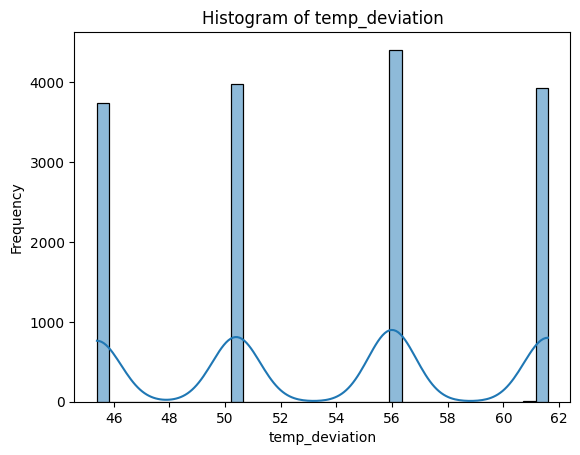

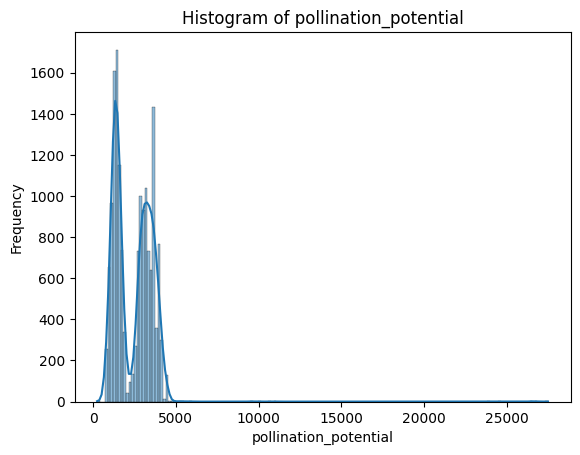

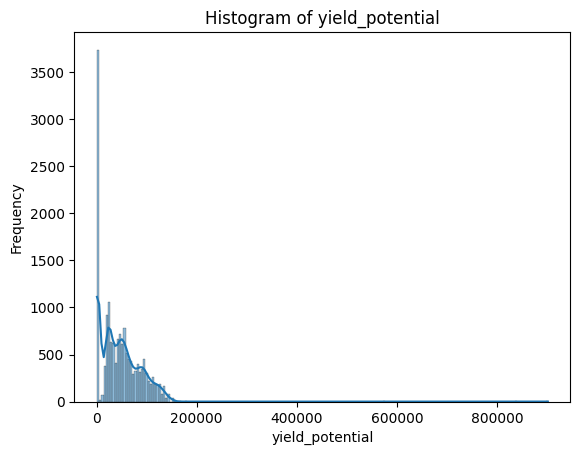

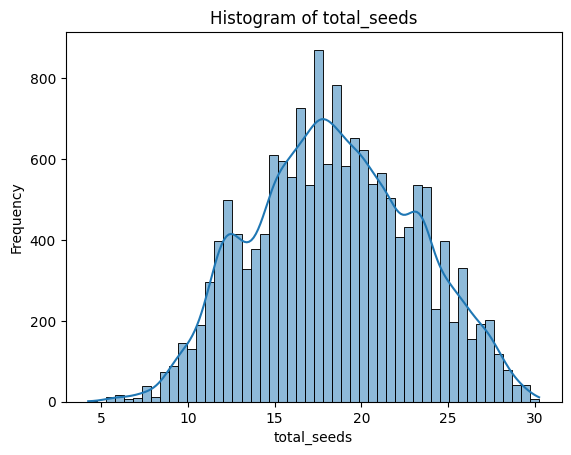

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


for column in train.columns:
    sns.histplot(train[column],kde=True)
    #data=train, x=train['yield']
    plt.title(f"Histogram of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()


**Observations:**

- Not all columns are normally distributed, we can observe multimodal distribution in some of our columns. 
- It simply indicates that there are distinct groups or subpopulations within your data that exhibit different behaviors or characteristics. 



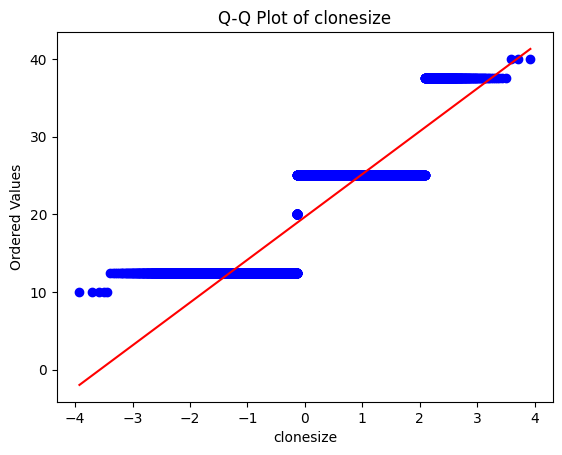

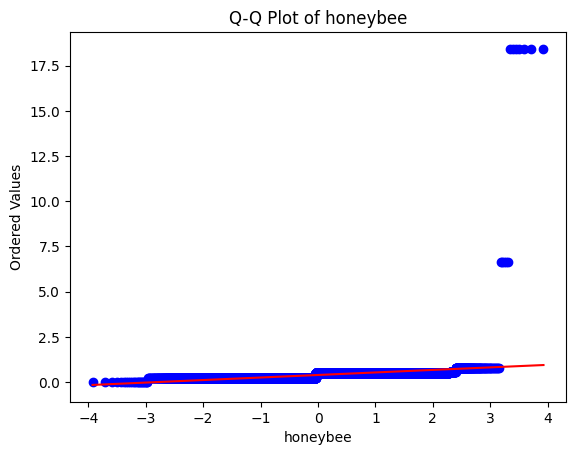

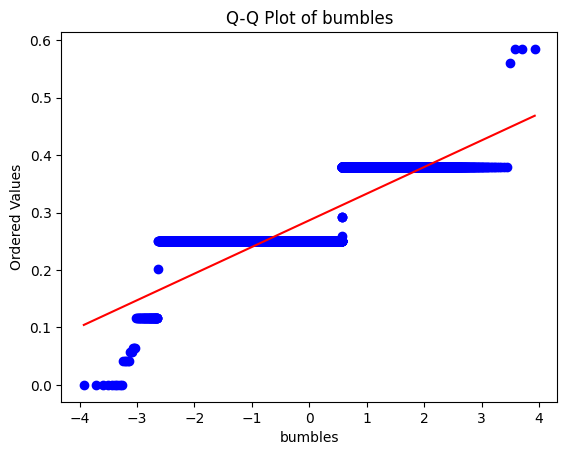

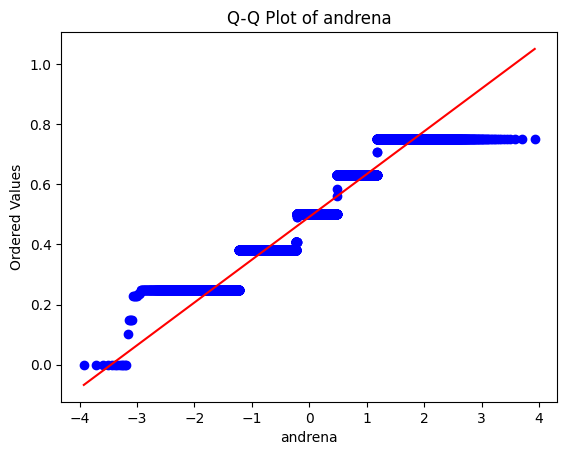

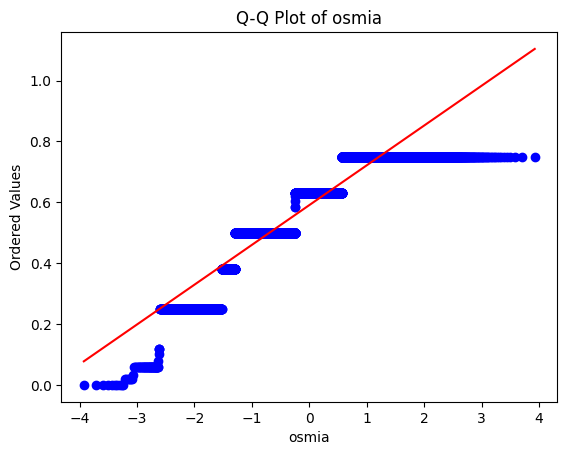

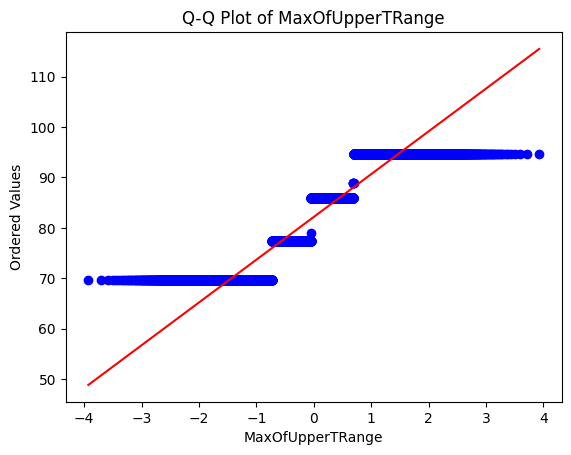

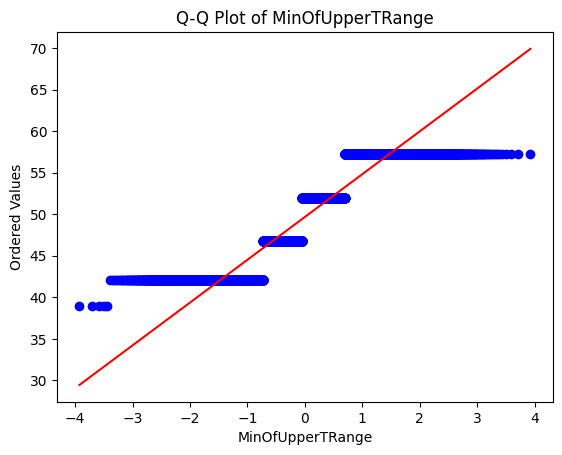

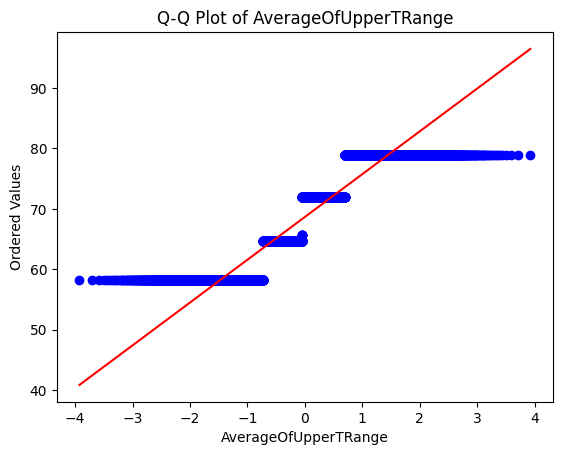

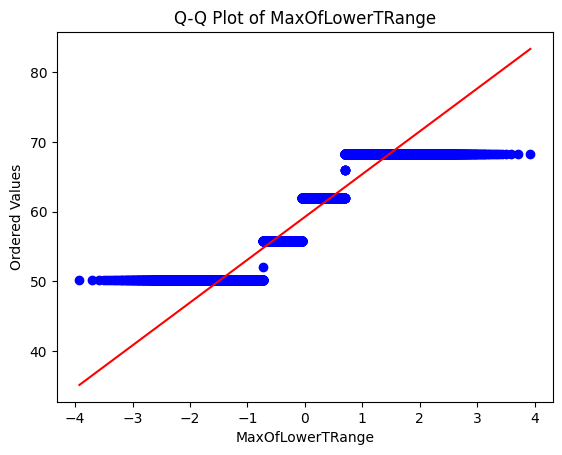

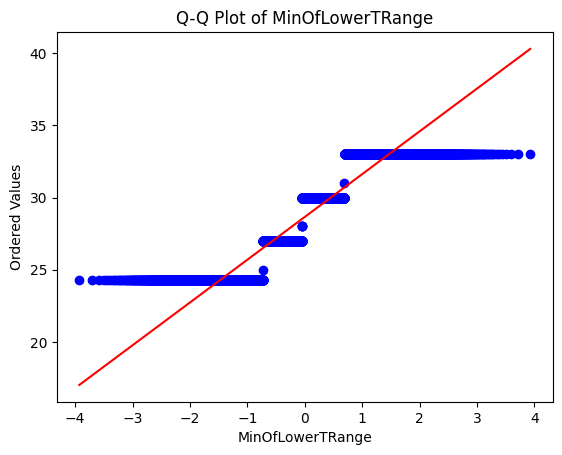

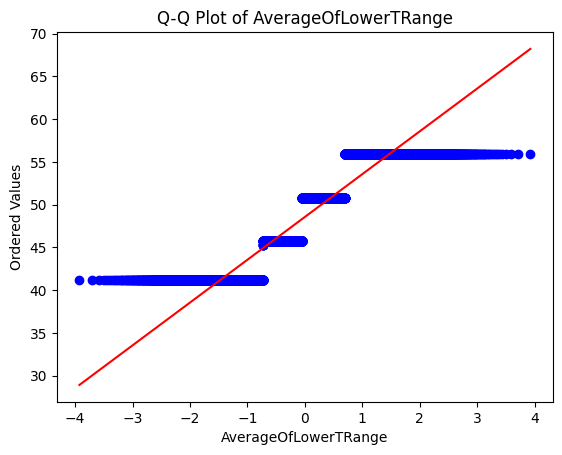

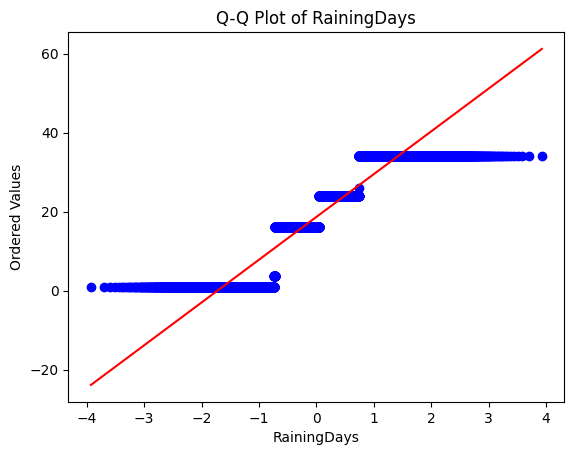

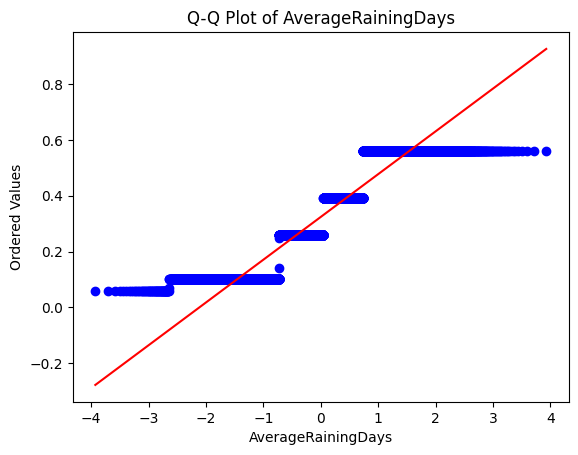

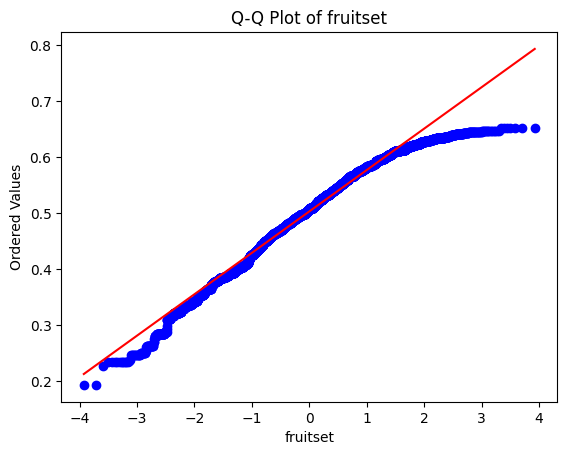

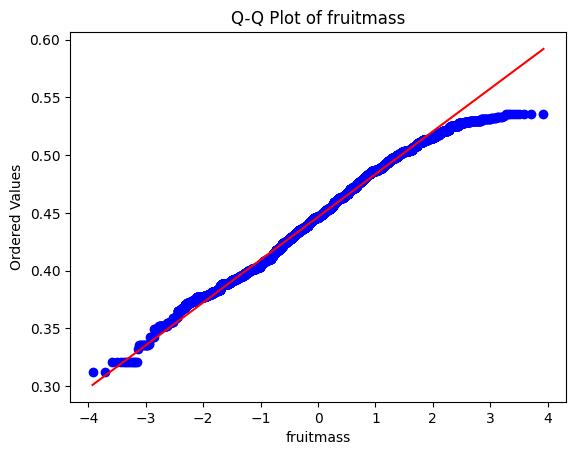

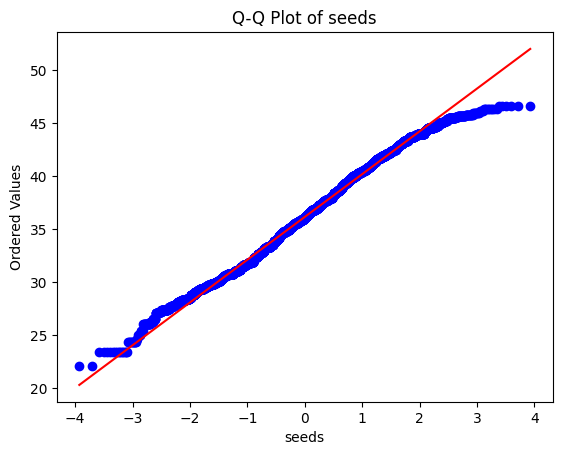

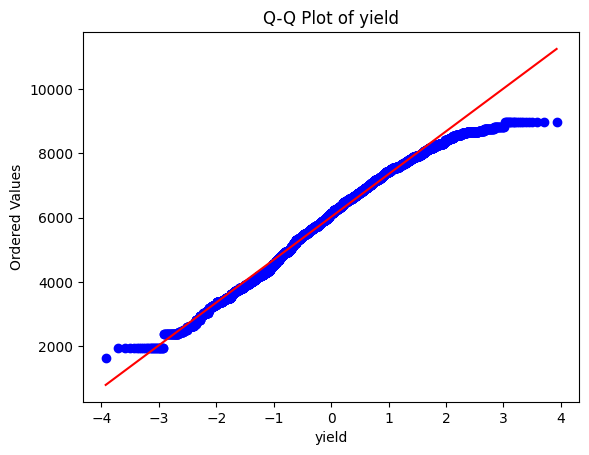

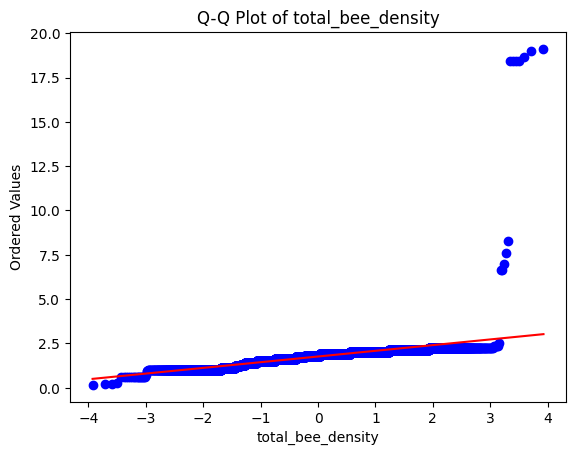

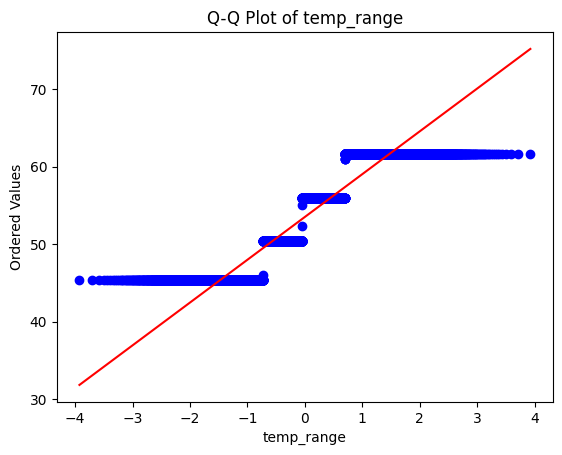

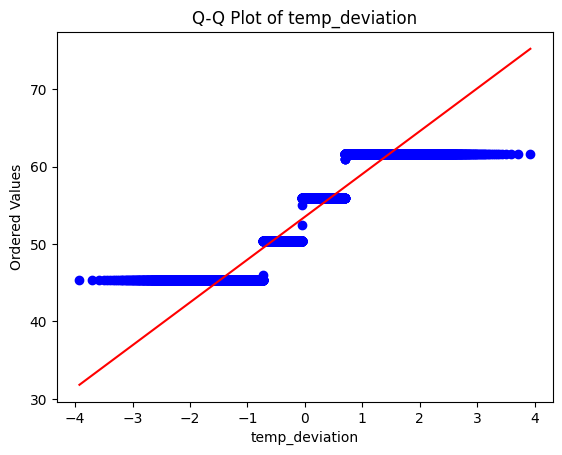

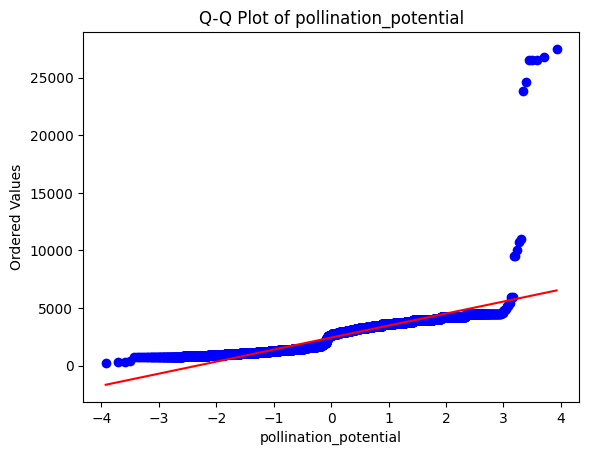

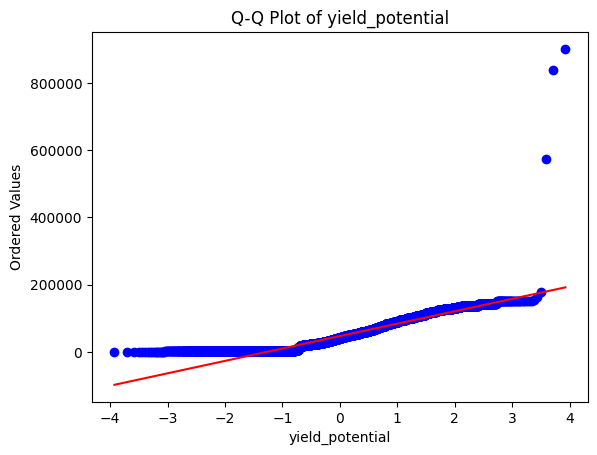

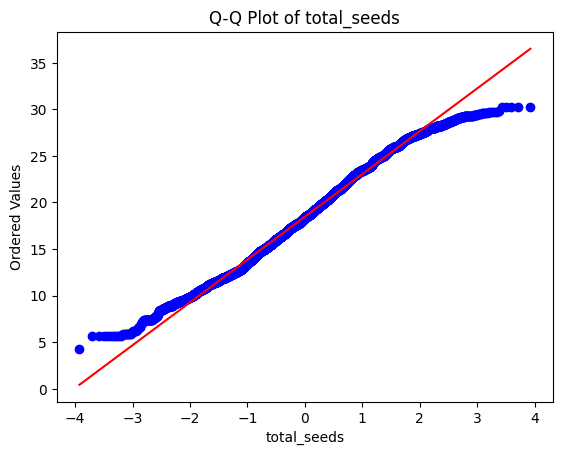

In [ ]:
for column in train.columns:
  stats.probplot(train[column], dist="norm", plot=plt)
  plt.title(f"Q-Q Plot of {column}")
  plt.xlabel(column)
  plt.ylabel("Ordered Values")
  plt.show()

**Observations:**

- Not all colums are normally distibuted, since there are multimodal distribution in some of our column. 
- We can observe mixed all Left Skewed Q-Q, Fat-Tailed, Right Skewed Q-Q, Thin-Tailed Q-Q and cloumns like with less Skewness.

In [ ]:
import numpy as np
from scipy import stats

for column in train.columns:
    z_scores = np.abs(stats.zscore(train[column]))
    threshold = 3
    outlier_z_scores = z_scores[z_scores > threshold]
    if len(outlier_z_scores) > 0:
        print(f"Outliers in column '{column}': {outlier_z_scores}")


Outliers in column 'clonesize': 2394   3.0736
9553   3.0736
773    3.0736
Name: clonesize, dtype: float64
Outliers in column 'honeybee': 2263    43.6528
5940    43.6528
6818    15.1226
11803   43.6528
11948   43.6528
13132   15.1226
13493   43.6528
15246   15.1226
761     15.1226
762     43.6528
763     15.1226
765     43.6528
Name: honeybee, dtype: float64
Outliers in column 'bumbles': 563     3.7937
841     4.5387
897     3.6775
2008    4.7564
2263    4.7564
4596    4.9537
4632    4.0592
6549    4.0592
6928    3.7937
9553    4.9537
10026   3.6775
11803   4.0592
11948   4.7564
13493   4.7564
15246   4.7564
761     4.7564
762     4.7564
763     3.6775
765     4.0592
766     4.0592
767     4.9537
768     4.7564
769     4.7564
771     3.7937
Name: bumbles, dtype: float64
Outliers in column 'andrena': 2008    3.3022
2222    3.3022
2263    3.3022
4596    3.3022
9553    3.3022
11948   3.3022
13493   3.3022
15246   3.3022
761     3.3022
762     3.3022
767     3.3022
769     3.3022
Name: andr

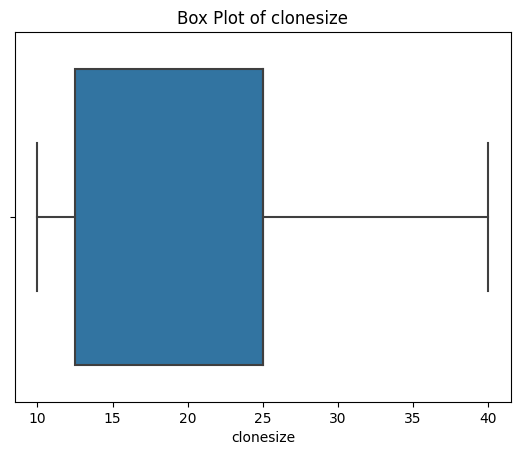

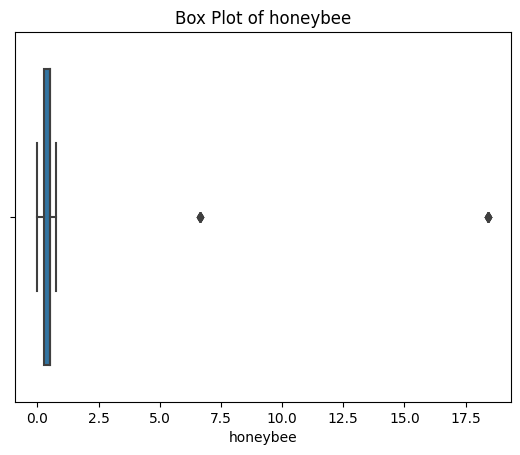

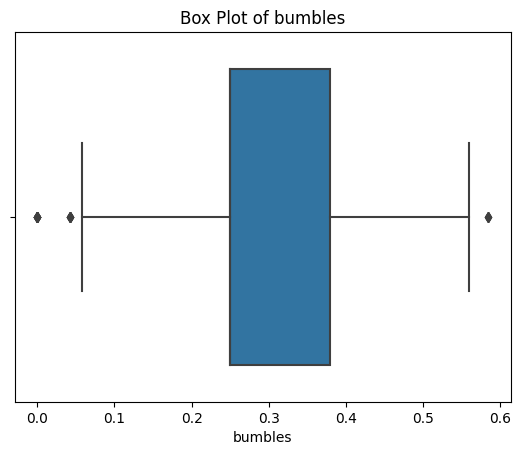

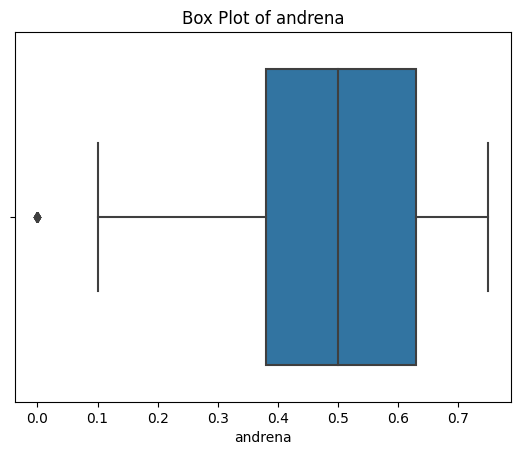

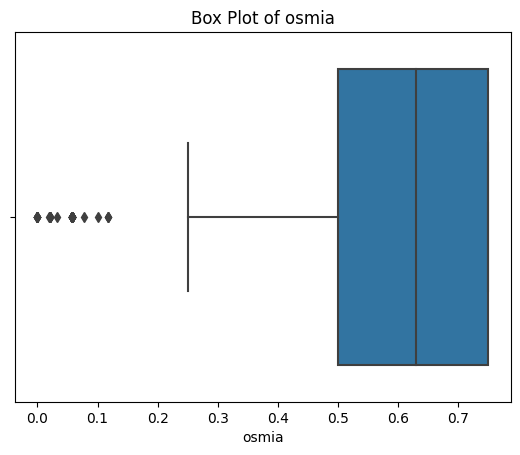

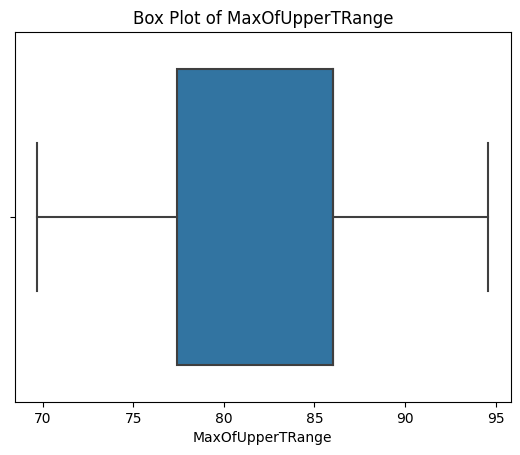

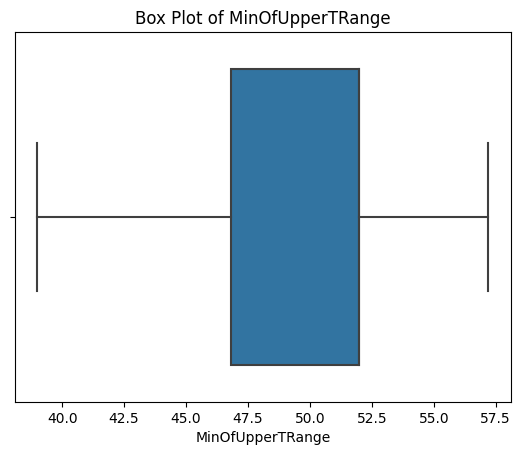

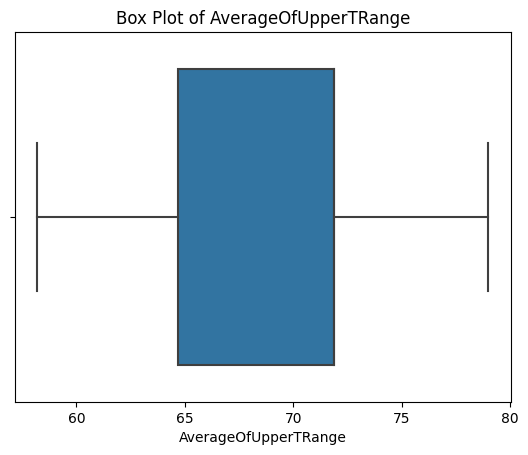

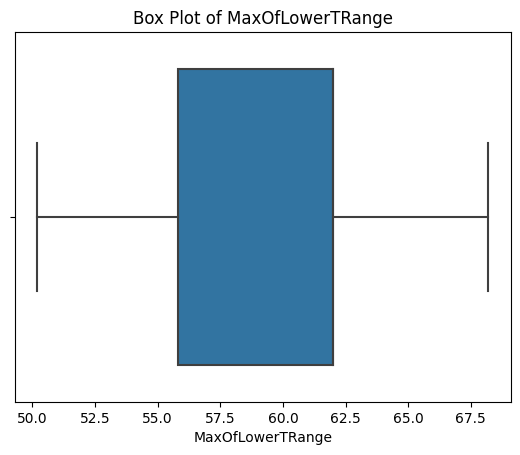

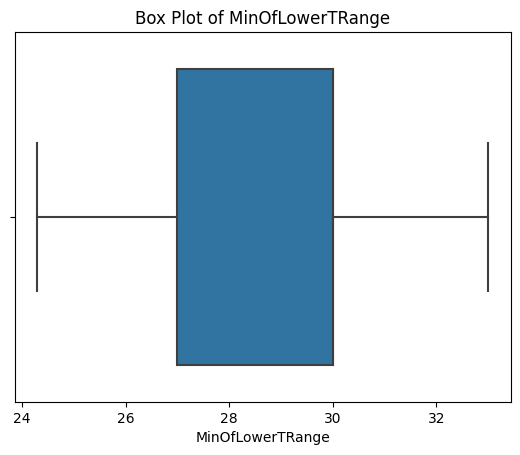

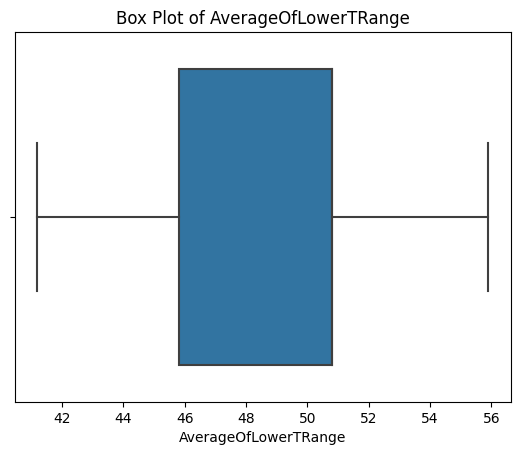

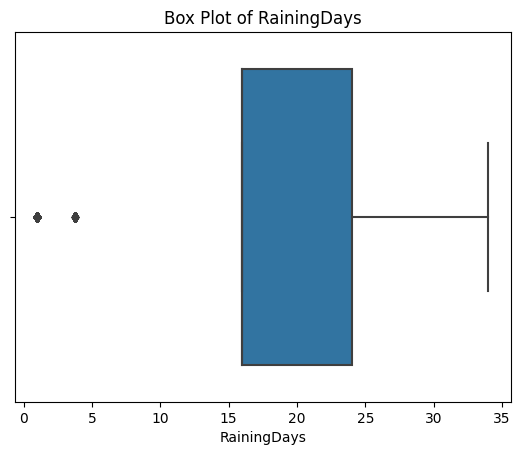

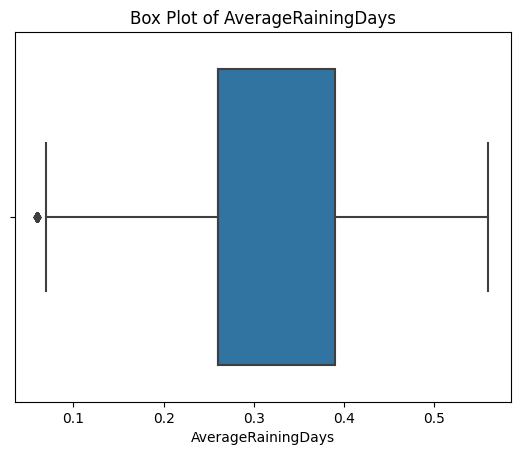

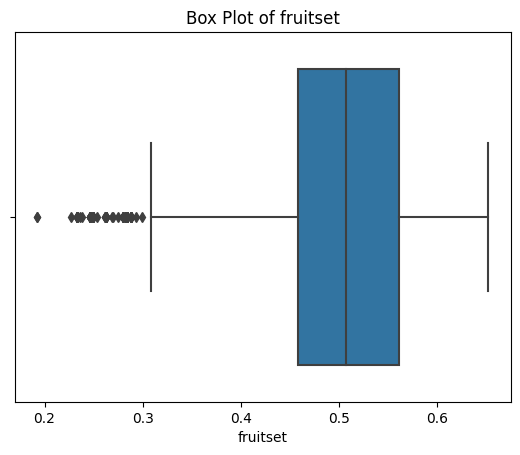

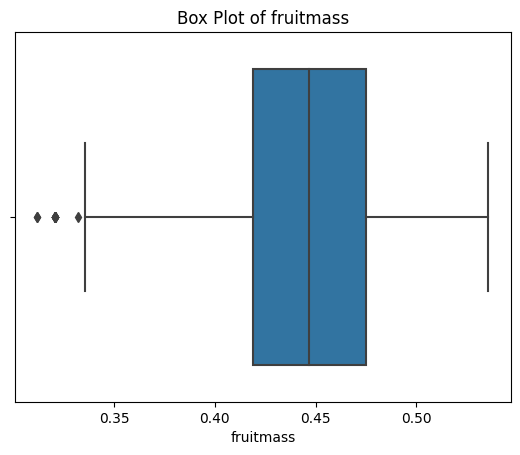

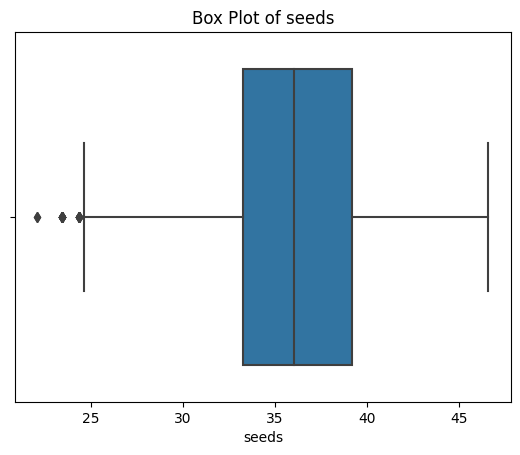

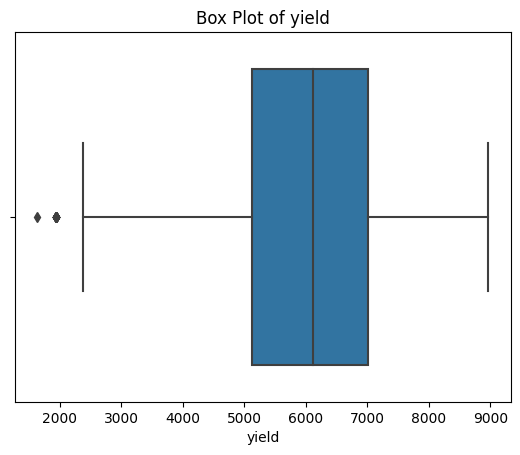

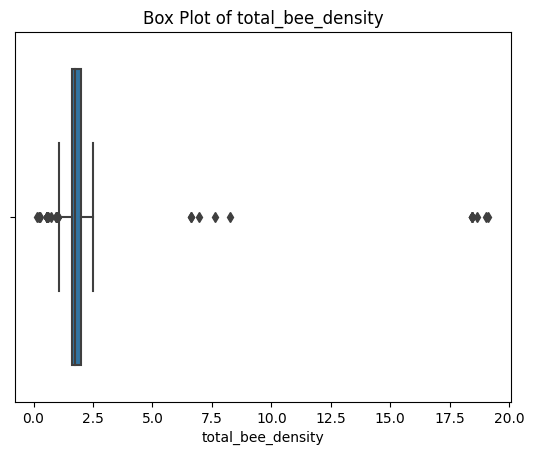

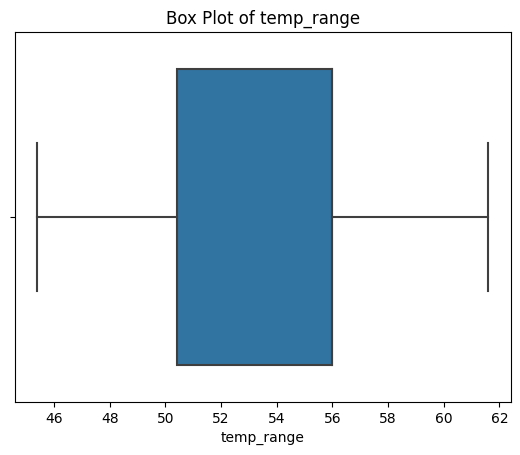

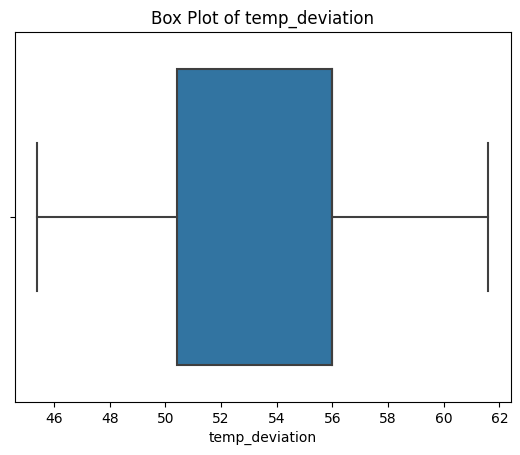

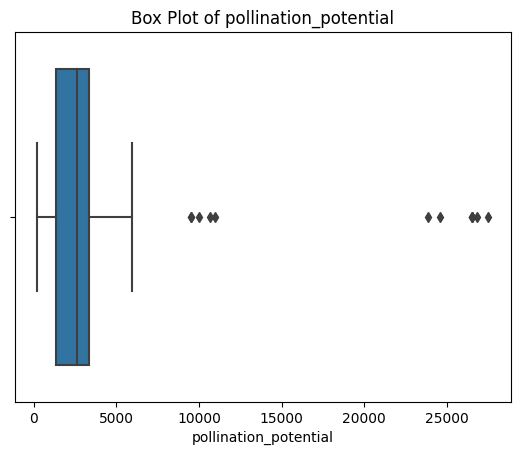

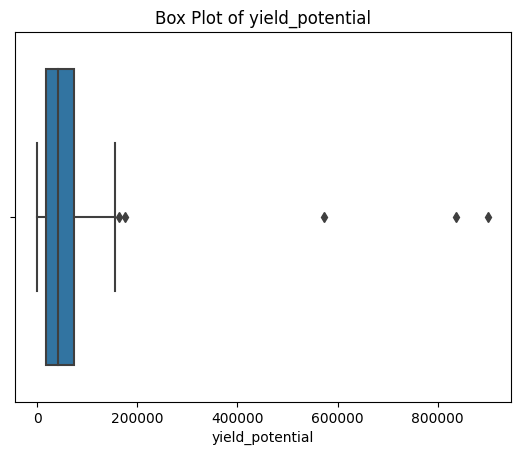

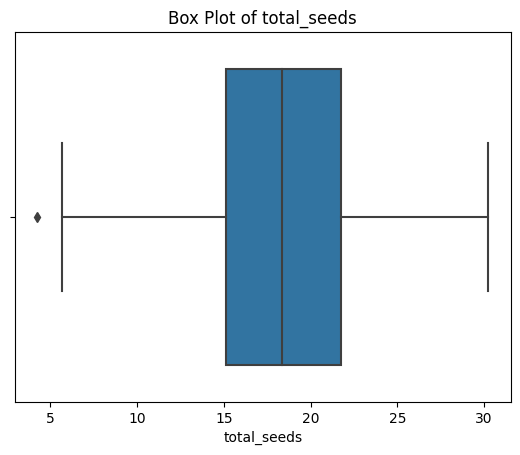

In [ ]:
for column in train.columns:
    sns.boxplot(x=train[column])
    plt.title(f"Box Plot of {column}")
    plt.xlabel(column)
    plt.show()

**Observations:**


- We can observe that except for the honeybee column, the Z-Score values for all other columns are very close to our threshold i.e 3 and -3. 
- This indicates that these data points are potentially valid and not necessarily outliers, so we need not remove these outliers. 
- But with the honeybee column the outlier should be addressed since the Z-Score values are much away from the threshold i.e 3 and -3. 


**What is Correlation ?**

- Correlation helps us understand if there is a connection or association between two variables. 
- r = (N∑XY - (∑X)(∑Y)) / sqrt((N∑X^2 - (∑X)^2)(N∑Y^2 - (∑Y)^2))
- where: 
  - N: the number of observations 
  - X: the values of the first variable 
  - Y: the values of the second variable 
  - ∑: the sum of the values 
  - X^2: the square of the values of the first variable 
  - Y^2: the square of the values of the second variable 
- A correlation coefficient of +1 indicates a perfect positive correlation, 0 indicates no correlation, and -1 indicates a perfect negative correlation. 


<Axes: >

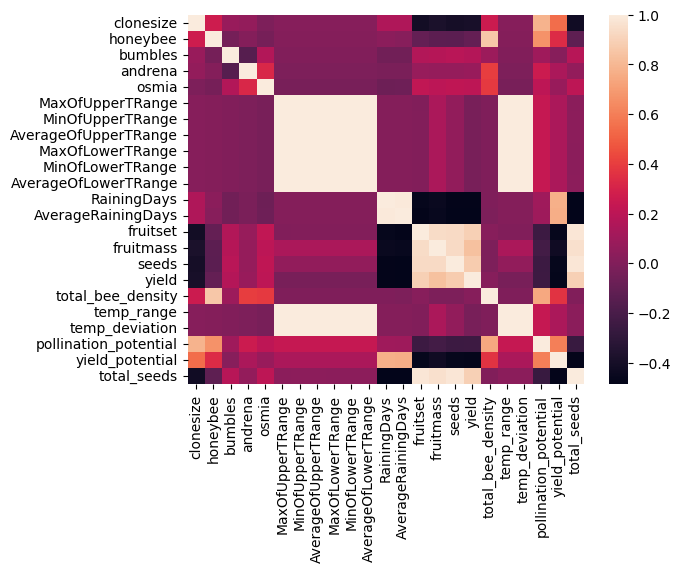

In [ ]:
sns.heatmap(train.corr())

In [ ]:
train.corr(method='pearson').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('rainbow'), axis=1)

,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield,total_bee_density,temp_range,temp_deviation,pollination_potential,yield_potential,total_seeds
clonesize,1.0,0.27,0.077,0.062,-0.014,0.017,0.017,0.017,0.017,0.017,0.017,0.16,0.15,-0.41,-0.38,-0.4,-0.39,0.26,0.017,0.017,0.78,0.54,-0.42
honeybee,0.27,1.0,-0.045,0.0093,-0.035,0.0079,0.0077,0.008,0.008,0.0079,0.0075,0.03,0.02,-0.1,-0.13,-0.14,-0.1,0.86,0.008,0.008,0.67,0.33,-0.12
bumbles,0.077,-0.045,1.0,-0.15,0.17,-0.0033,-0.002,-0.0025,-0.0029,-0.0026,-0.0023,-0.056,-0.053,0.17,0.18,0.19,0.17,0.09,-0.0036,-0.0036,0.1,0.022,0.18
andrena,0.062,0.0093,-0.15,1.0,0.32,-0.014,-0.014,-0.014,-0.014,-0.014,-0.014,-0.023,-0.023,0.075,0.066,0.065,0.077,0.4,-0.014,-0.014,0.26,0.14,0.063
osmia,-0.014,-0.035,0.17,0.32,1.0,-0.033,-0.032,-0.033,-0.033,-0.033,-0.033,-0.07,-0.067,0.22,0.2,0.21,0.21,0.39,-0.034,-0.034,0.21,0.081,0.21
MaxOfUpperTRange,0.017,0.0079,-0.0033,-0.014,-0.033,1.0,1.0,1.0,1.0,1.0,1.0,0.011,0.0095,0.00044,0.14,0.056,-0.031,-0.0078,1.0,1.0,0.24,0.14,0.035
MinOfUpperTRange,0.017,0.0077,-0.002,-0.014,-0.032,1.0,1.0,1.0,1.0,1.0,1.0,0.011,0.01,0.0018,0.14,0.057,-0.03,-0.0072,1.0,1.0,0.24,0.15,0.036
AverageOfUpperTRange,0.017,0.008,-0.0025,-0.014,-0.033,1.0,1.0,1.0,1.0,1.0,1.0,0.011,0.0095,0.0016,0.14,0.057,-0.03,-0.0075,1.0,1.0,0.24,0.14,0.036
MaxOfLowerTRange,0.017,0.008,-0.0029,-0.014,-0.033,1.0,1.0,1.0,1.0,1.0,1.0,0.011,0.0094,0.00073,0.14,0.056,-0.03,-0.0076,1.0,1.0,0.24,0.14,0.035
MinOfLowerTRange,0.017,0.0079,-0.0026,-0.014,-0.033,1.0,1.0,1.0,1.0,1.0,1.0,0.011,0.0097,0.00095,0.14,0.057,-0.03,-0.0076,1.0,1.0,0.24,0.15,0.035


**Observations:**

- We can observe that there is high correlation between fruitmass -fruitset , fruitmass - seed and fruit set - see. 
- Fruitmass, Fruitset and Seed are strongly correlated with target values.



In [ ]:
duplicate_rows_df = train[train.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (7, 23)


In [ ]:
duplicate_rows_df

,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield,total_bee_density,temp_range,temp_deviation,pollination_potential,yield_potential,total_seeds
3380,25.0000,0.5000,0.2500,0.6300,0.6300,86.0000,52.0000,71.9000,62.0000,30.0000,50.8000,16.0000,0.2600,0.5143,0.4549,36.6826,6157.0548,2.0100,56.0000,56.0000,3612.9750,57807.6000,18.8660
8060,12.5000,0.2500,0.3800,0.5000,0.7500,77.4000,46.8000,64.7000,55.8000,27.0000,45.8000,1.0000,0.1000,0.6416,0.5296,45.7182,8743.5210,1.8800,50.4000,50.4000,1520.4500,1520.4500,29.3336
9219,37.5000,0.7500,0.2500,0.2500,0.2500,77.4000,46.8000,64.7000,55.8000,27.0000,45.8000,34.0000,0.5600,0.2844,0.3522,26.1012,2625.2692,1.5000,50.4000,50.4000,3639.3750,123738.7500,7.4243
11046,25.0000,0.5000,0.3800,0.6300,0.5000,86.0000,52.0000,71.9000,62.0000,30.0000,50.8000,34.0000,0.5600,0.3637,0.3914,29.7400,3631.9054,2.0100,56.0000,56.0000,3612.9750,122841.1500,10.8172
12589,37.5000,0.7500,0.2500,0.2500,0.2500,86.0000,52.0000,71.9000,62.0000,30.0000,50.8000,34.0000,0.5600,0.3541,0.3881,29.3730,3712.9979,1.5000,56.0000,56.0000,4044.3750,137508.7500,10.4006
14187,12.5000,0.2500,0.2500,0.5000,0.7500,94.6000,57.2000,79.0000,68.2000,33.0000,55.9000,1.0000,0.1000,0.6331,0.5195,44.2786,8318.7989,1.7500,61.6000,61.6000,1728.1250,1728.1250,28.0347
14408,12.5000,0.2500,0.2500,0.2500,0.7500,69.7000,42.1000,58.2000,50.2000,24.3000,41.2000,16.0000,0.2600,0.5462,0.4515,37.8075,6922.8468,1.5000,45.4000,45.4000,1091.2500,17460.0000,20.6495


In [ ]:
train.columns 

Index(['clonesize', 'honeybee', 'bumbles', 'andrena', 'osmia',
       'MaxOfUpperTRange', 'MinOfUpperTRange', 'AverageOfUpperTRange',
       'MaxOfLowerTRange', 'MinOfLowerTRange', 'AverageOfLowerTRange',
       'RainingDays', 'AverageRainingDays', 'fruitset', 'fruitmass', 'seeds',
       'yield', 'total_bee_density', 'temp_range', 'temp_deviation',
       'pollination_potential', 'yield_potential', 'total_seeds'],
      dtype='object')

In [ ]:
X = train.drop("yield", axis = 1)
y = train['yield']

In [ ]:
norm_cols = ['fruitset', 'fruitmass', 'seeds', 'total_seeds']

non_norm_cols = ['clonesize', 'honeybee', 'bumbles', 'andrena', 'osmia',
       'MaxOfUpperTRange', 'MinOfUpperTRange', 'AverageOfUpperTRange',
       'MaxOfLowerTRange', 'MinOfLowerTRange', 'AverageOfLowerTRange',
       'RainingDays', 'AverageRainingDays', 'total_bee_density', 'temp_range', 'temp_deviation',
       'pollination_potential', 'yield_potential']

norm_scaler = StandardScaler()
X_norm_scaled = norm_scaler.fit_transform(X[norm_cols])

non_norm_scaler = RobustScaler()
X_non_norm_scaled = non_norm_scaler.fit_transform(X[non_norm_cols])

X_scaled = np.hstack([X_norm_scaled, X_non_norm_scaled])


In [ ]:
X_scaled.shape

(16066, 22)

In [ ]:
def objective(trial):
    params = {
    'objective': 'regression',
    'metric': 'mae',
    'boosting_type': 'gbdt',
    'num_leaves': trial.suggest_int('num_leaves', 2, 500),
    'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
    'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.1),
    'colsample_bytree': trial.suggest_discrete_uniform('colsample_bytree', 0.6, 1.0, 0.1),
    'lambda_l1': trial.suggest_loguniform('lambda_l1', 0.01, 10.0),
    'lambda_l2': trial.suggest_loguniform('lambda_l2', 0.01, 10.0),
    
    'n_jobs': -1}
    
    
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    mae = 0
    for train_index, val_index in kf.split(X_scaled):
        X_train, X_val = pd.DataFrame(X_scaled).iloc[train_index], pd.DataFrame(X_scaled).iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]

        model_lgbm = lgb.LGBMRegressor(**params)
        model_lgbm.fit(X_train, y_train, eval_set=[(X_val, y_val)], early_stopping_rounds=100, verbose=False)

        y_pred = model_lgbm.predict(X_val)
        mae += mean_absolute_error(y_val, y_pred) / kf.n_splits
    
    return mae

    
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100)

[I 2023-05-11 22:06:41,614] A new study created in memory with name: no-name-a8d27604-79b3-4d6c-97e3-cad3f95e31b3


[LightGBM] [Warning] lambda_l1 is set=0.8191804500909159, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.8191804500909159
[LightGBM] [Warning] lambda_l2 is set=0.5248773195603984, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5248773195603984
[LightGBM] [Warning] lambda_l1 is set=0.8191804500909159, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.8191804500909159
[LightGBM] [Warning] lambda_l2 is set=0.5248773195603984, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5248773195603984
[LightGBM] [Warning] lambda_l1 is set=0.8191804500909159, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.8191804500909159
[LightGBM] [Warning] lambda_l2 is set=0.5248773195603984, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5248773195603984
[LightGBM] [Warning] lambda_l1 is set=0.8191804500909159, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.8191804500909159
[LightGBM] [Warning] lambda_l2 is set=0.5248773195603984, reg_lamb

[I 2023-05-11 22:06:52,820] Trial 0 finished with value: 393.8986878759287 and parameters: {'num_leaves': 134, 'learning_rate': 0.019785931906214374, 'subsample': 0.7, 'colsample_bytree': 0.9, 'lambda_l1': 0.8191804500909159, 'lambda_l2': 0.5248773195603984}. Best is trial 0 with value: 393.8986878759287.


[LightGBM] [Warning] lambda_l1 is set=0.033921212470362457, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.033921212470362457
[LightGBM] [Warning] lambda_l2 is set=0.010714226800778064, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.010714226800778064
[LightGBM] [Warning] lambda_l1 is set=0.033921212470362457, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.033921212470362457
[LightGBM] [Warning] lambda_l2 is set=0.010714226800778064, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.010714226800778064
[LightGBM] [Warning] lambda_l1 is set=0.033921212470362457, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.033921212470362457
[LightGBM] [Warning] lambda_l2 is set=0.010714226800778064, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.010714226800778064
[LightGBM] [Warning] lambda_l1 is set=0.033921212470362457, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.033921212470362457
[LightGBM] [Warning] lambda_l2 is set=

[I 2023-05-11 22:06:58,789] Trial 1 finished with value: 351.9195887843271 and parameters: {'num_leaves': 177, 'learning_rate': 0.05572707737557438, 'subsample': 0.7, 'colsample_bytree': 0.9, 'lambda_l1': 0.033921212470362457, 'lambda_l2': 0.010714226800778064}. Best is trial 1 with value: 351.9195887843271.


[LightGBM] [Warning] lambda_l1 is set=6.253448362096575, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.253448362096575
[LightGBM] [Warning] lambda_l2 is set=0.03541281261470109, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.03541281261470109
[LightGBM] [Warning] lambda_l1 is set=6.253448362096575, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.253448362096575
[LightGBM] [Warning] lambda_l2 is set=0.03541281261470109, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.03541281261470109
[LightGBM] [Warning] lambda_l1 is set=6.253448362096575, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.253448362096575
[LightGBM] [Warning] lambda_l2 is set=0.03541281261470109, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.03541281261470109
[LightGBM] [Warning] lambda_l1 is set=6.253448362096575, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.253448362096575
[LightGBM] [Warning] lambda_l2 is set=0.03541281261470109, reg_lambd

[I 2023-05-11 22:07:06,122] Trial 2 finished with value: 353.52774963930824 and parameters: {'num_leaves': 242, 'learning_rate': 0.06705000113257999, 'subsample': 0.7, 'colsample_bytree': 0.7, 'lambda_l1': 6.253448362096575, 'lambda_l2': 0.03541281261470109}. Best is trial 1 with value: 351.9195887843271.


[LightGBM] [Warning] lambda_l1 is set=0.18879871165661644, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.18879871165661644
[LightGBM] [Warning] lambda_l2 is set=0.9869468503415773, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.9869468503415773
[LightGBM] [Warning] lambda_l1 is set=0.18879871165661644, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.18879871165661644
[LightGBM] [Warning] lambda_l2 is set=0.9869468503415773, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.9869468503415773
[LightGBM] [Warning] lambda_l1 is set=0.18879871165661644, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.18879871165661644
[LightGBM] [Warning] lambda_l2 is set=0.9869468503415773, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.9869468503415773
[LightGBM] [Warning] lambda_l1 is set=0.18879871165661644, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.18879871165661644
[LightGBM] [Warning] lambda_l2 is set=0.9869468503415773, 

[I 2023-05-11 22:07:15,583] Trial 3 finished with value: 375.13181437200916 and parameters: {'num_leaves': 459, 'learning_rate': 0.024212031890280893, 'subsample': 1.0, 'colsample_bytree': 0.6, 'lambda_l1': 0.18879871165661644, 'lambda_l2': 0.9869468503415773}. Best is trial 1 with value: 351.9195887843271.


[LightGBM] [Warning] lambda_l1 is set=0.08447167894522849, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.08447167894522849
[LightGBM] [Warning] lambda_l2 is set=6.503350257483067, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.503350257483067
[LightGBM] [Warning] lambda_l1 is set=0.08447167894522849, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.08447167894522849
[LightGBM] [Warning] lambda_l2 is set=6.503350257483067, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.503350257483067
[LightGBM] [Warning] lambda_l1 is set=0.08447167894522849, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.08447167894522849
[LightGBM] [Warning] lambda_l2 is set=6.503350257483067, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.503350257483067
[LightGBM] [Warning] lambda_l1 is set=0.08447167894522849, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.08447167894522849
[LightGBM] [Warning] lambda_l2 is set=6.503350257483067, reg_lam

[I 2023-05-11 22:07:20,545] Trial 4 finished with value: 433.7986213824897 and parameters: {'num_leaves': 246, 'learning_rate': 0.016316385852163665, 'subsample': 1.0, 'colsample_bytree': 1.0, 'lambda_l1': 0.08447167894522849, 'lambda_l2': 6.503350257483067}. Best is trial 1 with value: 351.9195887843271.


[LightGBM] [Warning] lambda_l1 is set=0.4493315780207727, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.4493315780207727
[LightGBM] [Warning] lambda_l2 is set=0.18867158451386362, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.18867158451386362
[LightGBM] [Warning] lambda_l1 is set=0.4493315780207727, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.4493315780207727
[LightGBM] [Warning] lambda_l2 is set=0.18867158451386362, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.18867158451386362
[LightGBM] [Warning] lambda_l1 is set=0.4493315780207727, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.4493315780207727
[LightGBM] [Warning] lambda_l2 is set=0.18867158451386362, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.18867158451386362
[LightGBM] [Warning] lambda_l1 is set=0.4493315780207727, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.4493315780207727
[LightGBM] [Warning] lambda_l2 is set=0.18867158451386362, r

[I 2023-05-11 22:07:29,070] Trial 5 finished with value: 362.59642902963776 and parameters: {'num_leaves': 235, 'learning_rate': 0.02818583467271926, 'subsample': 1.0, 'colsample_bytree': 1.0, 'lambda_l1': 0.4493315780207727, 'lambda_l2': 0.18867158451386362}. Best is trial 1 with value: 351.9195887843271.


[LightGBM] [Warning] lambda_l1 is set=1.2063664466532924, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.2063664466532924
[LightGBM] [Warning] lambda_l2 is set=0.1188911613450842, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1188911613450842
[LightGBM] [Warning] lambda_l1 is set=1.2063664466532924, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.2063664466532924
[LightGBM] [Warning] lambda_l2 is set=0.1188911613450842, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1188911613450842
[LightGBM] [Warning] lambda_l1 is set=1.2063664466532924, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.2063664466532924
[LightGBM] [Warning] lambda_l2 is set=0.1188911613450842, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1188911613450842
[LightGBM] [Warning] lambda_l1 is set=1.2063664466532924, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.2063664466532924
[LightGBM] [Warning] lambda_l2 is set=0.1188911613450842, reg_lamb

[I 2023-05-11 22:07:35,865] Trial 6 finished with value: 453.940351282208 and parameters: {'num_leaves': 270, 'learning_rate': 0.014437778179930232, 'subsample': 0.6, 'colsample_bytree': 0.8, 'lambda_l1': 1.2063664466532924, 'lambda_l2': 0.1188911613450842}. Best is trial 1 with value: 351.9195887843271.


[LightGBM] [Warning] lambda_l1 is set=0.02003664924910611, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.02003664924910611
[LightGBM] [Warning] lambda_l2 is set=0.016114880766713333, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.016114880766713333
[LightGBM] [Warning] lambda_l1 is set=0.02003664924910611, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.02003664924910611
[LightGBM] [Warning] lambda_l2 is set=0.016114880766713333, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.016114880766713333
[LightGBM] [Warning] lambda_l1 is set=0.02003664924910611, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.02003664924910611
[LightGBM] [Warning] lambda_l2 is set=0.016114880766713333, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.016114880766713333
[LightGBM] [Warning] lambda_l1 is set=0.02003664924910611, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.02003664924910611
[LightGBM] [Warning] lambda_l2 is set=0.016114

[I 2023-05-11 22:07:41,083] Trial 7 finished with value: 348.05063012183405 and parameters: {'num_leaves': 128, 'learning_rate': 0.09757168548619774, 'subsample': 0.6, 'colsample_bytree': 0.6, 'lambda_l1': 0.02003664924910611, 'lambda_l2': 0.016114880766713333}. Best is trial 7 with value: 348.05063012183405.


[LightGBM] [Warning] lambda_l1 is set=0.026846816826822145, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.026846816826822145
[LightGBM] [Warning] lambda_l2 is set=0.4979735021327748, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.4979735021327748
[LightGBM] [Warning] lambda_l1 is set=0.026846816826822145, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.026846816826822145
[LightGBM] [Warning] lambda_l2 is set=0.4979735021327748, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.4979735021327748
[LightGBM] [Warning] lambda_l1 is set=0.026846816826822145, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.026846816826822145
[LightGBM] [Warning] lambda_l2 is set=0.4979735021327748, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.4979735021327748
[LightGBM] [Warning] lambda_l1 is set=0.026846816826822145, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.026846816826822145
[LightGBM] [Warning] lambda_l2 is set=0.4979735021

[I 2023-05-11 22:07:48,895] Trial 8 finished with value: 357.0721144296541 and parameters: {'num_leaves': 479, 'learning_rate': 0.08246685357463424, 'subsample': 1.0, 'colsample_bytree': 0.6, 'lambda_l1': 0.026846816826822145, 'lambda_l2': 0.4979735021327748}. Best is trial 7 with value: 348.05063012183405.


[LightGBM] [Warning] lambda_l1 is set=0.5038051093424954, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5038051093424954
[LightGBM] [Warning] lambda_l2 is set=6.054722175326818, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.054722175326818
[LightGBM] [Warning] lambda_l1 is set=0.5038051093424954, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5038051093424954
[LightGBM] [Warning] lambda_l2 is set=6.054722175326818, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.054722175326818
[LightGBM] [Warning] lambda_l1 is set=0.5038051093424954, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5038051093424954
[LightGBM] [Warning] lambda_l2 is set=6.054722175326818, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.054722175326818
[LightGBM] [Warning] lambda_l1 is set=0.5038051093424954, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5038051093424954
[LightGBM] [Warning] lambda_l2 is set=6.054722175326818, reg_lambda=0.0 

[I 2023-05-11 22:08:01,995] Trial 9 finished with value: 349.62386100135416 and parameters: {'num_leaves': 184, 'learning_rate': 0.037744354213682586, 'subsample': 1.0, 'colsample_bytree': 0.7, 'lambda_l1': 0.5038051093424954, 'lambda_l2': 6.054722175326818}. Best is trial 7 with value: 348.05063012183405.


[LightGBM] [Warning] lambda_l1 is set=0.010336475481745865, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.010336475481745865
[LightGBM] [Warning] lambda_l2 is set=0.01228327879207163, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.01228327879207163
[LightGBM] [Warning] lambda_l1 is set=0.010336475481745865, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.010336475481745865
[LightGBM] [Warning] lambda_l2 is set=0.01228327879207163, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.01228327879207163
[LightGBM] [Warning] lambda_l1 is set=0.010336475481745865, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.010336475481745865
[LightGBM] [Warning] lambda_l2 is set=0.01228327879207163, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.01228327879207163
[LightGBM] [Warning] lambda_l1 is set=0.010336475481745865, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.010336475481745865
[LightGBM] [Warning] lambda_l2 is set=0.0122

[I 2023-05-11 22:08:02,899] Trial 10 finished with value: 346.71808684372473 and parameters: {'num_leaves': 4, 'learning_rate': 0.09723889295609113, 'subsample': 0.6, 'colsample_bytree': 0.7, 'lambda_l1': 0.010336475481745865, 'lambda_l2': 0.01228327879207163}. Best is trial 10 with value: 346.71808684372473.


[LightGBM] [Warning] lambda_l1 is set=0.010336475481745865, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.010336475481745865
[LightGBM] [Warning] lambda_l2 is set=0.01228327879207163, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.01228327879207163
[LightGBM] [Warning] lambda_l1 is set=0.010128159724141982, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.010128159724141982
[LightGBM] [Warning] lambda_l2 is set=0.013105432070023773, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.013105432070023773
[LightGBM] [Warning] lambda_l1 is set=0.010128159724141982, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.010128159724141982
[LightGBM] [Warning] lambda_l2 is set=0.013105432070023773, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.013105432070023773
[LightGBM] [Warning] lambda_l1 is set=0.010128159724141982, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.010128159724141982
[LightGBM] [Warning] lambda_l2 is set=0.

[I 2023-05-11 22:08:06,419] Trial 11 finished with value: 343.22668211300845 and parameters: {'num_leaves': 24, 'learning_rate': 0.09738544547755794, 'subsample': 0.6, 'colsample_bytree': 0.7, 'lambda_l1': 0.010128159724141982, 'lambda_l2': 0.013105432070023773}. Best is trial 11 with value: 343.22668211300845.


[LightGBM] [Warning] lambda_l1 is set=0.010116378336257935, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.010116378336257935
[LightGBM] [Warning] lambda_l2 is set=0.03567697892429137, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.03567697892429137
[LightGBM] [Warning] lambda_l1 is set=0.010116378336257935, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.010116378336257935
[LightGBM] [Warning] lambda_l2 is set=0.03567697892429137, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.03567697892429137
[LightGBM] [Warning] lambda_l1 is set=0.010116378336257935, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.010116378336257935
[LightGBM] [Warning] lambda_l2 is set=0.03567697892429137, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.03567697892429137
[LightGBM] [Warning] lambda_l1 is set=0.010116378336257935, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.010116378336257935
[LightGBM] [Warning] lambda_l2 is set=0.0356

[I 2023-05-11 22:08:07,538] Trial 12 finished with value: 347.0358644891994 and parameters: {'num_leaves': 7, 'learning_rate': 0.05186412485626152, 'subsample': 0.8, 'colsample_bytree': 0.7, 'lambda_l1': 0.010116378336257935, 'lambda_l2': 0.03567697892429137}. Best is trial 11 with value: 343.22668211300845.


[LightGBM] [Warning] lambda_l1 is set=0.010160676147857976, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.010160676147857976
[LightGBM] [Warning] lambda_l2 is set=0.046312143630834614, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.046312143630834614
[LightGBM] [Warning] lambda_l1 is set=0.010160676147857976, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.010160676147857976
[LightGBM] [Warning] lambda_l2 is set=0.046312143630834614, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.046312143630834614
[LightGBM] [Warning] lambda_l1 is set=0.010160676147857976, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.010160676147857976
[LightGBM] [Warning] lambda_l2 is set=0.046312143630834614, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.046312143630834614
[LightGBM] [Warning] lambda_l1 is set=0.010160676147857976, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.010160676147857976
[LightGBM] [Warning] lambda_l2 is set=

[I 2023-05-11 22:08:08,226] Trial 13 finished with value: 357.9581676266095 and parameters: {'num_leaves': 2, 'learning_rate': 0.0956864580109184, 'subsample': 0.6, 'colsample_bytree': 0.8, 'lambda_l1': 0.010160676147857976, 'lambda_l2': 0.046312143630834614}. Best is trial 11 with value: 343.22668211300845.


[LightGBM] [Warning] lambda_l1 is set=0.010160676147857976, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.010160676147857976
[LightGBM] [Warning] lambda_l2 is set=0.046312143630834614, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.046312143630834614
[LightGBM] [Warning] lambda_l1 is set=0.07030888494395013, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.07030888494395013
[LightGBM] [Warning] lambda_l2 is set=0.010424843021129771, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.010424843021129771
[LightGBM] [Warning] lambda_l1 is set=0.07030888494395013, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.07030888494395013
[LightGBM] [Warning] lambda_l2 is set=0.010424843021129771, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.010424843021129771
[LightGBM] [Warning] lambda_l1 is set=0.07030888494395013, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.07030888494395013
[LightGBM] [Warning] lambda_l2 is set=0.0104

[I 2023-05-11 22:08:10,866] Trial 14 finished with value: 545.4052884796699 and parameters: {'num_leaves': 66, 'learning_rate': 0.010218226591311495, 'subsample': 0.8, 'colsample_bytree': 0.7, 'lambda_l1': 0.07030888494395013, 'lambda_l2': 0.010424843021129771}. Best is trial 11 with value: 343.22668211300845.


[LightGBM] [Warning] lambda_l1 is set=0.010174262199072411, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.010174262199072411
[LightGBM] [Warning] lambda_l2 is set=0.07915812419017076, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.07915812419017076
[LightGBM] [Warning] lambda_l1 is set=0.010174262199072411, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.010174262199072411
[LightGBM] [Warning] lambda_l2 is set=0.07915812419017076, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.07915812419017076
[LightGBM] [Warning] lambda_l1 is set=0.010174262199072411, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.010174262199072411
[LightGBM] [Warning] lambda_l2 is set=0.07915812419017076, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.07915812419017076
[LightGBM] [Warning] lambda_l1 is set=0.010174262199072411, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.010174262199072411
[LightGBM] [Warning] lambda_l2 is set=0.0791

[I 2023-05-11 22:08:21,349] Trial 15 finished with value: 360.41182010852356 and parameters: {'num_leaves': 393, 'learning_rate': 0.07262745165758844, 'subsample': 0.6, 'colsample_bytree': 0.8, 'lambda_l1': 0.010174262199072411, 'lambda_l2': 0.07915812419017076}. Best is trial 11 with value: 343.22668211300845.


[LightGBM] [Warning] lambda_l1 is set=0.057689234939907796, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.057689234939907796
[LightGBM] [Warning] lambda_l2 is set=0.02380676328483528, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.02380676328483528
[LightGBM] [Warning] lambda_l1 is set=0.057689234939907796, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.057689234939907796
[LightGBM] [Warning] lambda_l2 is set=0.02380676328483528, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.02380676328483528
[LightGBM] [Warning] lambda_l1 is set=0.057689234939907796, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.057689234939907796
[LightGBM] [Warning] lambda_l2 is set=0.02380676328483528, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.02380676328483528
[LightGBM] [Warning] lambda_l1 is set=0.057689234939907796, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.057689234939907796
[LightGBM] [Warning] lambda_l2 is set=0.0238

[I 2023-05-11 22:08:23,878] Trial 16 finished with value: 344.33570429982547 and parameters: {'num_leaves': 72, 'learning_rate': 0.05025079473683149, 'subsample': 0.7, 'colsample_bytree': 0.7, 'lambda_l1': 0.057689234939907796, 'lambda_l2': 0.02380676328483528}. Best is trial 11 with value: 343.22668211300845.


[LightGBM] [Warning] lambda_l1 is set=0.05489312834234858, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.05489312834234858
[LightGBM] [Warning] lambda_l2 is set=0.026171686467335222, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.026171686467335222
[LightGBM] [Warning] lambda_l1 is set=0.05489312834234858, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.05489312834234858
[LightGBM] [Warning] lambda_l2 is set=0.026171686467335222, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.026171686467335222
[LightGBM] [Warning] lambda_l1 is set=0.05489312834234858, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.05489312834234858
[LightGBM] [Warning] lambda_l2 is set=0.026171686467335222, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.026171686467335222
[LightGBM] [Warning] lambda_l1 is set=0.05489312834234858, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.05489312834234858
[LightGBM] [Warning] lambda_l2 is set=0.026171

[I 2023-05-11 22:08:27,001] Trial 17 finished with value: 345.99243472400013 and parameters: {'num_leaves': 84, 'learning_rate': 0.041681848258363074, 'subsample': 0.7, 'colsample_bytree': 0.9, 'lambda_l1': 0.05489312834234858, 'lambda_l2': 0.026171686467335222}. Best is trial 11 with value: 343.22668211300845.


[LightGBM] [Warning] lambda_l1 is set=0.13948625909723344, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.13948625909723344
[LightGBM] [Warning] lambda_l2 is set=0.057334418279234786, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.057334418279234786
[LightGBM] [Warning] lambda_l1 is set=0.13948625909723344, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.13948625909723344
[LightGBM] [Warning] lambda_l2 is set=0.057334418279234786, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.057334418279234786
[LightGBM] [Warning] lambda_l1 is set=0.13948625909723344, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.13948625909723344
[LightGBM] [Warning] lambda_l2 is set=0.057334418279234786, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.057334418279234786
[LightGBM] [Warning] lambda_l1 is set=0.13948625909723344, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.13948625909723344
[LightGBM] [Warning] lambda_l2 is set=0.057334

[I 2023-05-11 22:08:31,645] Trial 18 finished with value: 344.64243171082336 and parameters: {'num_leaves': 69, 'learning_rate': 0.05824967880359029, 'subsample': 0.9, 'colsample_bytree': 0.8, 'lambda_l1': 0.13948625909723344, 'lambda_l2': 0.057334418279234786}. Best is trial 11 with value: 343.22668211300845.


[LightGBM] [Warning] lambda_l1 is set=0.03668174992672214, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.03668174992672214
[LightGBM] [Warning] lambda_l2 is set=0.02326801073212083, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.02326801073212083
[LightGBM] [Warning] lambda_l1 is set=0.03668174992672214, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.03668174992672214
[LightGBM] [Warning] lambda_l2 is set=0.02326801073212083, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.02326801073212083
[LightGBM] [Warning] lambda_l1 is set=0.03668174992672214, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.03668174992672214
[LightGBM] [Warning] lambda_l2 is set=0.02326801073212083, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.02326801073212083
[LightGBM] [Warning] lambda_l1 is set=0.03668174992672214, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.03668174992672214
[LightGBM] [Warning] lambda_l2 is set=0.023268010732

[I 2023-05-11 22:08:38,994] Trial 19 finished with value: 355.8861550301385 and parameters: {'num_leaves': 373, 'learning_rate': 0.04476486496410006, 'subsample': 0.7, 'colsample_bytree': 0.6, 'lambda_l1': 0.03668174992672214, 'lambda_l2': 0.02326801073212083}. Best is trial 11 with value: 343.22668211300845.


[LightGBM] [Warning] lambda_l1 is set=0.11501689419637838, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.11501689419637838
[LightGBM] [Warning] lambda_l2 is set=0.025348368732423552, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.025348368732423552
[LightGBM] [Warning] lambda_l1 is set=0.11501689419637838, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.11501689419637838
[LightGBM] [Warning] lambda_l2 is set=0.025348368732423552, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.025348368732423552
[LightGBM] [Warning] lambda_l1 is set=0.11501689419637838, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.11501689419637838
[LightGBM] [Warning] lambda_l2 is set=0.025348368732423552, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.025348368732423552
[LightGBM] [Warning] lambda_l1 is set=0.11501689419637838, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.11501689419637838
[LightGBM] [Warning] lambda_l2 is set=0.025348

[I 2023-05-11 22:08:44,405] Trial 20 finished with value: 349.64728141994385 and parameters: {'num_leaves': 110, 'learning_rate': 0.03394649424234686, 'subsample': 0.8, 'colsample_bytree': 0.7, 'lambda_l1': 0.11501689419637838, 'lambda_l2': 0.025348368732423552}. Best is trial 11 with value: 343.22668211300845.


[LightGBM] [Warning] lambda_l1 is set=0.14000747851483186, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.14000747851483186
[LightGBM] [Warning] lambda_l2 is set=0.06989815835872447, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.06989815835872447
[LightGBM] [Warning] lambda_l1 is set=0.14000747851483186, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.14000747851483186
[LightGBM] [Warning] lambda_l2 is set=0.06989815835872447, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.06989815835872447
[LightGBM] [Warning] lambda_l1 is set=0.14000747851483186, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.14000747851483186
[LightGBM] [Warning] lambda_l2 is set=0.06989815835872447, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.06989815835872447
[LightGBM] [Warning] lambda_l1 is set=0.14000747851483186, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.14000747851483186
[LightGBM] [Warning] lambda_l2 is set=0.069898158358

[I 2023-05-11 22:08:46,691] Trial 21 finished with value: 343.3301365982858 and parameters: {'num_leaves': 52, 'learning_rate': 0.061387440578136714, 'subsample': 0.9, 'colsample_bytree': 0.8, 'lambda_l1': 0.14000747851483186, 'lambda_l2': 0.06989815835872447}. Best is trial 11 with value: 343.22668211300845.


[LightGBM] [Warning] lambda_l1 is set=0.24292618250348122, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.24292618250348122
[LightGBM] [Warning] lambda_l2 is set=0.0761246020284694, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0761246020284694
[LightGBM] [Warning] lambda_l1 is set=0.24292618250348122, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.24292618250348122
[LightGBM] [Warning] lambda_l2 is set=0.0761246020284694, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0761246020284694
[LightGBM] [Warning] lambda_l1 is set=0.24292618250348122, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.24292618250348122
[LightGBM] [Warning] lambda_l2 is set=0.0761246020284694, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0761246020284694
[LightGBM] [Warning] lambda_l1 is set=0.24292618250348122, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.24292618250348122
[LightGBM] [Warning] lambda_l2 is set=0.0761246020284694, 

[I 2023-05-11 22:08:49,505] Trial 22 finished with value: 345.4482892781348 and parameters: {'num_leaves': 81, 'learning_rate': 0.07013492130758354, 'subsample': 0.9, 'colsample_bytree': 0.8, 'lambda_l1': 0.24292618250348122, 'lambda_l2': 0.0761246020284694}. Best is trial 11 with value: 343.22668211300845.


[LightGBM] [Warning] lambda_l1 is set=0.051187957008819424, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.051187957008819424
[LightGBM] [Warning] lambda_l2 is set=0.01899915691395921, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.01899915691395921
[LightGBM] [Warning] lambda_l1 is set=0.051187957008819424, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.051187957008819424
[LightGBM] [Warning] lambda_l2 is set=0.01899915691395921, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.01899915691395921
[LightGBM] [Warning] lambda_l1 is set=0.051187957008819424, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.051187957008819424
[LightGBM] [Warning] lambda_l2 is set=0.01899915691395921, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.01899915691395921
[LightGBM] [Warning] lambda_l1 is set=0.051187957008819424, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.051187957008819424
[LightGBM] [Warning] lambda_l2 is set=0.0189

[I 2023-05-11 22:08:51,618] Trial 23 finished with value: 343.2218360077867 and parameters: {'num_leaves': 41, 'learning_rate': 0.04732148932327637, 'subsample': 0.9, 'colsample_bytree': 0.8, 'lambda_l1': 0.051187957008819424, 'lambda_l2': 0.01899915691395921}. Best is trial 23 with value: 343.2218360077867.


[LightGBM] [Warning] lambda_l1 is set=0.020918728251047205, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.020918728251047205
[LightGBM] [Warning] lambda_l2 is set=0.018047874323390823, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.018047874323390823
[LightGBM] [Warning] lambda_l1 is set=0.020918728251047205, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.020918728251047205
[LightGBM] [Warning] lambda_l2 is set=0.018047874323390823, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.018047874323390823
[LightGBM] [Warning] lambda_l1 is set=0.020918728251047205, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.020918728251047205
[LightGBM] [Warning] lambda_l2 is set=0.018047874323390823, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.018047874323390823
[LightGBM] [Warning] lambda_l1 is set=0.020918728251047205, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.020918728251047205
[LightGBM] [Warning] lambda_l2 is set=

[I 2023-05-11 22:08:55,314] Trial 24 finished with value: 342.40109958101516 and parameters: {'num_leaves': 35, 'learning_rate': 0.062372488110838425, 'subsample': 0.9, 'colsample_bytree': 0.9, 'lambda_l1': 0.020918728251047205, 'lambda_l2': 0.018047874323390823}. Best is trial 24 with value: 342.40109958101516.


[LightGBM] [Warning] lambda_l1 is set=0.01883697675312334, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.01883697675312334
[LightGBM] [Warning] lambda_l2 is set=0.017547408242319054, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.017547408242319054
[LightGBM] [Warning] lambda_l1 is set=0.01883697675312334, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.01883697675312334
[LightGBM] [Warning] lambda_l2 is set=0.017547408242319054, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.017547408242319054
[LightGBM] [Warning] lambda_l1 is set=0.01883697675312334, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.01883697675312334
[LightGBM] [Warning] lambda_l2 is set=0.017547408242319054, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.017547408242319054
[LightGBM] [Warning] lambda_l1 is set=0.01883697675312334, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.01883697675312334
[LightGBM] [Warning] lambda_l2 is set=0.017547

[I 2023-05-11 22:09:00,171] Trial 25 finished with value: 352.3753948753139 and parameters: {'num_leaves': 169, 'learning_rate': 0.07844885099732452, 'subsample': 0.9, 'colsample_bytree': 0.9, 'lambda_l1': 0.01883697675312334, 'lambda_l2': 0.017547408242319054}. Best is trial 24 with value: 342.40109958101516.


[LightGBM] [Warning] lambda_l1 is set=0.019390867398995794, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.019390867398995794
[LightGBM] [Warning] lambda_l2 is set=0.01030349570936437, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.01030349570936437
[LightGBM] [Warning] lambda_l1 is set=0.019390867398995794, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.019390867398995794
[LightGBM] [Warning] lambda_l2 is set=0.01030349570936437, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.01030349570936437
[LightGBM] [Warning] lambda_l1 is set=0.019390867398995794, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.019390867398995794
[LightGBM] [Warning] lambda_l2 is set=0.01030349570936437, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.01030349570936437
[LightGBM] [Warning] lambda_l1 is set=0.019390867398995794, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.019390867398995794
[LightGBM] [Warning] lambda_l2 is set=0.0103

[I 2023-05-11 22:09:02,208] Trial 26 finished with value: 343.5281736901614 and parameters: {'num_leaves': 35, 'learning_rate': 0.04376318395596239, 'subsample': 0.9, 'colsample_bytree': 0.9, 'lambda_l1': 0.019390867398995794, 'lambda_l2': 0.01030349570936437}. Best is trial 24 with value: 342.40109958101516.


[LightGBM] [Warning] lambda_l1 is set=0.04367203882152784, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.04367203882152784
[LightGBM] [Warning] lambda_l2 is set=0.040816781266431096, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.040816781266431096
[LightGBM] [Warning] lambda_l1 is set=0.04367203882152784, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.04367203882152784
[LightGBM] [Warning] lambda_l2 is set=0.040816781266431096, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.040816781266431096
[LightGBM] [Warning] lambda_l1 is set=0.04367203882152784, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.04367203882152784
[LightGBM] [Warning] lambda_l2 is set=0.040816781266431096, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.040816781266431096
[LightGBM] [Warning] lambda_l1 is set=0.04367203882152784, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.04367203882152784
[LightGBM] [Warning] lambda_l2 is set=0.040816

[I 2023-05-11 22:09:12,039] Trial 27 finished with value: 359.67016431171726 and parameters: {'num_leaves': 326, 'learning_rate': 0.08098361150251861, 'subsample': 0.8, 'colsample_bytree': 1.0, 'lambda_l1': 0.04367203882152784, 'lambda_l2': 0.040816781266431096}. Best is trial 24 with value: 342.40109958101516.


[LightGBM] [Warning] lambda_l1 is set=0.024823799996089923, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.024823799996089923
[LightGBM] [Warning] lambda_l2 is set=0.020830619147902102, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.020830619147902102
[LightGBM] [Warning] lambda_l1 is set=0.024823799996089923, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.024823799996089923
[LightGBM] [Warning] lambda_l2 is set=0.020830619147902102, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.020830619147902102
[LightGBM] [Warning] lambda_l1 is set=0.024823799996089923, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.024823799996089923
[LightGBM] [Warning] lambda_l2 is set=0.020830619147902102, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.020830619147902102
[LightGBM] [Warning] lambda_l1 is set=0.024823799996089923, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.024823799996089923
[LightGBM] [Warning] lambda_l2 is set=

[I 2023-05-11 22:09:13,998] Trial 28 finished with value: 343.1502657149374 and parameters: {'num_leaves': 37, 'learning_rate': 0.0654765822409857, 'subsample': 0.9, 'colsample_bytree': 0.9, 'lambda_l1': 0.024823799996089923, 'lambda_l2': 0.020830619147902102}. Best is trial 24 with value: 342.40109958101516.


[LightGBM] [Warning] lambda_l1 is set=0.026517274368403995, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.026517274368403995
[LightGBM] [Warning] lambda_l2 is set=0.01802887817942528, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.01802887817942528
[LightGBM] [Warning] lambda_l1 is set=0.026517274368403995, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.026517274368403995
[LightGBM] [Warning] lambda_l2 is set=0.01802887817942528, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.01802887817942528
[LightGBM] [Warning] lambda_l1 is set=0.026517274368403995, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.026517274368403995
[LightGBM] [Warning] lambda_l2 is set=0.01802887817942528, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.01802887817942528
[LightGBM] [Warning] lambda_l1 is set=0.026517274368403995, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.026517274368403995
[LightGBM] [Warning] lambda_l2 is set=0.0180

[I 2023-05-11 22:09:18,418] Trial 29 finished with value: 350.51894487777486 and parameters: {'num_leaves': 150, 'learning_rate': 0.049514512405869945, 'subsample': 0.9, 'colsample_bytree': 0.9, 'lambda_l1': 0.026517274368403995, 'lambda_l2': 0.01802887817942528}. Best is trial 24 with value: 342.40109958101516.


[LightGBM] [Warning] lambda_l1 is set=0.07431709431986547, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.07431709431986547
[LightGBM] [Warning] lambda_l2 is set=0.11618555162963795, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.11618555162963795
[LightGBM] [Warning] lambda_l1 is set=0.07431709431986547, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.07431709431986547
[LightGBM] [Warning] lambda_l2 is set=0.11618555162963795, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.11618555162963795
[LightGBM] [Warning] lambda_l1 is set=0.07431709431986547, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.07431709431986547
[LightGBM] [Warning] lambda_l2 is set=0.11618555162963795, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.11618555162963795
[LightGBM] [Warning] lambda_l1 is set=0.07431709431986547, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.07431709431986547
[LightGBM] [Warning] lambda_l2 is set=0.116185551629

[I 2023-05-11 22:09:24,047] Trial 30 finished with value: 348.39359175242816 and parameters: {'num_leaves': 113, 'learning_rate': 0.06473354860196803, 'subsample': 0.9, 'colsample_bytree': 1.0, 'lambda_l1': 0.07431709431986547, 'lambda_l2': 0.11618555162963795}. Best is trial 24 with value: 342.40109958101516.


[LightGBM] [Warning] lambda_l1 is set=0.016565907938037264, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.016565907938037264
[LightGBM] [Warning] lambda_l2 is set=0.01849205988021045, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.01849205988021045
[LightGBM] [Warning] lambda_l1 is set=0.016565907938037264, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.016565907938037264
[LightGBM] [Warning] lambda_l2 is set=0.01849205988021045, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.01849205988021045
[LightGBM] [Warning] lambda_l1 is set=0.016565907938037264, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.016565907938037264
[LightGBM] [Warning] lambda_l2 is set=0.01849205988021045, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.01849205988021045
[LightGBM] [Warning] lambda_l1 is set=0.016565907938037264, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.016565907938037264
[LightGBM] [Warning] lambda_l2 is set=0.0184

[I 2023-05-11 22:09:26,088] Trial 31 finished with value: 343.0892924087869 and parameters: {'num_leaves': 39, 'learning_rate': 0.05888632886946977, 'subsample': 0.8, 'colsample_bytree': 0.9, 'lambda_l1': 0.016565907938037264, 'lambda_l2': 0.01849205988021045}. Best is trial 24 with value: 342.40109958101516.


[LightGBM] [Warning] lambda_l1 is set=0.030198741705893862, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.030198741705893862
[LightGBM] [Warning] lambda_l2 is set=0.03168184097872848, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.03168184097872848
[LightGBM] [Warning] lambda_l1 is set=0.030198741705893862, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.030198741705893862
[LightGBM] [Warning] lambda_l2 is set=0.03168184097872848, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.03168184097872848
[LightGBM] [Warning] lambda_l1 is set=0.030198741705893862, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.030198741705893862
[LightGBM] [Warning] lambda_l2 is set=0.03168184097872848, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.03168184097872848
[LightGBM] [Warning] lambda_l1 is set=0.030198741705893862, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.030198741705893862
[LightGBM] [Warning] lambda_l2 is set=0.0316

[I 2023-05-11 22:09:28,079] Trial 32 finished with value: 342.464440572046 and parameters: {'num_leaves': 37, 'learning_rate': 0.05365883727397569, 'subsample': 0.8, 'colsample_bytree': 0.9, 'lambda_l1': 0.030198741705893862, 'lambda_l2': 0.03168184097872848}. Best is trial 24 with value: 342.40109958101516.


[LightGBM] [Warning] lambda_l1 is set=0.0311885906335649, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0311885906335649
[LightGBM] [Warning] lambda_l2 is set=0.03251742910587612, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.03251742910587612
[LightGBM] [Warning] lambda_l1 is set=0.0311885906335649, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0311885906335649
[LightGBM] [Warning] lambda_l2 is set=0.03251742910587612, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.03251742910587612
[LightGBM] [Warning] lambda_l1 is set=0.0311885906335649, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0311885906335649
[LightGBM] [Warning] lambda_l2 is set=0.03251742910587612, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.03251742910587612
[LightGBM] [Warning] lambda_l1 is set=0.0311885906335649, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0311885906335649
[LightGBM] [Warning] lambda_l2 is set=0.03251742910587612, r

[I 2023-05-11 22:09:33,582] Trial 33 finished with value: 347.37518479204095 and parameters: {'num_leaves': 104, 'learning_rate': 0.056329083398032165, 'subsample': 0.8, 'colsample_bytree': 0.9, 'lambda_l1': 0.0311885906335649, 'lambda_l2': 0.03251742910587612}. Best is trial 24 with value: 342.40109958101516.


[LightGBM] [Warning] lambda_l1 is set=0.016938014268944937, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.016938014268944937
[LightGBM] [Warning] lambda_l2 is set=0.042329789821554185, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.042329789821554185
[LightGBM] [Warning] lambda_l1 is set=0.016938014268944937, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.016938014268944937
[LightGBM] [Warning] lambda_l2 is set=0.042329789821554185, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.042329789821554185
[LightGBM] [Warning] lambda_l1 is set=0.016938014268944937, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.016938014268944937
[LightGBM] [Warning] lambda_l2 is set=0.042329789821554185, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.042329789821554185
[LightGBM] [Warning] lambda_l1 is set=0.016938014268944937, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.016938014268944937
[LightGBM] [Warning] lambda_l2 is set=

[I 2023-05-11 22:09:39,411] Trial 34 finished with value: 352.5819501087703 and parameters: {'num_leaves': 192, 'learning_rate': 0.05924763403416263, 'subsample': 0.8, 'colsample_bytree': 0.9, 'lambda_l1': 0.016938014268944937, 'lambda_l2': 0.042329789821554185}. Best is trial 24 with value: 342.40109958101516.


[LightGBM] [Warning] lambda_l1 is set=0.03603289794069257, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.03603289794069257
[LightGBM] [Warning] lambda_l2 is set=0.014830287265482193, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.014830287265482193
[LightGBM] [Warning] lambda_l1 is set=0.03603289794069257, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.03603289794069257
[LightGBM] [Warning] lambda_l2 is set=0.014830287265482193, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.014830287265482193
[LightGBM] [Warning] lambda_l1 is set=0.03603289794069257, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.03603289794069257
[LightGBM] [Warning] lambda_l2 is set=0.014830287265482193, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.014830287265482193
[LightGBM] [Warning] lambda_l1 is set=0.03603289794069257, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.03603289794069257
[LightGBM] [Warning] lambda_l2 is set=0.014830

[I 2023-05-11 22:09:41,342] Trial 35 finished with value: 342.8295651074788 and parameters: {'num_leaves': 33, 'learning_rate': 0.06629072180213122, 'subsample': 0.8, 'colsample_bytree': 1.0, 'lambda_l1': 0.03603289794069257, 'lambda_l2': 0.014830287265482193}. Best is trial 24 with value: 342.40109958101516.


[LightGBM] [Warning] lambda_l1 is set=0.03956435629940595, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.03956435629940595
[LightGBM] [Warning] lambda_l2 is set=0.013460855046949822, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.013460855046949822
[LightGBM] [Warning] lambda_l1 is set=0.03956435629940595, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.03956435629940595
[LightGBM] [Warning] lambda_l2 is set=0.013460855046949822, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.013460855046949822
[LightGBM] [Warning] lambda_l1 is set=0.03956435629940595, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.03956435629940595
[LightGBM] [Warning] lambda_l2 is set=0.013460855046949822, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.013460855046949822
[LightGBM] [Warning] lambda_l1 is set=0.03956435629940595, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.03956435629940595
[LightGBM] [Warning] lambda_l2 is set=0.013460

[I 2023-05-11 22:09:49,280] Trial 36 finished with value: 350.91357883060755 and parameters: {'num_leaves': 147, 'learning_rate': 0.05506847004471813, 'subsample': 0.8, 'colsample_bytree': 1.0, 'lambda_l1': 0.03956435629940595, 'lambda_l2': 0.013460855046949822}. Best is trial 24 with value: 342.40109958101516.


[LightGBM] [Warning] lambda_l1 is set=0.014656076944212126, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.014656076944212126
[LightGBM] [Warning] lambda_l2 is set=0.026248989853146033, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.026248989853146033
[LightGBM] [Warning] lambda_l1 is set=0.014656076944212126, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.014656076944212126
[LightGBM] [Warning] lambda_l2 is set=0.026248989853146033, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.026248989853146033
[LightGBM] [Warning] lambda_l1 is set=0.014656076944212126, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.014656076944212126
[LightGBM] [Warning] lambda_l2 is set=0.026248989853146033, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.026248989853146033
[LightGBM] [Warning] lambda_l1 is set=0.014656076944212126, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.014656076944212126
[LightGBM] [Warning] lambda_l2 is set=

[I 2023-05-11 22:09:52,613] Trial 37 finished with value: 347.29691752103446 and parameters: {'num_leaves': 91, 'learning_rate': 0.03971647771811989, 'subsample': 0.8, 'colsample_bytree': 1.0, 'lambda_l1': 0.014656076944212126, 'lambda_l2': 0.026248989853146033}. Best is trial 24 with value: 342.40109958101516.


[LightGBM] [Warning] lambda_l1 is set=0.03460241412189506, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.03460241412189506
[LightGBM] [Warning] lambda_l2 is set=0.014781476528716796, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.014781476528716796
[LightGBM] [Warning] lambda_l1 is set=0.03460241412189506, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.03460241412189506
[LightGBM] [Warning] lambda_l2 is set=0.014781476528716796, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.014781476528716796
[LightGBM] [Warning] lambda_l1 is set=0.03460241412189506, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.03460241412189506
[LightGBM] [Warning] lambda_l2 is set=0.014781476528716796, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.014781476528716796
[LightGBM] [Warning] lambda_l1 is set=0.03460241412189506, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.03460241412189506
[LightGBM] [Warning] lambda_l2 is set=0.014781

[I 2023-05-11 22:09:54,891] Trial 38 finished with value: 343.4825442565862 and parameters: {'num_leaves': 51, 'learning_rate': 0.06575005496810798, 'subsample': 0.7, 'colsample_bytree': 1.0, 'lambda_l1': 0.03460241412189506, 'lambda_l2': 0.014781476528716796}. Best is trial 24 with value: 342.40109958101516.


[LightGBM] [Warning] lambda_l1 is set=0.015418676702013906, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.015418676702013906
[LightGBM] [Warning] lambda_l2 is set=0.031748056814512086, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.031748056814512086
[LightGBM] [Warning] lambda_l1 is set=0.015418676702013906, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.015418676702013906
[LightGBM] [Warning] lambda_l2 is set=0.031748056814512086, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.031748056814512086
[LightGBM] [Warning] lambda_l1 is set=0.015418676702013906, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.015418676702013906
[LightGBM] [Warning] lambda_l2 is set=0.031748056814512086, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.031748056814512086
[LightGBM] [Warning] lambda_l1 is set=0.015418676702013906, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.015418676702013906
[LightGBM] [Warning] lambda_l2 is set=

[I 2023-05-11 22:10:02,524] Trial 39 finished with value: 353.69919220260067 and parameters: {'num_leaves': 205, 'learning_rate': 0.05252551339756236, 'subsample': 0.8, 'colsample_bytree': 0.9, 'lambda_l1': 0.015418676702013906, 'lambda_l2': 0.031748056814512086}. Best is trial 24 with value: 342.40109958101516.


[LightGBM] [Warning] lambda_l1 is set=0.0868497338276442, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0868497338276442
[LightGBM] [Warning] lambda_l2 is set=0.010330546836755918, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.010330546836755918
[LightGBM] [Warning] lambda_l1 is set=0.0868497338276442, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0868497338276442
[LightGBM] [Warning] lambda_l2 is set=0.010330546836755918, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.010330546836755918
[LightGBM] [Warning] lambda_l1 is set=0.0868497338276442, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0868497338276442
[LightGBM] [Warning] lambda_l2 is set=0.010330546836755918, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.010330546836755918
[LightGBM] [Warning] lambda_l1 is set=0.0868497338276442, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0868497338276442
[LightGBM] [Warning] lambda_l2 is set=0.01033054683675

[I 2023-05-11 22:10:11,235] Trial 40 finished with value: 357.5796578321779 and parameters: {'num_leaves': 278, 'learning_rate': 0.07460099274034682, 'subsample': 0.8, 'colsample_bytree': 0.9, 'lambda_l1': 0.0868497338276442, 'lambda_l2': 0.010330546836755918}. Best is trial 24 with value: 342.40109958101516.


[LightGBM] [Warning] lambda_l1 is set=0.024535901337554265, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.024535901337554265
[LightGBM] [Warning] lambda_l2 is set=0.020113020514079358, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.020113020514079358
[LightGBM] [Warning] lambda_l1 is set=0.024535901337554265, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.024535901337554265
[LightGBM] [Warning] lambda_l2 is set=0.020113020514079358, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.020113020514079358
[LightGBM] [Warning] lambda_l1 is set=0.024535901337554265, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.024535901337554265
[LightGBM] [Warning] lambda_l2 is set=0.020113020514079358, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.020113020514079358
[LightGBM] [Warning] lambda_l1 is set=0.024535901337554265, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.024535901337554265
[LightGBM] [Warning] lambda_l2 is set=

[I 2023-05-11 22:10:12,909] Trial 41 finished with value: 342.58482606939583 and parameters: {'num_leaves': 24, 'learning_rate': 0.06603657048098516, 'subsample': 0.8, 'colsample_bytree': 0.9, 'lambda_l1': 0.024535901337554265, 'lambda_l2': 0.020113020514079358}. Best is trial 24 with value: 342.40109958101516.


[LightGBM] [Warning] lambda_l1 is set=0.02499723350975941, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.02499723350975941
[LightGBM] [Warning] lambda_l2 is set=0.01670946499449782, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.01670946499449782
[LightGBM] [Warning] lambda_l1 is set=0.02499723350975941, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.02499723350975941
[LightGBM] [Warning] lambda_l2 is set=0.01670946499449782, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.01670946499449782
[LightGBM] [Warning] lambda_l1 is set=0.02499723350975941, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.02499723350975941
[LightGBM] [Warning] lambda_l2 is set=0.01670946499449782, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.01670946499449782
[LightGBM] [Warning] lambda_l1 is set=0.02499723350975941, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.02499723350975941
[LightGBM] [Warning] lambda_l2 is set=0.016709464994

[I 2023-05-11 22:10:14,527] Trial 42 finished with value: 343.06361033667577 and parameters: {'num_leaves': 20, 'learning_rate': 0.06068530899147666, 'subsample': 0.8, 'colsample_bytree': 1.0, 'lambda_l1': 0.02499723350975941, 'lambda_l2': 0.01670946499449782}. Best is trial 24 with value: 342.40109958101516.


[LightGBM] [Warning] lambda_l1 is set=0.02790190170658606, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.02790190170658606
[LightGBM] [Warning] lambda_l2 is set=0.01507872851489155, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.01507872851489155
[LightGBM] [Warning] lambda_l1 is set=0.02790190170658606, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.02790190170658606
[LightGBM] [Warning] lambda_l2 is set=0.01507872851489155, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.01507872851489155
[LightGBM] [Warning] lambda_l1 is set=0.02790190170658606, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.02790190170658606
[LightGBM] [Warning] lambda_l2 is set=0.01507872851489155, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.01507872851489155
[LightGBM] [Warning] lambda_l1 is set=0.02790190170658606, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.02790190170658606
[LightGBM] [Warning] lambda_l2 is set=0.015078728514

[I 2023-05-11 22:10:16,031] Trial 43 finished with value: 342.4165520588531 and parameters: {'num_leaves': 20, 'learning_rate': 0.08414349786820424, 'subsample': 0.7, 'colsample_bytree': 1.0, 'lambda_l1': 0.02790190170658606, 'lambda_l2': 0.01507872851489155}. Best is trial 24 with value: 342.40109958101516.


[LightGBM] [Warning] lambda_l1 is set=0.04017949542181578, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.04017949542181578
[LightGBM] [Warning] lambda_l2 is set=0.053781307385344417, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.053781307385344417
[LightGBM] [Warning] lambda_l1 is set=0.04017949542181578, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.04017949542181578
[LightGBM] [Warning] lambda_l2 is set=0.053781307385344417, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.053781307385344417
[LightGBM] [Warning] lambda_l1 is set=0.04017949542181578, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.04017949542181578
[LightGBM] [Warning] lambda_l2 is set=0.053781307385344417, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.053781307385344417
[LightGBM] [Warning] lambda_l1 is set=0.04017949542181578, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.04017949542181578
[LightGBM] [Warning] lambda_l2 is set=0.053781

[I 2023-05-11 22:10:19,776] Trial 44 finished with value: 349.34152185578887 and parameters: {'num_leaves': 126, 'learning_rate': 0.08417850320686873, 'subsample': 0.7, 'colsample_bytree': 1.0, 'lambda_l1': 0.04017949542181578, 'lambda_l2': 0.053781307385344417}. Best is trial 24 with value: 342.40109958101516.


[LightGBM] [Warning] lambda_l1 is set=0.0271086674265081, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0271086674265081
[LightGBM] [Warning] lambda_l2 is set=0.03109210012552645, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.03109210012552645
[LightGBM] [Warning] lambda_l1 is set=0.0271086674265081, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0271086674265081
[LightGBM] [Warning] lambda_l2 is set=0.03109210012552645, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.03109210012552645
[LightGBM] [Warning] lambda_l1 is set=0.0271086674265081, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0271086674265081
[LightGBM] [Warning] lambda_l2 is set=0.03109210012552645, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.03109210012552645
[LightGBM] [Warning] lambda_l1 is set=0.0271086674265081, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0271086674265081
[LightGBM] [Warning] lambda_l2 is set=0.03109210012552645, r

[I 2023-05-11 22:10:23,551] Trial 45 finished with value: 343.07317528833846 and parameters: {'num_leaves': 24, 'learning_rate': 0.0713705627543277, 'subsample': 0.7, 'colsample_bytree': 1.0, 'lambda_l1': 0.0271086674265081, 'lambda_l2': 0.03109210012552645}. Best is trial 24 with value: 342.40109958101516.


[LightGBM] [Warning] lambda_l1 is set=0.04903422279734442, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.04903422279734442
[LightGBM] [Warning] lambda_l2 is set=0.014786560515412973, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.014786560515412973
[LightGBM] [Warning] lambda_l1 is set=0.04903422279734442, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.04903422279734442
[LightGBM] [Warning] lambda_l2 is set=0.014786560515412973, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.014786560515412973
[LightGBM] [Warning] lambda_l1 is set=0.04903422279734442, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.04903422279734442
[LightGBM] [Warning] lambda_l2 is set=0.014786560515412973, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.014786560515412973
[LightGBM] [Warning] lambda_l1 is set=0.04903422279734442, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.04903422279734442
[LightGBM] [Warning] lambda_l2 is set=0.014786

[I 2023-05-11 22:10:25,965] Trial 46 finished with value: 344.17195900298117 and parameters: {'num_leaves': 56, 'learning_rate': 0.08585150566933682, 'subsample': 0.7, 'colsample_bytree': 1.0, 'lambda_l1': 0.04903422279734442, 'lambda_l2': 0.014786560515412973}. Best is trial 24 with value: 342.40109958101516.


[LightGBM] [Warning] lambda_l1 is set=0.031776909940335066, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.031776909940335066
[LightGBM] [Warning] lambda_l2 is set=0.01279355629501105, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.01279355629501105
[LightGBM] [Warning] lambda_l1 is set=0.031776909940335066, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.031776909940335066
[LightGBM] [Warning] lambda_l2 is set=0.01279355629501105, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.01279355629501105
[LightGBM] [Warning] lambda_l1 is set=0.031776909940335066, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.031776909940335066
[LightGBM] [Warning] lambda_l2 is set=0.01279355629501105, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.01279355629501105
[LightGBM] [Warning] lambda_l1 is set=0.031776909940335066, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.031776909940335066
[LightGBM] [Warning] lambda_l2 is set=0.0127

[I 2023-05-11 22:10:27,127] Trial 47 finished with value: 344.27554058068 and parameters: {'num_leaves': 8, 'learning_rate': 0.08880261201958277, 'subsample': 1.0, 'colsample_bytree': 0.9, 'lambda_l1': 0.031776909940335066, 'lambda_l2': 0.01279355629501105}. Best is trial 24 with value: 342.40109958101516.


[LightGBM] [Warning] lambda_l1 is set=0.022344961772899418, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.022344961772899418
[LightGBM] [Warning] lambda_l2 is set=0.04029576922667972, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.04029576922667972
[LightGBM] [Warning] lambda_l1 is set=0.022344961772899418, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.022344961772899418
[LightGBM] [Warning] lambda_l2 is set=0.04029576922667972, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.04029576922667972
[LightGBM] [Warning] lambda_l1 is set=0.022344961772899418, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.022344961772899418
[LightGBM] [Warning] lambda_l2 is set=0.04029576922667972, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.04029576922667972
[LightGBM] [Warning] lambda_l1 is set=0.022344961772899418, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.022344961772899418
[LightGBM] [Warning] lambda_l2 is set=0.0402

[I 2023-05-11 22:10:30,299] Trial 48 finished with value: 347.300885758605 and parameters: {'num_leaves': 95, 'learning_rate': 0.07486866328997688, 'subsample': 0.8, 'colsample_bytree': 1.0, 'lambda_l1': 0.022344961772899418, 'lambda_l2': 0.04029576922667972}. Best is trial 24 with value: 342.40109958101516.


[LightGBM] [Warning] lambda_l1 is set=0.013963752932239117, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.013963752932239117
[LightGBM] [Warning] lambda_l2 is set=0.2521357704705826, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.2521357704705826
[LightGBM] [Warning] lambda_l1 is set=0.013963752932239117, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.013963752932239117
[LightGBM] [Warning] lambda_l2 is set=0.2521357704705826, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.2521357704705826
[LightGBM] [Warning] lambda_l1 is set=0.013963752932239117, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.013963752932239117
[LightGBM] [Warning] lambda_l2 is set=0.2521357704705826, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.2521357704705826
[LightGBM] [Warning] lambda_l1 is set=0.013963752932239117, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.013963752932239117
[LightGBM] [Warning] lambda_l2 is set=0.2521357704

[I 2023-05-11 22:10:32,828] Trial 49 finished with value: 344.9198864965176 and parameters: {'num_leaves': 62, 'learning_rate': 0.06880086976273214, 'subsample': 0.7, 'colsample_bytree': 0.9, 'lambda_l1': 0.013963752932239117, 'lambda_l2': 0.2521357704705826}. Best is trial 24 with value: 342.40109958101516.


[LightGBM] [Warning] lambda_l1 is set=0.05774397727393001, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.05774397727393001
[LightGBM] [Warning] lambda_l2 is set=0.022484142398468892, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.022484142398468892
[LightGBM] [Warning] lambda_l1 is set=0.05774397727393001, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.05774397727393001
[LightGBM] [Warning] lambda_l2 is set=0.022484142398468892, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.022484142398468892
[LightGBM] [Warning] lambda_l1 is set=0.05774397727393001, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.05774397727393001
[LightGBM] [Warning] lambda_l2 is set=0.022484142398468892, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.022484142398468892
[LightGBM] [Warning] lambda_l1 is set=0.05774397727393001, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.05774397727393001
[LightGBM] [Warning] lambda_l2 is set=0.022484

[I 2023-05-11 22:10:33,809] Trial 50 finished with value: 394.2947022410835 and parameters: {'num_leaves': 2, 'learning_rate': 0.04761663406522759, 'subsample': 0.8, 'colsample_bytree': 1.0, 'lambda_l1': 0.05774397727393001, 'lambda_l2': 0.022484142398468892}. Best is trial 24 with value: 342.40109958101516.


[LightGBM] [Warning] lambda_l1 is set=0.02294365008732801, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.02294365008732801
[LightGBM] [Warning] lambda_l2 is set=0.015312510515737352, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.015312510515737352
[LightGBM] [Warning] lambda_l1 is set=0.02294365008732801, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.02294365008732801
[LightGBM] [Warning] lambda_l2 is set=0.015312510515737352, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.015312510515737352
[LightGBM] [Warning] lambda_l1 is set=0.02294365008732801, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.02294365008732801
[LightGBM] [Warning] lambda_l2 is set=0.015312510515737352, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.015312510515737352
[LightGBM] [Warning] lambda_l1 is set=0.02294365008732801, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.02294365008732801
[LightGBM] [Warning] lambda_l2 is set=0.015312

[I 2023-05-11 22:10:37,538] Trial 51 finished with value: 342.84944587877044 and parameters: {'num_leaves': 31, 'learning_rate': 0.06341593027091548, 'subsample': 0.8, 'colsample_bytree': 1.0, 'lambda_l1': 0.02294365008732801, 'lambda_l2': 0.015312510515737352}. Best is trial 24 with value: 342.40109958101516.


[LightGBM] [Warning] lambda_l1 is set=0.02174153672609076, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.02174153672609076
[LightGBM] [Warning] lambda_l2 is set=0.013490482086275637, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.013490482086275637
[LightGBM] [Warning] lambda_l1 is set=0.02174153672609076, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.02174153672609076
[LightGBM] [Warning] lambda_l2 is set=0.013490482086275637, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.013490482086275637
[LightGBM] [Warning] lambda_l1 is set=0.02174153672609076, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.02174153672609076
[LightGBM] [Warning] lambda_l2 is set=0.013490482086275637, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.013490482086275637
[LightGBM] [Warning] lambda_l1 is set=0.02174153672609076, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.02174153672609076
[LightGBM] [Warning] lambda_l2 is set=0.013490

[I 2023-05-11 22:10:39,234] Trial 52 finished with value: 342.74967585675813 and parameters: {'num_leaves': 27, 'learning_rate': 0.07830580443108885, 'subsample': 0.8, 'colsample_bytree': 1.0, 'lambda_l1': 0.02174153672609076, 'lambda_l2': 0.013490482086275637}. Best is trial 24 with value: 342.40109958101516.


[LightGBM] [Warning] lambda_l1 is set=0.012653371557744493, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.012653371557744493
[LightGBM] [Warning] lambda_l2 is set=0.010082914402970192, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.010082914402970192
[LightGBM] [Warning] lambda_l1 is set=0.012653371557744493, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.012653371557744493
[LightGBM] [Warning] lambda_l2 is set=0.010082914402970192, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.010082914402970192
[LightGBM] [Warning] lambda_l1 is set=0.012653371557744493, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.012653371557744493
[LightGBM] [Warning] lambda_l2 is set=0.010082914402970192, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.010082914402970192
[LightGBM] [Warning] lambda_l1 is set=0.012653371557744493, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.012653371557744493
[LightGBM] [Warning] lambda_l2 is set=

[I 2023-05-11 22:10:40,757] Trial 53 finished with value: 343.0211238715142 and parameters: {'num_leaves': 20, 'learning_rate': 0.09054790924918549, 'subsample': 0.7, 'colsample_bytree': 1.0, 'lambda_l1': 0.012653371557744493, 'lambda_l2': 0.010082914402970192}. Best is trial 24 with value: 342.40109958101516.


[LightGBM] [Warning] lambda_l1 is set=0.03081328738837326, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.03081328738837326
[LightGBM] [Warning] lambda_l2 is set=0.028196321391097675, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.028196321391097675
[LightGBM] [Warning] lambda_l1 is set=0.03081328738837326, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.03081328738837326
[LightGBM] [Warning] lambda_l2 is set=0.028196321391097675, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.028196321391097675
[LightGBM] [Warning] lambda_l1 is set=0.03081328738837326, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.03081328738837326
[LightGBM] [Warning] lambda_l2 is set=0.028196321391097675, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.028196321391097675
[LightGBM] [Warning] lambda_l1 is set=0.03081328738837326, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.03081328738837326
[LightGBM] [Warning] lambda_l2 is set=0.028196

[I 2023-05-11 22:10:43,526] Trial 54 finished with value: 345.3423213848183 and parameters: {'num_leaves': 76, 'learning_rate': 0.07971052135913484, 'subsample': 0.8, 'colsample_bytree': 0.9, 'lambda_l1': 0.03081328738837326, 'lambda_l2': 0.028196321391097675}. Best is trial 24 with value: 342.40109958101516.


[LightGBM] [Warning] lambda_l1 is set=0.020318166437207946, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.020318166437207946
[LightGBM] [Warning] lambda_l2 is set=0.01266616493779331, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.01266616493779331
[LightGBM] [Warning] lambda_l1 is set=0.020318166437207946, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.020318166437207946
[LightGBM] [Warning] lambda_l2 is set=0.01266616493779331, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.01266616493779331
[LightGBM] [Warning] lambda_l1 is set=0.020318166437207946, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.020318166437207946
[LightGBM] [Warning] lambda_l2 is set=0.01266616493779331, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.01266616493779331
[LightGBM] [Warning] lambda_l1 is set=0.020318166437207946, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.020318166437207946
[LightGBM] [Warning] lambda_l2 is set=0.0126

[I 2023-05-11 22:10:45,766] Trial 55 finished with value: 344.2600243287978 and parameters: {'num_leaves': 54, 'learning_rate': 0.09154631369249891, 'subsample': 1.0, 'colsample_bytree': 1.0, 'lambda_l1': 0.020318166437207946, 'lambda_l2': 0.01266616493779331}. Best is trial 24 with value: 342.40109958101516.


[LightGBM] [Warning] lambda_l1 is set=0.01326141010328399, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.01326141010328399
[LightGBM] [Warning] lambda_l2 is set=0.02082416294647377, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.02082416294647377
[LightGBM] [Warning] lambda_l1 is set=0.01326141010328399, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.01326141010328399
[LightGBM] [Warning] lambda_l2 is set=0.02082416294647377, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.02082416294647377
[LightGBM] [Warning] lambda_l1 is set=0.01326141010328399, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.01326141010328399
[LightGBM] [Warning] lambda_l2 is set=0.02082416294647377, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.02082416294647377
[LightGBM] [Warning] lambda_l1 is set=0.01326141010328399, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.01326141010328399
[LightGBM] [Warning] lambda_l2 is set=0.020824162946

[I 2023-05-11 22:10:57,438] Trial 56 finished with value: 363.9211133813641 and parameters: {'num_leaves': 438, 'learning_rate': 0.0997519561243548, 'subsample': 0.6, 'colsample_bytree': 1.0, 'lambda_l1': 0.01326141010328399, 'lambda_l2': 0.02082416294647377}. Best is trial 24 with value: 342.40109958101516.


[LightGBM] [Warning] lambda_l1 is set=0.040742040498646756, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.040742040498646756
[LightGBM] [Warning] lambda_l2 is set=0.032365193505212206, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.032365193505212206
[LightGBM] [Warning] lambda_l1 is set=0.040742040498646756, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.040742040498646756
[LightGBM] [Warning] lambda_l2 is set=0.032365193505212206, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.032365193505212206
[LightGBM] [Warning] lambda_l1 is set=0.040742040498646756, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.040742040498646756
[LightGBM] [Warning] lambda_l2 is set=0.032365193505212206, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.032365193505212206
[LightGBM] [Warning] lambda_l1 is set=0.040742040498646756, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.040742040498646756
[LightGBM] [Warning] lambda_l2 is set=

[I 2023-05-11 22:11:01,119] Trial 57 finished with value: 342.7627563897238 and parameters: {'num_leaves': 20, 'learning_rate': 0.07248561676063667, 'subsample': 0.8, 'colsample_bytree': 0.8, 'lambda_l1': 0.040742040498646756, 'lambda_l2': 0.032365193505212206}. Best is trial 24 with value: 342.40109958101516.


[LightGBM] [Warning] lambda_l1 is set=0.06359796892711791, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.06359796892711791
[LightGBM] [Warning] lambda_l2 is set=0.05181453474923784, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.05181453474923784
[LightGBM] [Warning] lambda_l1 is set=0.06359796892711791, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.06359796892711791
[LightGBM] [Warning] lambda_l2 is set=0.05181453474923784, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.05181453474923784
[LightGBM] [Warning] lambda_l1 is set=0.06359796892711791, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.06359796892711791
[LightGBM] [Warning] lambda_l2 is set=0.05181453474923784, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.05181453474923784
[LightGBM] [Warning] lambda_l1 is set=0.06359796892711791, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.06359796892711791
[LightGBM] [Warning] lambda_l2 is set=0.051814534749

[I 2023-05-11 22:11:02,547] Trial 58 finished with value: 343.3088995965493 and parameters: {'num_leaves': 15, 'learning_rate': 0.07375221316079021, 'subsample': 0.9, 'colsample_bytree': 0.8, 'lambda_l1': 0.06359796892711791, 'lambda_l2': 0.05181453474923784}. Best is trial 24 with value: 342.40109958101516.


[LightGBM] [Warning] lambda_l1 is set=0.047514013531202146, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.047514013531202146
[LightGBM] [Warning] lambda_l2 is set=0.03767460026372621, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.03767460026372621
[LightGBM] [Warning] lambda_l1 is set=0.047514013531202146, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.047514013531202146
[LightGBM] [Warning] lambda_l2 is set=0.03767460026372621, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.03767460026372621
[LightGBM] [Warning] lambda_l1 is set=0.047514013531202146, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.047514013531202146
[LightGBM] [Warning] lambda_l2 is set=0.03767460026372621, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.03767460026372621
[LightGBM] [Warning] lambda_l1 is set=0.047514013531202146, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.047514013531202146
[LightGBM] [Warning] lambda_l2 is set=0.0376

[I 2023-05-11 22:11:05,208] Trial 59 finished with value: 345.8386287000793 and parameters: {'num_leaves': 73, 'learning_rate': 0.0782233860701787, 'subsample': 0.7, 'colsample_bytree': 0.8, 'lambda_l1': 0.047514013531202146, 'lambda_l2': 0.03767460026372621}. Best is trial 24 with value: 342.40109958101516.


[LightGBM] [Warning] lambda_l1 is set=0.0201435873744597, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0201435873744597
[LightGBM] [Warning] lambda_l2 is set=0.024518598328928314, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.024518598328928314
[LightGBM] [Warning] lambda_l1 is set=0.0201435873744597, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0201435873744597
[LightGBM] [Warning] lambda_l2 is set=0.024518598328928314, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.024518598328928314
[LightGBM] [Warning] lambda_l1 is set=0.0201435873744597, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0201435873744597
[LightGBM] [Warning] lambda_l2 is set=0.024518598328928314, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.024518598328928314
[LightGBM] [Warning] lambda_l1 is set=0.0201435873744597, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0201435873744597
[LightGBM] [Warning] lambda_l2 is set=0.02451859832892

[I 2023-05-11 22:11:07,519] Trial 60 finished with value: 343.2583181030975 and parameters: {'num_leaves': 50, 'learning_rate': 0.05355226483046697, 'subsample': 0.8, 'colsample_bytree': 0.8, 'lambda_l1': 0.0201435873744597, 'lambda_l2': 0.024518598328928314}. Best is trial 24 with value: 342.40109958101516.


[LightGBM] [Warning] lambda_l1 is set=0.03938594906161744, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.03938594906161744
[LightGBM] [Warning] lambda_l2 is set=0.012913540436378905, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.012913540436378905
[LightGBM] [Warning] lambda_l1 is set=0.03938594906161744, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.03938594906161744
[LightGBM] [Warning] lambda_l2 is set=0.012913540436378905, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.012913540436378905
[LightGBM] [Warning] lambda_l1 is set=0.03938594906161744, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.03938594906161744
[LightGBM] [Warning] lambda_l2 is set=0.012913540436378905, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.012913540436378905
[LightGBM] [Warning] lambda_l1 is set=0.03938594906161744, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.03938594906161744
[LightGBM] [Warning] lambda_l2 is set=0.012913

[I 2023-05-11 22:11:09,305] Trial 61 finished with value: 342.8117346991636 and parameters: {'num_leaves': 31, 'learning_rate': 0.07011704111230879, 'subsample': 0.8, 'colsample_bytree': 0.8, 'lambda_l1': 0.03938594906161744, 'lambda_l2': 0.012913540436378905}. Best is trial 24 with value: 342.40109958101516.


[LightGBM] [Warning] lambda_l1 is set=0.04365632094949784, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.04365632094949784
[LightGBM] [Warning] lambda_l2 is set=0.020725179278164706, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.020725179278164706
[LightGBM] [Warning] lambda_l1 is set=0.04365632094949784, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.04365632094949784
[LightGBM] [Warning] lambda_l2 is set=0.020725179278164706, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.020725179278164706
[LightGBM] [Warning] lambda_l1 is set=0.04365632094949784, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.04365632094949784
[LightGBM] [Warning] lambda_l2 is set=0.020725179278164706, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.020725179278164706
[LightGBM] [Warning] lambda_l1 is set=0.04365632094949784, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.04365632094949784
[LightGBM] [Warning] lambda_l2 is set=0.020725

[I 2023-05-11 22:11:10,244] Trial 62 finished with value: 346.92553168430453 and parameters: {'num_leaves': 4, 'learning_rate': 0.0861021311082187, 'subsample': 0.8, 'colsample_bytree': 0.8, 'lambda_l1': 0.04365632094949784, 'lambda_l2': 0.020725179278164706}. Best is trial 24 with value: 342.40109958101516.


[LightGBM] [Warning] lambda_l1 is set=0.04365632094949784, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.04365632094949784
[LightGBM] [Warning] lambda_l2 is set=0.020725179278164706, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.020725179278164706
[LightGBM] [Warning] lambda_l1 is set=0.030370854343931875, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.030370854343931875
[LightGBM] [Warning] lambda_l2 is set=0.03008584491798138, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.03008584491798138
[LightGBM] [Warning] lambda_l1 is set=0.030370854343931875, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.030370854343931875
[LightGBM] [Warning] lambda_l2 is set=0.03008584491798138, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.03008584491798138
[LightGBM] [Warning] lambda_l1 is set=0.030370854343931875, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.030370854343931875
[LightGBM] [Warning] lambda_l2 is set=0.0300

[I 2023-05-11 22:11:13,961] Trial 63 finished with value: 342.4837670081189 and parameters: {'num_leaves': 23, 'learning_rate': 0.06945237679039061, 'subsample': 0.8, 'colsample_bytree': 0.8, 'lambda_l1': 0.030370854343931875, 'lambda_l2': 0.03008584491798138}. Best is trial 24 with value: 342.40109958101516.


[LightGBM] [Warning] lambda_l1 is set=0.028743591682085526, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.028743591682085526
[LightGBM] [Warning] lambda_l2 is set=0.028321099716943614, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.028321099716943614
[LightGBM] [Warning] lambda_l1 is set=0.028743591682085526, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.028743591682085526
[LightGBM] [Warning] lambda_l2 is set=0.028321099716943614, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.028321099716943614
[LightGBM] [Warning] lambda_l1 is set=0.028743591682085526, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.028743591682085526
[LightGBM] [Warning] lambda_l2 is set=0.028321099716943614, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.028321099716943614
[LightGBM] [Warning] lambda_l1 is set=0.028743591682085526, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.028743591682085526
[LightGBM] [Warning] lambda_l2 is set=

[I 2023-05-11 22:11:16,453] Trial 64 finished with value: 344.91867591789804 and parameters: {'num_leaves': 68, 'learning_rate': 0.07737869693009028, 'subsample': 0.9, 'colsample_bytree': 0.8, 'lambda_l1': 0.028743591682085526, 'lambda_l2': 0.028321099716943614}. Best is trial 24 with value: 342.40109958101516.


[LightGBM] [Warning] lambda_l1 is set=0.018358000565922742, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.018358000565922742
[LightGBM] [Warning] lambda_l2 is set=0.03317267580574909, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.03317267580574909
[LightGBM] [Warning] lambda_l1 is set=0.018358000565922742, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.018358000565922742
[LightGBM] [Warning] lambda_l2 is set=0.03317267580574909, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.03317267580574909
[LightGBM] [Warning] lambda_l1 is set=0.018358000565922742, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.018358000565922742
[LightGBM] [Warning] lambda_l2 is set=0.03317267580574909, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.03317267580574909
[LightGBM] [Warning] lambda_l1 is set=0.018358000565922742, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.018358000565922742
[LightGBM] [Warning] lambda_l2 is set=0.0331

[I 2023-05-11 22:11:19,501] Trial 65 finished with value: 346.2366116576302 and parameters: {'num_leaves': 92, 'learning_rate': 0.06271155294474612, 'subsample': 0.8, 'colsample_bytree': 0.8, 'lambda_l1': 0.018358000565922742, 'lambda_l2': 0.03317267580574909}. Best is trial 24 with value: 342.40109958101516.


[LightGBM] [Warning] lambda_l1 is set=0.011603553042362628, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.011603553042362628
[LightGBM] [Warning] lambda_l2 is set=0.0615579075175653, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0615579075175653
[LightGBM] [Warning] lambda_l1 is set=0.011603553042362628, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.011603553042362628
[LightGBM] [Warning] lambda_l2 is set=0.0615579075175653, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0615579075175653
[LightGBM] [Warning] lambda_l1 is set=0.011603553042362628, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.011603553042362628
[LightGBM] [Warning] lambda_l2 is set=0.0615579075175653, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0615579075175653
[LightGBM] [Warning] lambda_l1 is set=0.011603553042362628, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.011603553042362628
[LightGBM] [Warning] lambda_l2 is set=0.0615579075

[I 2023-05-11 22:11:21,599] Trial 66 finished with value: 343.07485287630436 and parameters: {'num_leaves': 47, 'learning_rate': 0.05619960883440002, 'subsample': 0.8, 'colsample_bytree': 0.7, 'lambda_l1': 0.011603553042362628, 'lambda_l2': 0.0615579075175653}. Best is trial 24 with value: 342.40109958101516.


[LightGBM] [Warning] lambda_l1 is set=0.024274334298654367, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.024274334298654367
[LightGBM] [Warning] lambda_l2 is set=0.04381602612505621, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.04381602612505621
[LightGBM] [Warning] lambda_l1 is set=0.024274334298654367, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.024274334298654367
[LightGBM] [Warning] lambda_l2 is set=0.04381602612505621, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.04381602612505621
[LightGBM] [Warning] lambda_l1 is set=0.024274334298654367, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.024274334298654367
[LightGBM] [Warning] lambda_l2 is set=0.04381602612505621, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.04381602612505621
[LightGBM] [Warning] lambda_l1 is set=0.024274334298654367, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.024274334298654367
[LightGBM] [Warning] lambda_l2 is set=0.0438

[I 2023-05-11 22:11:23,146] Trial 67 finished with value: 343.10799196663345 and parameters: {'num_leaves': 21, 'learning_rate': 0.0689831458262907, 'subsample': 0.9, 'colsample_bytree': 0.9, 'lambda_l1': 0.024274334298654367, 'lambda_l2': 0.04381602612505621}. Best is trial 24 with value: 342.40109958101516.


[LightGBM] [Warning] lambda_l1 is set=0.01629155693772654, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.01629155693772654
[LightGBM] [Warning] lambda_l2 is set=0.018048476976548725, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.018048476976548725
[LightGBM] [Warning] lambda_l1 is set=0.01629155693772654, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.01629155693772654
[LightGBM] [Warning] lambda_l2 is set=0.018048476976548725, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.018048476976548725
[LightGBM] [Warning] lambda_l1 is set=0.01629155693772654, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.01629155693772654
[LightGBM] [Warning] lambda_l2 is set=0.018048476976548725, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.018048476976548725
[LightGBM] [Warning] lambda_l1 is set=0.01629155693772654, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.01629155693772654
[LightGBM] [Warning] lambda_l2 is set=0.018048

[I 2023-05-11 22:11:31,979] Trial 68 finished with value: 358.2983842866008 and parameters: {'num_leaves': 285, 'learning_rate': 0.0801315157414401, 'subsample': 0.8, 'colsample_bytree': 0.9, 'lambda_l1': 0.01629155693772654, 'lambda_l2': 0.018048476976548725}. Best is trial 24 with value: 342.40109958101516.


[LightGBM] [Warning] lambda_l1 is set=0.08393899056731008, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.08393899056731008
[LightGBM] [Warning] lambda_l2 is set=0.09916182430071227, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.09916182430071227
[LightGBM] [Warning] lambda_l1 is set=0.08393899056731008, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.08393899056731008
[LightGBM] [Warning] lambda_l2 is set=0.09916182430071227, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.09916182430071227
[LightGBM] [Warning] lambda_l1 is set=0.08393899056731008, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.08393899056731008
[LightGBM] [Warning] lambda_l2 is set=0.09916182430071227, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.09916182430071227
[LightGBM] [Warning] lambda_l1 is set=0.08393899056731008, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.08393899056731008
[LightGBM] [Warning] lambda_l2 is set=0.099161824300

[I 2023-05-11 22:11:35,309] Trial 69 finished with value: 348.3124580106035 and parameters: {'num_leaves': 119, 'learning_rate': 0.09153074627546998, 'subsample': 0.6, 'colsample_bytree': 0.8, 'lambda_l1': 0.08393899056731008, 'lambda_l2': 0.09916182430071227}. Best is trial 24 with value: 342.40109958101516.


[LightGBM] [Warning] lambda_l1 is set=0.05430046443552667, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.05430046443552667
[LightGBM] [Warning] lambda_l2 is set=0.04843092407533175, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.04843092407533175
[LightGBM] [Warning] lambda_l1 is set=0.05430046443552667, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.05430046443552667
[LightGBM] [Warning] lambda_l2 is set=0.04843092407533175, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.04843092407533175
[LightGBM] [Warning] lambda_l1 is set=0.05430046443552667, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.05430046443552667
[LightGBM] [Warning] lambda_l2 is set=0.04843092407533175, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.04843092407533175
[LightGBM] [Warning] lambda_l1 is set=0.05430046443552667, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.05430046443552667
[LightGBM] [Warning] lambda_l2 is set=0.048430924075

[I 2023-05-11 22:11:40,332] Trial 70 finished with value: 346.1005255570285 and parameters: {'num_leaves': 82, 'learning_rate': 0.06046769900480826, 'subsample': 0.9, 'colsample_bytree': 0.9, 'lambda_l1': 0.05430046443552667, 'lambda_l2': 0.04843092407533175}. Best is trial 24 with value: 342.40109958101516.


[LightGBM] [Warning] lambda_l1 is set=0.03870094414051636, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.03870094414051636
[LightGBM] [Warning] lambda_l2 is set=0.01185529712657866, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.01185529712657866
[LightGBM] [Warning] lambda_l1 is set=0.03870094414051636, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.03870094414051636
[LightGBM] [Warning] lambda_l2 is set=0.01185529712657866, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.01185529712657866
[LightGBM] [Warning] lambda_l1 is set=0.03870094414051636, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.03870094414051636
[LightGBM] [Warning] lambda_l2 is set=0.01185529712657866, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.01185529712657866
[LightGBM] [Warning] lambda_l1 is set=0.03870094414051636, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.03870094414051636
[LightGBM] [Warning] lambda_l2 is set=0.011855297126

[I 2023-05-11 22:11:42,325] Trial 71 finished with value: 342.5688712454702 and parameters: {'num_leaves': 37, 'learning_rate': 0.0665721226240948, 'subsample': 0.8, 'colsample_bytree': 0.8, 'lambda_l1': 0.03870094414051636, 'lambda_l2': 0.01185529712657866}. Best is trial 24 with value: 342.40109958101516.


[LightGBM] [Warning] lambda_l1 is set=0.03182734699445022, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.03182734699445022
[LightGBM] [Warning] lambda_l2 is set=0.021802094990555673, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.021802094990555673
[LightGBM] [Warning] lambda_l1 is set=0.03182734699445022, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.03182734699445022
[LightGBM] [Warning] lambda_l2 is set=0.021802094990555673, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.021802094990555673
[LightGBM] [Warning] lambda_l1 is set=0.03182734699445022, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.03182734699445022
[LightGBM] [Warning] lambda_l2 is set=0.021802094990555673, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.021802094990555673
[LightGBM] [Warning] lambda_l1 is set=0.03182734699445022, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.03182734699445022
[LightGBM] [Warning] lambda_l2 is set=0.021802

[I 2023-05-11 22:11:44,366] Trial 72 finished with value: 343.32956424092725 and parameters: {'num_leaves': 41, 'learning_rate': 0.07231883369521226, 'subsample': 0.8, 'colsample_bytree': 0.8, 'lambda_l1': 0.03182734699445022, 'lambda_l2': 0.021802094990555673}. Best is trial 24 with value: 342.40109958101516.


[LightGBM] [Warning] lambda_l1 is set=0.022103835841213327, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.022103835841213327
[LightGBM] [Warning] lambda_l2 is set=0.011386772115973812, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.011386772115973812
[LightGBM] [Warning] lambda_l1 is set=0.022103835841213327, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.022103835841213327
[LightGBM] [Warning] lambda_l2 is set=0.011386772115973812, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.011386772115973812
[LightGBM] [Warning] lambda_l1 is set=0.022103835841213327, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.022103835841213327
[LightGBM] [Warning] lambda_l2 is set=0.011386772115973812, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.011386772115973812
[LightGBM] [Warning] lambda_l1 is set=0.022103835841213327, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.022103835841213327
[LightGBM] [Warning] lambda_l2 is set=

[I 2023-05-11 22:11:45,817] Trial 73 finished with value: 343.18603324913477 and parameters: {'num_leaves': 16, 'learning_rate': 0.06621381362190178, 'subsample': 0.8, 'colsample_bytree': 0.8, 'lambda_l1': 0.022103835841213327, 'lambda_l2': 0.011386772115973812}. Best is trial 24 with value: 342.40109958101516.


[LightGBM] [Warning] lambda_l1 is set=0.03706490438726149, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.03706490438726149
[LightGBM] [Warning] lambda_l2 is set=0.018301885473665652, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.018301885473665652
[LightGBM] [Warning] lambda_l1 is set=0.03706490438726149, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.03706490438726149
[LightGBM] [Warning] lambda_l2 is set=0.018301885473665652, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.018301885473665652
[LightGBM] [Warning] lambda_l1 is set=0.03706490438726149, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.03706490438726149
[LightGBM] [Warning] lambda_l2 is set=0.018301885473665652, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.018301885473665652
[LightGBM] [Warning] lambda_l1 is set=0.03706490438726149, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.03706490438726149
[LightGBM] [Warning] lambda_l2 is set=0.018301

[I 2023-05-11 22:11:48,199] Trial 74 finished with value: 344.8440492860309 and parameters: {'num_leaves': 65, 'learning_rate': 0.08192414086301356, 'subsample': 0.8, 'colsample_bytree': 0.8, 'lambda_l1': 0.03706490438726149, 'lambda_l2': 0.018301885473665652}. Best is trial 24 with value: 342.40109958101516.


[LightGBM] [Warning] lambda_l1 is set=0.027620526598201574, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.027620526598201574
[LightGBM] [Warning] lambda_l2 is set=0.015230568813169126, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.015230568813169126
[LightGBM] [Warning] lambda_l1 is set=0.027620526598201574, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.027620526598201574
[LightGBM] [Warning] lambda_l2 is set=0.015230568813169126, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.015230568813169126
[LightGBM] [Warning] lambda_l1 is set=0.027620526598201574, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.027620526598201574
[LightGBM] [Warning] lambda_l2 is set=0.015230568813169126, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.015230568813169126
[LightGBM] [Warning] lambda_l1 is set=0.027620526598201574, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.027620526598201574
[LightGBM] [Warning] lambda_l2 is set=

[I 2023-05-11 22:11:52,269] Trial 75 finished with value: 343.0254928082482 and parameters: {'num_leaves': 38, 'learning_rate': 0.05583227635821048, 'subsample': 0.8, 'colsample_bytree': 0.8, 'lambda_l1': 0.027620526598201574, 'lambda_l2': 0.015230568813169126}. Best is trial 24 with value: 342.40109958101516.


[LightGBM] [Warning] lambda_l1 is set=0.018433767028354146, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.018433767028354146
[LightGBM] [Warning] lambda_l2 is set=0.02581734804661765, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.02581734804661765
[LightGBM] [Warning] lambda_l1 is set=0.018433767028354146, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.018433767028354146
[LightGBM] [Warning] lambda_l2 is set=0.02581734804661765, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.02581734804661765
[LightGBM] [Warning] lambda_l1 is set=0.018433767028354146, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.018433767028354146
[LightGBM] [Warning] lambda_l2 is set=0.02581734804661765, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.02581734804661765
[LightGBM] [Warning] lambda_l1 is set=0.018433767028354146, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.018433767028354146
[LightGBM] [Warning] lambda_l2 is set=0.0258

[I 2023-05-11 22:11:55,189] Trial 76 finished with value: 345.49155507461353 and parameters: {'num_leaves': 102, 'learning_rate': 0.06267389965022044, 'subsample': 0.7, 'colsample_bytree': 0.7, 'lambda_l1': 0.018433767028354146, 'lambda_l2': 0.02581734804661765}. Best is trial 24 with value: 342.40109958101516.


[LightGBM] [Warning] lambda_l1 is set=0.045535389428567837, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.045535389428567837
[LightGBM] [Warning] lambda_l2 is set=0.0359547162906791, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0359547162906791
[LightGBM] [Warning] lambda_l1 is set=0.045535389428567837, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.045535389428567837
[LightGBM] [Warning] lambda_l2 is set=0.0359547162906791, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0359547162906791
[LightGBM] [Warning] lambda_l1 is set=0.045535389428567837, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.045535389428567837
[LightGBM] [Warning] lambda_l2 is set=0.0359547162906791, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0359547162906791
[LightGBM] [Warning] lambda_l1 is set=0.045535389428567837, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.045535389428567837
[LightGBM] [Warning] lambda_l2 is set=0.0359547162

[I 2023-05-11 22:12:00,658] Trial 77 finished with value: 355.0063814798953 and parameters: {'num_leaves': 221, 'learning_rate': 0.07466697166884506, 'subsample': 0.8, 'colsample_bytree': 0.9, 'lambda_l1': 0.045535389428567837, 'lambda_l2': 0.0359547162906791}. Best is trial 24 with value: 342.40109958101516.


[LightGBM] [Warning] lambda_l1 is set=0.0655399104505364, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0655399104505364
[LightGBM] [Warning] lambda_l2 is set=0.011482601747696665, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.011482601747696665
[LightGBM] [Warning] lambda_l1 is set=0.0655399104505364, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0655399104505364
[LightGBM] [Warning] lambda_l2 is set=0.011482601747696665, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.011482601747696665
[LightGBM] [Warning] lambda_l1 is set=0.0655399104505364, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0655399104505364
[LightGBM] [Warning] lambda_l2 is set=0.011482601747696665, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.011482601747696665
[LightGBM] [Warning] lambda_l1 is set=0.0655399104505364, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0655399104505364
[LightGBM] [Warning] lambda_l2 is set=0.01148260174769

[I 2023-05-11 22:12:04,391] Trial 78 finished with value: 342.48170819506186 and parameters: {'num_leaves': 26, 'learning_rate': 0.06801371273823574, 'subsample': 0.8, 'colsample_bytree': 0.8, 'lambda_l1': 0.0655399104505364, 'lambda_l2': 0.011482601747696665}. Best is trial 24 with value: 342.40109958101516.


[LightGBM] [Warning] lambda_l1 is set=0.03317114369249676, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.03317114369249676
[LightGBM] [Warning] lambda_l2 is set=0.01179580062720121, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.01179580062720121
[LightGBM] [Warning] lambda_l1 is set=0.03317114369249676, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.03317114369249676
[LightGBM] [Warning] lambda_l2 is set=0.01179580062720121, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.01179580062720121
[LightGBM] [Warning] lambda_l1 is set=0.03317114369249676, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.03317114369249676
[LightGBM] [Warning] lambda_l2 is set=0.01179580062720121, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.01179580062720121
[LightGBM] [Warning] lambda_l1 is set=0.03317114369249676, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.03317114369249676
[LightGBM] [Warning] lambda_l2 is set=0.011795800627

[I 2023-05-11 22:12:06,855] Trial 79 finished with value: 343.811955260814 and parameters: {'num_leaves': 59, 'learning_rate': 0.05894067276076023, 'subsample': 0.9, 'colsample_bytree': 0.9, 'lambda_l1': 0.03317114369249676, 'lambda_l2': 0.01179580062720121}. Best is trial 24 with value: 342.40109958101516.


[LightGBM] [Warning] lambda_l1 is set=0.06575492569251692, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.06575492569251692
[LightGBM] [Warning] lambda_l2 is set=0.015928069455449098, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.015928069455449098
[LightGBM] [Warning] lambda_l1 is set=0.06575492569251692, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.06575492569251692
[LightGBM] [Warning] lambda_l2 is set=0.015928069455449098, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.015928069455449098
[LightGBM] [Warning] lambda_l1 is set=0.06575492569251692, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.06575492569251692
[LightGBM] [Warning] lambda_l2 is set=0.015928069455449098, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.015928069455449098
[LightGBM] [Warning] lambda_l1 is set=0.06575492569251692, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.06575492569251692
[LightGBM] [Warning] lambda_l2 is set=0.015928

[I 2023-05-11 22:12:07,704] Trial 80 finished with value: 359.18335674024627 and parameters: {'num_leaves': 3, 'learning_rate': 0.05021981201584341, 'subsample': 0.7, 'colsample_bytree': 0.8, 'lambda_l1': 0.06575492569251692, 'lambda_l2': 0.015928069455449098}. Best is trial 24 with value: 342.40109958101516.


[LightGBM] [Warning] lambda_l1 is set=0.06575492569251692, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.06575492569251692
[LightGBM] [Warning] lambda_l2 is set=0.015928069455449098, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.015928069455449098
[LightGBM] [Warning] lambda_l1 is set=0.025913024534199493, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.025913024534199493
[LightGBM] [Warning] lambda_l2 is set=0.010265737677650226, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.010265737677650226
[LightGBM] [Warning] lambda_l1 is set=0.025913024534199493, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.025913024534199493
[LightGBM] [Warning] lambda_l2 is set=0.010265737677650226, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.010265737677650226
[LightGBM] [Warning] lambda_l1 is set=0.025913024534199493, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.025913024534199493
[LightGBM] [Warning] lambda_l2 is set=0.

[I 2023-05-11 22:12:09,392] Trial 81 finished with value: 343.1797768540211 and parameters: {'num_leaves': 26, 'learning_rate': 0.07124081720445923, 'subsample': 0.8, 'colsample_bytree': 0.8, 'lambda_l1': 0.025913024534199493, 'lambda_l2': 0.010265737677650226}. Best is trial 24 with value: 342.40109958101516.


[LightGBM] [Warning] lambda_l1 is set=0.042181162278873474, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.042181162278873474
[LightGBM] [Warning] lambda_l2 is set=0.01863924092727565, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.01863924092727565
[LightGBM] [Warning] lambda_l1 is set=0.042181162278873474, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.042181162278873474
[LightGBM] [Warning] lambda_l2 is set=0.01863924092727565, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.01863924092727565
[LightGBM] [Warning] lambda_l1 is set=0.042181162278873474, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.042181162278873474
[LightGBM] [Warning] lambda_l2 is set=0.01863924092727565, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.01863924092727565
[LightGBM] [Warning] lambda_l1 is set=0.042181162278873474, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.042181162278873474
[LightGBM] [Warning] lambda_l2 is set=0.0186

[I 2023-05-11 22:12:11,495] Trial 82 finished with value: 342.9079519829469 and parameters: {'num_leaves': 46, 'learning_rate': 0.06726042000940996, 'subsample': 0.8, 'colsample_bytree': 0.8, 'lambda_l1': 0.042181162278873474, 'lambda_l2': 0.01863924092727565}. Best is trial 24 with value: 342.40109958101516.


[LightGBM] [Warning] lambda_l1 is set=0.015118986084955072, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.015118986084955072
[LightGBM] [Warning] lambda_l2 is set=0.012615735822877908, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.012615735822877908
[LightGBM] [Warning] lambda_l1 is set=0.015118986084955072, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.015118986084955072
[LightGBM] [Warning] lambda_l2 is set=0.012615735822877908, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.012615735822877908
[LightGBM] [Warning] lambda_l1 is set=0.015118986084955072, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.015118986084955072
[LightGBM] [Warning] lambda_l2 is set=0.012615735822877908, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.012615735822877908
[LightGBM] [Warning] lambda_l1 is set=0.015118986084955072, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.015118986084955072
[LightGBM] [Warning] lambda_l2 is set=

[I 2023-05-11 22:12:12,841] Trial 83 finished with value: 343.3320483080955 and parameters: {'num_leaves': 15, 'learning_rate': 0.08250229688131835, 'subsample': 0.8, 'colsample_bytree': 0.8, 'lambda_l1': 0.015118986084955072, 'lambda_l2': 0.012615735822877908}. Best is trial 24 with value: 342.40109958101516.


[LightGBM] [Warning] lambda_l1 is set=0.021836007330432585, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.021836007330432585
[LightGBM] [Warning] lambda_l2 is set=0.02818355934932432, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.02818355934932432
[LightGBM] [Warning] lambda_l1 is set=0.021836007330432585, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.021836007330432585
[LightGBM] [Warning] lambda_l2 is set=0.02818355934932432, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.02818355934932432
[LightGBM] [Warning] lambda_l1 is set=0.021836007330432585, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.021836007330432585
[LightGBM] [Warning] lambda_l2 is set=0.02818355934932432, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.02818355934932432
[LightGBM] [Warning] lambda_l1 is set=0.021836007330432585, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.021836007330432585
[LightGBM] [Warning] lambda_l2 is set=0.0281

[I 2023-05-11 22:12:16,625] Trial 84 finished with value: 342.27636906454444 and parameters: {'num_leaves': 30, 'learning_rate': 0.06429993982099277, 'subsample': 0.8, 'colsample_bytree': 0.7, 'lambda_l1': 0.021836007330432585, 'lambda_l2': 0.02818355934932432}. Best is trial 84 with value: 342.27636906454444.


[LightGBM] [Warning] lambda_l1 is set=0.02153303889437536, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.02153303889437536
[LightGBM] [Warning] lambda_l2 is set=0.02343212483824986, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.02343212483824986
[LightGBM] [Warning] lambda_l1 is set=0.02153303889437536, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.02153303889437536
[LightGBM] [Warning] lambda_l2 is set=0.02343212483824986, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.02343212483824986
[LightGBM] [Warning] lambda_l1 is set=0.02153303889437536, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.02153303889437536
[LightGBM] [Warning] lambda_l2 is set=0.02343212483824986, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.02343212483824986
[LightGBM] [Warning] lambda_l1 is set=0.02153303889437536, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.02153303889437536
[LightGBM] [Warning] lambda_l2 is set=0.023432124838

[I 2023-05-11 22:12:18,475] Trial 85 finished with value: 342.5779076335324 and parameters: {'num_leaves': 36, 'learning_rate': 0.06308873532732151, 'subsample': 0.8, 'colsample_bytree': 0.7, 'lambda_l1': 0.02153303889437536, 'lambda_l2': 0.02343212483824986}. Best is trial 84 with value: 342.27636906454444.


[LightGBM] [Warning] lambda_l1 is set=0.012017026276851483, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.012017026276851483
[LightGBM] [Warning] lambda_l2 is set=0.023472094116517312, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.023472094116517312
[LightGBM] [Warning] lambda_l1 is set=0.012017026276851483, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.012017026276851483
[LightGBM] [Warning] lambda_l2 is set=0.023472094116517312, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.023472094116517312
[LightGBM] [Warning] lambda_l1 is set=0.012017026276851483, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.012017026276851483
[LightGBM] [Warning] lambda_l2 is set=0.023472094116517312, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.023472094116517312
[LightGBM] [Warning] lambda_l1 is set=0.012017026276851483, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.012017026276851483
[LightGBM] [Warning] lambda_l2 is set=

[I 2023-05-11 22:12:21,126] Trial 86 finished with value: 345.24805401210483 and parameters: {'num_leaves': 85, 'learning_rate': 0.06386046950495913, 'subsample': 0.8, 'colsample_bytree': 0.6, 'lambda_l1': 0.012017026276851483, 'lambda_l2': 0.023472094116517312}. Best is trial 84 with value: 342.27636906454444.


[LightGBM] [Warning] lambda_l1 is set=0.028224235503202275, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.028224235503202275
[LightGBM] [Warning] lambda_l2 is set=0.028150635993681325, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.028150635993681325
[LightGBM] [Warning] lambda_l1 is set=0.028224235503202275, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.028224235503202275
[LightGBM] [Warning] lambda_l2 is set=0.028150635993681325, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.028150635993681325
[LightGBM] [Warning] lambda_l1 is set=0.028224235503202275, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.028224235503202275
[LightGBM] [Warning] lambda_l2 is set=0.028150635993681325, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.028150635993681325
[LightGBM] [Warning] lambda_l1 is set=0.028224235503202275, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.028224235503202275
[LightGBM] [Warning] lambda_l2 is set=

[I 2023-05-11 22:12:23,522] Trial 87 finished with value: 343.9553922581292 and parameters: {'num_leaves': 62, 'learning_rate': 0.05727354022561195, 'subsample': 0.8, 'colsample_bytree': 0.7, 'lambda_l1': 0.028224235503202275, 'lambda_l2': 0.028150635993681325}. Best is trial 84 with value: 342.27636906454444.


[LightGBM] [Warning] lambda_l1 is set=0.018430998402402136, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.018430998402402136
[LightGBM] [Warning] lambda_l2 is set=0.01661098030257258, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.01661098030257258
[LightGBM] [Warning] lambda_l1 is set=0.018430998402402136, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.018430998402402136
[LightGBM] [Warning] lambda_l2 is set=0.01661098030257258, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.01661098030257258
[LightGBM] [Warning] lambda_l1 is set=0.018430998402402136, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.018430998402402136
[LightGBM] [Warning] lambda_l2 is set=0.01661098030257258, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.01661098030257258
[LightGBM] [Warning] lambda_l1 is set=0.018430998402402136, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.018430998402402136
[LightGBM] [Warning] lambda_l2 is set=0.0166

[I 2023-05-11 22:12:25,671] Trial 88 finished with value: 342.49406297658425 and parameters: {'num_leaves': 41, 'learning_rate': 0.053196992887007584, 'subsample': 1.0, 'colsample_bytree': 0.7, 'lambda_l1': 0.018430998402402136, 'lambda_l2': 0.01661098030257258}. Best is trial 84 with value: 342.27636906454444.


[LightGBM] [Warning] lambda_l1 is set=0.01738292046198537, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.01738292046198537
[LightGBM] [Warning] lambda_l2 is set=0.0164492930280002, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0164492930280002
[LightGBM] [Warning] lambda_l1 is set=0.01738292046198537, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.01738292046198537
[LightGBM] [Warning] lambda_l2 is set=0.0164492930280002, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0164492930280002
[LightGBM] [Warning] lambda_l1 is set=0.01738292046198537, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.01738292046198537
[LightGBM] [Warning] lambda_l2 is set=0.0164492930280002, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0164492930280002
[LightGBM] [Warning] lambda_l1 is set=0.01738292046198537, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.01738292046198537
[LightGBM] [Warning] lambda_l2 is set=0.0164492930280002, 

[I 2023-05-11 22:12:31,303] Trial 89 finished with value: 347.9875068375667 and parameters: {'num_leaves': 143, 'learning_rate': 0.05244265226258294, 'subsample': 1.0, 'colsample_bytree': 0.7, 'lambda_l1': 0.01738292046198537, 'lambda_l2': 0.0164492930280002}. Best is trial 84 with value: 342.27636906454444.


[LightGBM] [Warning] lambda_l1 is set=0.020687499443128546, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.020687499443128546
[LightGBM] [Warning] lambda_l2 is set=0.02318178829745161, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.02318178829745161
[LightGBM] [Warning] lambda_l1 is set=0.020687499443128546, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.020687499443128546
[LightGBM] [Warning] lambda_l2 is set=0.02318178829745161, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.02318178829745161
[LightGBM] [Warning] lambda_l1 is set=0.020687499443128546, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.020687499443128546
[LightGBM] [Warning] lambda_l2 is set=0.02318178829745161, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.02318178829745161
[LightGBM] [Warning] lambda_l1 is set=0.020687499443128546, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.020687499443128546
[LightGBM] [Warning] lambda_l2 is set=0.0231

[I 2023-05-11 22:12:35,237] Trial 90 finished with value: 350.3210629922943 and parameters: {'num_leaves': 162, 'learning_rate': 0.0606317114605237, 'subsample': 1.0, 'colsample_bytree': 0.7, 'lambda_l1': 0.020687499443128546, 'lambda_l2': 0.02318178829745161}. Best is trial 84 with value: 342.27636906454444.


[LightGBM] [Warning] lambda_l1 is set=0.03417066020671379, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.03417066020671379
[LightGBM] [Warning] lambda_l2 is set=0.020342976815632734, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.020342976815632734
[LightGBM] [Warning] lambda_l1 is set=0.03417066020671379, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.03417066020671379
[LightGBM] [Warning] lambda_l2 is set=0.020342976815632734, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.020342976815632734
[LightGBM] [Warning] lambda_l1 is set=0.03417066020671379, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.03417066020671379
[LightGBM] [Warning] lambda_l2 is set=0.020342976815632734, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.020342976815632734
[LightGBM] [Warning] lambda_l1 is set=0.03417066020671379, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.03417066020671379
[LightGBM] [Warning] lambda_l2 is set=0.020342

[I 2023-05-11 22:12:37,275] Trial 91 finished with value: 342.33325210312 and parameters: {'num_leaves': 41, 'learning_rate': 0.05409538490510926, 'subsample': 1.0, 'colsample_bytree': 0.7, 'lambda_l1': 0.03417066020671379, 'lambda_l2': 0.020342976815632734}. Best is trial 84 with value: 342.27636906454444.


[LightGBM] [Warning] lambda_l1 is set=0.037038454032011094, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.037038454032011094
[LightGBM] [Warning] lambda_l2 is set=0.014444617927399699, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.014444617927399699
[LightGBM] [Warning] lambda_l1 is set=0.037038454032011094, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.037038454032011094
[LightGBM] [Warning] lambda_l2 is set=0.014444617927399699, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.014444617927399699
[LightGBM] [Warning] lambda_l1 is set=0.037038454032011094, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.037038454032011094
[LightGBM] [Warning] lambda_l2 is set=0.014444617927399699, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.014444617927399699
[LightGBM] [Warning] lambda_l1 is set=0.037038454032011094, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.037038454032011094
[LightGBM] [Warning] lambda_l2 is set=

[I 2023-05-11 22:12:41,309] Trial 92 finished with value: 342.7945354171442 and parameters: {'num_leaves': 40, 'learning_rate': 0.05382248421109867, 'subsample': 1.0, 'colsample_bytree': 0.7, 'lambda_l1': 0.037038454032011094, 'lambda_l2': 0.014444617927399699}. Best is trial 84 with value: 342.27636906454444.


[LightGBM] [Warning] lambda_l1 is set=0.032186291150763095, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.032186291150763095
[LightGBM] [Warning] lambda_l2 is set=0.019803569567928253, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.019803569567928253
[LightGBM] [Warning] lambda_l1 is set=0.032186291150763095, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.032186291150763095
[LightGBM] [Warning] lambda_l2 is set=0.019803569567928253, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.019803569567928253
[LightGBM] [Warning] lambda_l1 is set=0.032186291150763095, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.032186291150763095
[LightGBM] [Warning] lambda_l2 is set=0.019803569567928253, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.019803569567928253
[LightGBM] [Warning] lambda_l1 is set=0.032186291150763095, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.032186291150763095
[LightGBM] [Warning] lambda_l2 is set=

[I 2023-05-11 22:12:43,491] Trial 93 finished with value: 343.2145031867309 and parameters: {'num_leaves': 50, 'learning_rate': 0.045831539958774384, 'subsample': 1.0, 'colsample_bytree': 0.7, 'lambda_l1': 0.032186291150763095, 'lambda_l2': 0.019803569567928253}. Best is trial 84 with value: 342.27636906454444.


[LightGBM] [Warning] lambda_l1 is set=0.05377726986026221, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.05377726986026221
[LightGBM] [Warning] lambda_l2 is set=0.011513084983311503, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.011513084983311503
[LightGBM] [Warning] lambda_l1 is set=0.05377726986026221, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.05377726986026221
[LightGBM] [Warning] lambda_l2 is set=0.011513084983311503, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.011513084983311503
[LightGBM] [Warning] lambda_l1 is set=0.05377726986026221, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.05377726986026221
[LightGBM] [Warning] lambda_l2 is set=0.011513084983311503, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.011513084983311503
[LightGBM] [Warning] lambda_l1 is set=0.05377726986026221, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.05377726986026221
[LightGBM] [Warning] lambda_l2 is set=0.011513

[I 2023-05-11 22:12:46,130] Trial 94 finished with value: 344.26440915532334 and parameters: {'num_leaves': 76, 'learning_rate': 0.04930978170167783, 'subsample': 1.0, 'colsample_bytree': 0.6, 'lambda_l1': 0.05377726986026221, 'lambda_l2': 0.011513084983311503}. Best is trial 84 with value: 342.27636906454444.


[LightGBM] [Warning] lambda_l1 is set=0.023526280213762695, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.023526280213762695
[LightGBM] [Warning] lambda_l2 is set=0.028441690396031182, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.028441690396031182
[LightGBM] [Warning] lambda_l1 is set=0.023526280213762695, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.023526280213762695
[LightGBM] [Warning] lambda_l2 is set=0.028441690396031182, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.028441690396031182
[LightGBM] [Warning] lambda_l1 is set=0.023526280213762695, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.023526280213762695
[LightGBM] [Warning] lambda_l2 is set=0.028441690396031182, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.028441690396031182
[LightGBM] [Warning] lambda_l1 is set=0.023526280213762695, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.023526280213762695
[LightGBM] [Warning] lambda_l2 is set=

[I 2023-05-11 22:12:56,785] Trial 95 finished with value: 358.1171577177072 and parameters: {'num_leaves': 499, 'learning_rate': 0.05824051499746045, 'subsample': 1.0, 'colsample_bytree': 0.7, 'lambda_l1': 0.023526280213762695, 'lambda_l2': 0.028441690396031182}. Best is trial 84 with value: 342.27636906454444.


[LightGBM] [Warning] lambda_l1 is set=0.015743385602841463, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.015743385602841463
[LightGBM] [Warning] lambda_l2 is set=0.040045789037169634, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.040045789037169634
[LightGBM] [Warning] lambda_l1 is set=0.015743385602841463, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.015743385602841463
[LightGBM] [Warning] lambda_l2 is set=0.040045789037169634, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.040045789037169634
[LightGBM] [Warning] lambda_l1 is set=0.015743385602841463, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.015743385602841463
[LightGBM] [Warning] lambda_l2 is set=0.040045789037169634, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.040045789037169634
[LightGBM] [Warning] lambda_l1 is set=0.015743385602841463, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.015743385602841463
[LightGBM] [Warning] lambda_l2 is set=

[I 2023-05-11 22:12:58,136] Trial 96 finished with value: 344.78895939593207 and parameters: {'num_leaves': 12, 'learning_rate': 0.05448390273530523, 'subsample': 1.0, 'colsample_bytree': 0.7, 'lambda_l1': 0.015743385602841463, 'lambda_l2': 0.040045789037169634}. Best is trial 84 with value: 342.27636906454444.


[LightGBM] [Warning] lambda_l1 is set=0.02841508903422994, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.02841508903422994
[LightGBM] [Warning] lambda_l2 is set=0.017095862392983083, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.017095862392983083
[LightGBM] [Warning] lambda_l1 is set=0.02841508903422994, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.02841508903422994
[LightGBM] [Warning] lambda_l2 is set=0.017095862392983083, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.017095862392983083
[LightGBM] [Warning] lambda_l1 is set=0.02841508903422994, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.02841508903422994
[LightGBM] [Warning] lambda_l2 is set=0.017095862392983083, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.017095862392983083
[LightGBM] [Warning] lambda_l1 is set=0.02841508903422994, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.02841508903422994
[LightGBM] [Warning] lambda_l2 is set=0.017095

[I 2023-05-11 22:12:59,972] Trial 97 finished with value: 342.76413235448786 and parameters: {'num_leaves': 37, 'learning_rate': 0.06785853322156389, 'subsample': 0.9, 'colsample_bytree': 0.7, 'lambda_l1': 0.02841508903422994, 'lambda_l2': 0.017095862392983083}. Best is trial 84 with value: 342.27636906454444.


[LightGBM] [Warning] lambda_l1 is set=0.01822487182039066, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.01822487182039066
[LightGBM] [Warning] lambda_l2 is set=0.013802570247409014, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.013802570247409014
[LightGBM] [Warning] lambda_l1 is set=0.01822487182039066, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.01822487182039066
[LightGBM] [Warning] lambda_l2 is set=0.013802570247409014, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.013802570247409014
[LightGBM] [Warning] lambda_l1 is set=0.01822487182039066, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.01822487182039066
[LightGBM] [Warning] lambda_l2 is set=0.013802570247409014, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.013802570247409014
[LightGBM] [Warning] lambda_l1 is set=0.01822487182039066, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.01822487182039066
[LightGBM] [Warning] lambda_l2 is set=0.013802

[I 2023-05-11 22:13:01,847] Trial 98 finished with value: 344.19680426215086 and parameters: {'num_leaves': 29, 'learning_rate': 0.04295147777882747, 'subsample': 1.0, 'colsample_bytree': 0.7, 'lambda_l1': 0.01822487182039066, 'lambda_l2': 0.013802570247409014}. Best is trial 84 with value: 342.27636906454444.


[LightGBM] [Warning] lambda_l1 is set=0.014041143428873937, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.014041143428873937
[LightGBM] [Warning] lambda_l2 is set=0.02309590267340656, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.02309590267340656
[LightGBM] [Warning] lambda_l1 is set=0.014041143428873937, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.014041143428873937
[LightGBM] [Warning] lambda_l2 is set=0.02309590267340656, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.02309590267340656
[LightGBM] [Warning] lambda_l1 is set=0.014041143428873937, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.014041143428873937
[LightGBM] [Warning] lambda_l2 is set=0.02309590267340656, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.02309590267340656
[LightGBM] [Warning] lambda_l1 is set=0.014041143428873937, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.014041143428873937
[LightGBM] [Warning] lambda_l2 is set=0.0230

[I 2023-05-11 22:13:06,214] Trial 99 finished with value: 343.58619452382777 and parameters: {'num_leaves': 57, 'learning_rate': 0.06361994551847017, 'subsample': 0.9, 'colsample_bytree': 0.6, 'lambda_l1': 0.014041143428873937, 'lambda_l2': 0.02309590267340656}. Best is trial 84 with value: 342.27636906454444.


In [ ]:
print('Best hyperparameters: {}'.format(study.best_params))
best_params = study.best_params

model_lgbm = lgb.LGBMRegressor(**best_params)
model_lgbm.fit(X_scaled, y)


Best hyperparameters: {'num_leaves': 30, 'learning_rate': 0.06429993982099277, 'subsample': 0.8, 'colsample_bytree': 0.7, 'lambda_l1': 0.021836007330432585, 'lambda_l2': 0.02818355934932432}
[LightGBM] [Warning] lambda_l1 is set=0.021836007330432585, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.021836007330432585
[LightGBM] [Warning] lambda_l2 is set=0.02818355934932432, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.02818355934932432


LGBMRegressor(colsample_bytree=0.7, lambda_l1=0.021836007330432585,
              lambda_l2=0.02818355934932432, learning_rate=0.06429993982099277,
              num_leaves=30, subsample=0.8)

In [ ]:
final_params = {**best_params, 'objective': 'regression', 'metric': 'rmse', 'boosting_type': 'gbdt', 'n_jobs': -1}
dtrain_final = lgb.Dataset(X_scaled, label=y)
model_lgbm = lgb.train(final_params, dtrain_final, num_boost_round=1000)

for i, mae in enumerate(study.trials_dataframe()['value']):
    print(f"Fold {i+1}: {mae}")


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001022 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1566
[LightGBM] [Info] Number of data points in the train set: 16066, number of used features: 22
[LightGBM] [Info] Start training from score 6024.596969
Fold 1: 393.8986878759287
Fold 2: 351.9195887843271
Fold 3: 353.52774963930824
Fold 4: 375.13181437200916
Fold 5: 433.7986213824897
Fold 6: 362.59642902963776
Fold 7: 453.940351282208
Fold 8: 348.05063012183405
Fold 9: 357.0721144296541
Fold 10: 349.62386100135416
Fold 11: 346.71808684372473
Fold 12: 343.22668211300845
Fold 13: 347.0358644891994
Fold 14: 357.9581676266095
Fold 15: 545.4052884796699
Fold 16: 360.41182010852356
Fold 17: 344.33570429982547
Fold 18: 345.99243472400013
Fold 19: 344.64243171082336
Fold 20: 355.8861550301385
Fold 21: 349.64728141994385
Fold 22: 343.330136

In [ ]:
final_params = {**best_params, 'objective': 'regression', 'metric': 'rmse', 'boosting_type': 'gbdt', 'n_jobs': -1}
dtrain_final = lgb.Dataset(X_scaled, label=y)
model_lgbm = lgb.train(final_params, dtrain_final, num_boost_round=1000)

mae_values = study.trials_dataframe()['value']
mean_mae = np.mean(mae_values)

print(f"Mean MAE across all folds: {mean_mae:.2f}")


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001033 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1566
[LightGBM] [Info] Number of data points in the train set: 16066, number of used features: 22
[LightGBM] [Info] Start training from score 6024.596969
Mean MAE across all folds: 352.02


In [ ]:
! pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 8.9 MB/s eta 0:00:00


In [ ]:
import catboost as cb

def objective(trial):
    params = {
        'iterations': trial.suggest_int('iterations', 100, 1000),
        'depth': trial.suggest_int('depth', 4, 10),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),
        'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 0.1, 10),
        'random_seed': 42
    }
    
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    mae = 0
    for train_index, val_index in kf.split(X):
        X_train, X_val = pd.DataFrame(X_scaled).iloc[train_index], pd.DataFrame(X_scaled).iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]
        
        model_cb = cb.CatBoostRegressor(**params)
        model_cb.fit(X_train, y_train, eval_set=[(X_val, y_val)], early_stopping_rounds=50, verbose=False)
        
        y_pred = model_cb.predict(X_val)
        fold_mae = mean_absolute_error(y_val, y_pred)
        mae += fold_mae / kf.n_splits
    
    return mae


study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)

# Print best hyperparameters and mean MAE
best_params = study.best_params
print(f"Best hyperparameters: {best_params}")
print(f"Best mean MAE: {study.best_value:.2f}")


[I 2023-05-11 22:13:23,329] A new study created in memory with name: no-name-3a5cc8f3-9c6e-4807-b8f1-734e9a0a8e40
[I 2023-05-11 22:13:40,383] Trial 0 finished with value: 345.34328715453506 and parameters: {'iterations': 637, 'depth': 7, 'learning_rate': 0.0720791028366902, 'l2_leaf_reg': 2.5335141650233184}. Best is trial 0 with value: 345.34328715453506.
[I 2023-05-11 22:16:05,689] Trial 1 finished with value: 348.222774476924 and parameters: {'iterations': 913, 'depth': 10, 'learning_rate': 0.007091049171562241, 'l2_leaf_reg': 8.6353118187046}. Best is trial 0 with value: 345.34328715453506.
[I 2023-05-11 22:16:13,860] Trial 2 finished with value: 345.53911496361815 and parameters: {'iterations': 409, 'depth': 4, 'learning_rate': 0.031260531618044055, 'l2_leaf_reg': 0.1604277412826579}. Best is trial 0 with value: 345.34328715453506.
[I 2023-05-11 22:16:41,408] Trial 3 finished with value: 347.70312238813057 and parameters: {'iterations': 224, 'depth': 10, 'learning_rate': 0.0520799

Best hyperparameters: {'iterations': 890, 'depth': 5, 'learning_rate': 0.021684898669067015, 'l2_leaf_reg': 0.2597632527016432}
Best mean MAE: 343.85


In [ ]:
best_params = study.best_params

model_cb = cb.CatBoostRegressor(**best_params)
model_cb.fit(X_scaled, y)


0:	learn: 1315.8459843	total: 4.23ms	remaining: 3.76s
1:	learn: 1294.3824326	total: 8.53ms	remaining: 3.79s
2:	learn: 1273.6266804	total: 12.9ms	remaining: 3.81s
3:	learn: 1253.0344856	total: 17.2ms	remaining: 3.8s
4:	learn: 1233.1652340	total: 21.8ms	remaining: 3.86s
5:	learn: 1214.1780505	total: 26.1ms	remaining: 3.84s
6:	learn: 1195.5535598	total: 30.2ms	remaining: 3.81s
7:	learn: 1177.7530434	total: 34.8ms	remaining: 3.83s
8:	learn: 1159.8544608	total: 39.4ms	remaining: 3.86s
9:	learn: 1142.2763745	total: 43.8ms	remaining: 3.86s
10:	learn: 1125.0622331	total: 48.3ms	remaining: 3.86s
11:	learn: 1109.1147029	total: 52.6ms	remaining: 3.85s
12:	learn: 1092.7725985	total: 59.1ms	remaining: 3.99s
13:	learn: 1076.3564142	total: 63.6ms	remaining: 3.98s
14:	learn: 1060.8875588	total: 67.7ms	remaining: 3.95s
15:	learn: 1046.1897804	total: 72ms	remaining: 3.93s
16:	learn: 1031.7766986	total: 76.1ms	remaining: 3.91s
17:	learn: 1017.5948205	total: 80.3ms	remaining: 3.89s
18:	learn: 1003.8196873

In [ ]:
import tensorflow as tf
import optuna
from sklearn.metrics import mean_absolute_error

# Define objective function for Optuna
def objective(trial):
    # Define hyperparameters to tune
    lr = trial.suggest_loguniform('learning_rate', 1e-5, 1e-1)
    n_hidden_layers = trial.suggest_int('n_hidden_layers', 1, 3)
    n_neurons = []
    for i in range(n_hidden_layers):
        n_neurons.append(trial.suggest_int(f'n_neurons_{i}', 10, 100))
        
    # Build neural network model
    model_nn = tf.keras.models.Sequential()
    model_nn.add(tf.keras.layers.Dense(n_neurons[0], activation='relu'))
    for i in range(1, n_hidden_layers):
        model_nn.add(tf.keras.layers.Dense(n_neurons[i], activation='relu'))
    model_nn.add(tf.keras.layers.Dense(1))
    
    # Compile model with specified learning rate
    optimizer = tf.keras.optimizers.Adam(lr=lr)
    model_nn.compile(loss='mse', optimizer=optimizer)
    
    # Train model for 50 epochs
    history = model_nn.fit(X_scaled, y, epochs=50, batch_size=32, verbose=0)
        
    # Predict on the entire dataset and calculate MAE
    y_pred = model_nn.predict(X_scaled)
    mae = mean_absolute_error(y, y_pred)
    
    return mae

# Run Optuna to tune hyperparameters
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)

# Print best hyperparameters and mean MAE
best_params = study.best_params
print(f"Best hyperparameters: {best_params}")
print(f"Best mean MAE: {study.best_value:.2f}")

# Build final model with best hyperparameters
model_nn = tf.keras.models.Sequential()
model_nn.add(tf.keras.layers.Dense(best_params['n_neurons_0'], activation='relu'))
for i in range(1, best_params['n_hidden_layers']):
    model_nn.add(tf.keras.layers.Dense(best_params[f'n_neurons_{i}'], activation='relu'))
model_nn.add(tf.keras.layers.Dense(1))
optimizer = tf.keras.optimizers.Adam(lr=best_params['learning_rate'])
model_nn.compile(loss='mse', optimizer=optimizer)
model_nn.fit(X_scaled, y, epochs=50, batch_size=32, verbose=0)

# Make predictions with final model
y_pred = model_nn.predict(X_scaled)
mae = mean_absolute_error(y, y_pred)
print(f"Final model MAE: {mae:.2f}")


[I 2023-05-11 22:31:26,224] A new study created in memory with name: no-name-4670b0cc-1c83-405d-b931-f19fd00dba62


503/503 [==============================] - 1s 1ms/step


[I 2023-05-11 22:32:51,563] Trial 0 finished with value: 356.81267611207875 and parameters: {'learning_rate': 0.07127568635558451, 'n_hidden_layers': 2, 'n_neurons_0': 96, 'n_neurons_1': 53}. Best is trial 0 with value: 356.81267611207875.


503/503 [==============================] - 1s 1ms/step


[I 2023-05-11 22:34:15,681] Trial 1 finished with value: 365.69065399033485 and parameters: {'learning_rate': 0.0005628631590781612, 'n_hidden_layers': 2, 'n_neurons_0': 10, 'n_neurons_1': 81}. Best is trial 0 with value: 356.81267611207875.


503/503 [==============================] - 1s 1ms/step


[I 2023-05-11 22:34:56,358] Trial 2 finished with value: 616.2463259894935 and parameters: {'learning_rate': 0.08983203906147533, 'n_hidden_layers': 1, 'n_neurons_0': 23}. Best is trial 0 with value: 356.81267611207875.


503/503 [==============================] - 1s 2ms/step


[I 2023-05-11 22:36:20,147] Trial 3 finished with value: 361.6712337762715 and parameters: {'learning_rate': 0.0008766487769935913, 'n_hidden_layers': 2, 'n_neurons_0': 82, 'n_neurons_1': 55}. Best is trial 0 with value: 356.81267611207875.


503/503 [==============================] - 1s 1ms/step


[I 2023-05-11 22:36:59,673] Trial 4 finished with value: 510.1268601958256 and parameters: {'learning_rate': 0.0017629255490267837, 'n_hidden_layers': 1, 'n_neurons_0': 31}. Best is trial 0 with value: 356.81267611207875.


503/503 [==============================] - 1s 2ms/step


[I 2023-05-11 22:38:25,121] Trial 5 finished with value: 358.15558299112644 and parameters: {'learning_rate': 1.7421547952204896e-05, 'n_hidden_layers': 2, 'n_neurons_0': 78, 'n_neurons_1': 31}. Best is trial 0 with value: 356.81267611207875.


503/503 [==============================] - 1s 1ms/step


[I 2023-05-11 22:39:07,978] Trial 6 finished with value: 385.2340027456556 and parameters: {'learning_rate': 0.008792736965907816, 'n_hidden_layers': 1, 'n_neurons_0': 93}. Best is trial 0 with value: 356.81267611207875.


503/503 [==============================] - 1s 1ms/step


[I 2023-05-11 22:39:56,243] Trial 7 finished with value: 354.97103132967237 and parameters: {'learning_rate': 1.5671595609756983e-05, 'n_hidden_layers': 3, 'n_neurons_0': 79, 'n_neurons_1': 51, 'n_neurons_2': 69}. Best is trial 7 with value: 354.97103132967237.


503/503 [==============================] - 1s 2ms/step


[I 2023-05-11 22:41:20,446] Trial 8 finished with value: 366.09794506785875 and parameters: {'learning_rate': 0.0005168020043333458, 'n_hidden_layers': 3, 'n_neurons_0': 88, 'n_neurons_1': 72, 'n_neurons_2': 18}. Best is trial 7 with value: 354.97103132967237.


503/503 [==============================] - 1s 1ms/step


[I 2023-05-11 22:42:05,435] Trial 9 finished with value: 364.08579403041267 and parameters: {'learning_rate': 0.0032577786894587646, 'n_hidden_layers': 2, 'n_neurons_0': 34, 'n_neurons_1': 11}. Best is trial 7 with value: 354.97103132967237.


503/503 [==============================] - 1s 2ms/step


[I 2023-05-11 22:43:31,111] Trial 10 finished with value: 356.9983120113915 and parameters: {'learning_rate': 1.697995350966778e-05, 'n_hidden_layers': 3, 'n_neurons_0': 60, 'n_neurons_1': 96, 'n_neurons_2': 86}. Best is trial 7 with value: 354.97103132967237.


503/503 [==============================] - 1s 2ms/step


[I 2023-05-11 22:44:55,487] Trial 11 finished with value: 360.7121174166018 and parameters: {'learning_rate': 0.00010619557273205271, 'n_hidden_layers': 3, 'n_neurons_0': 64, 'n_neurons_1': 46, 'n_neurons_2': 66}. Best is trial 7 with value: 354.97103132967237.


503/503 [==============================] - 1s 2ms/step


[I 2023-05-11 22:46:19,967] Trial 12 finished with value: 363.79177019863624 and parameters: {'learning_rate': 0.06416440411398212, 'n_hidden_layers': 3, 'n_neurons_0': 98, 'n_neurons_1': 39, 'n_neurons_2': 41}. Best is trial 7 with value: 354.97103132967237.


503/503 [==============================] - 1s 1ms/step


[I 2023-05-11 22:47:44,115] Trial 13 finished with value: 359.8093378688593 and parameters: {'learning_rate': 0.00011704234857352516, 'n_hidden_layers': 2, 'n_neurons_0': 72, 'n_neurons_1': 68}. Best is trial 7 with value: 354.97103132967237.


503/503 [==============================] - 1s 2ms/step


[I 2023-05-11 22:48:31,629] Trial 14 finished with value: 369.0179596471605 and parameters: {'learning_rate': 0.009979976791467627, 'n_hidden_layers': 3, 'n_neurons_0': 49, 'n_neurons_1': 26, 'n_neurons_2': 98}. Best is trial 7 with value: 354.97103132967237.


503/503 [==============================] - 1s 1ms/step


[I 2023-05-11 22:49:16,787] Trial 15 finished with value: 359.89473607791297 and parameters: {'learning_rate': 0.021953227235556892, 'n_hidden_layers': 2, 'n_neurons_0': 71, 'n_neurons_1': 56}. Best is trial 7 with value: 354.97103132967237.


503/503 [==============================] - 1s 1ms/step


[I 2023-05-11 22:50:05,942] Trial 16 finished with value: 356.21305948406376 and parameters: {'learning_rate': 0.031088112620096003, 'n_hidden_layers': 3, 'n_neurons_0': 98, 'n_neurons_1': 53, 'n_neurons_2': 61}. Best is trial 7 with value: 354.97103132967237.


503/503 [==============================] - 1s 2ms/step


[I 2023-05-11 22:51:30,236] Trial 17 finished with value: 353.1021952855078 and parameters: {'learning_rate': 0.00017508038951860288, 'n_hidden_layers': 3, 'n_neurons_0': 50, 'n_neurons_1': 68, 'n_neurons_2': 64}. Best is trial 17 with value: 353.1021952855078.


503/503 [==============================] - 1s 1ms/step


[I 2023-05-11 22:52:54,990] Trial 18 finished with value: 368.4333090347227 and parameters: {'learning_rate': 1.0821457518345748e-05, 'n_hidden_layers': 3, 'n_neurons_0': 51, 'n_neurons_1': 87, 'n_neurons_2': 72}. Best is trial 17 with value: 353.1021952855078.


503/503 [==============================] - 1s 2ms/step


[I 2023-05-11 22:54:18,991] Trial 19 finished with value: 352.1163406394035 and parameters: {'learning_rate': 5.9318146199892155e-05, 'n_hidden_layers': 3, 'n_neurons_0': 42, 'n_neurons_1': 66, 'n_neurons_2': 46}. Best is trial 19 with value: 352.1163406394035.


503/503 [==============================] - 1s 2ms/step


[I 2023-05-11 22:55:05,259] Trial 20 finished with value: 355.7970980246902 and parameters: {'learning_rate': 0.00010951482759865425, 'n_hidden_layers': 3, 'n_neurons_0': 43, 'n_neurons_1': 67, 'n_neurons_2': 40}. Best is trial 19 with value: 352.1163406394035.


503/503 [==============================] - 1s 2ms/step


[I 2023-05-11 22:56:30,068] Trial 21 finished with value: 352.02147909597034 and parameters: {'learning_rate': 4.105552114046386e-05, 'n_hidden_layers': 3, 'n_neurons_0': 42, 'n_neurons_1': 77, 'n_neurons_2': 47}. Best is trial 21 with value: 352.02147909597034.


503/503 [==============================] - 1s 2ms/step


[I 2023-05-11 22:57:54,055] Trial 22 finished with value: 363.8418989809273 and parameters: {'learning_rate': 5.4877946320980483e-05, 'n_hidden_layers': 3, 'n_neurons_0': 41, 'n_neurons_1': 81, 'n_neurons_2': 43}. Best is trial 21 with value: 352.02147909597034.


503/503 [==============================] - 1s 2ms/step


[I 2023-05-11 22:59:18,740] Trial 23 finished with value: 361.9429495307618 and parameters: {'learning_rate': 3.869268016978005e-05, 'n_hidden_layers': 3, 'n_neurons_0': 24, 'n_neurons_1': 75, 'n_neurons_2': 51}. Best is trial 21 with value: 352.02147909597034.


503/503 [==============================] - 1s 2ms/step


[I 2023-05-11 23:00:06,268] Trial 24 finished with value: 355.4262445807295 and parameters: {'learning_rate': 0.00020663514366501168, 'n_hidden_layers': 3, 'n_neurons_0': 57, 'n_neurons_1': 63, 'n_neurons_2': 28}. Best is trial 21 with value: 352.02147909597034.


503/503 [==============================] - 1s 2ms/step


[I 2023-05-11 23:01:30,620] Trial 25 finished with value: 387.89095707895166 and parameters: {'learning_rate': 0.00026076402951022236, 'n_hidden_layers': 3, 'n_neurons_0': 42, 'n_neurons_1': 92, 'n_neurons_2': 51}. Best is trial 21 with value: 352.02147909597034.


503/503 [==============================] - 1s 2ms/step


[I 2023-05-11 23:02:54,591] Trial 26 finished with value: 352.6247409635352 and parameters: {'learning_rate': 4.51392117294951e-05, 'n_hidden_layers': 3, 'n_neurons_0': 34, 'n_neurons_1': 78, 'n_neurons_2': 33}. Best is trial 21 with value: 352.02147909597034.


503/503 [==============================] - 1s 2ms/step


[I 2023-05-11 23:03:37,372] Trial 27 finished with value: 368.4976171243863 and parameters: {'learning_rate': 4.3594173443917584e-05, 'n_hidden_layers': 2, 'n_neurons_0': 33, 'n_neurons_1': 100}. Best is trial 21 with value: 352.02147909597034.


503/503 [==============================] - 1s 2ms/step


[I 2023-05-11 23:05:01,710] Trial 28 finished with value: 354.18992452988067 and parameters: {'learning_rate': 3.2136705314956774e-05, 'n_hidden_layers': 3, 'n_neurons_0': 17, 'n_neurons_1': 79, 'n_neurons_2': 29}. Best is trial 21 with value: 352.02147909597034.


503/503 [==============================] - 1s 1ms/step


[I 2023-05-11 23:05:44,880] Trial 29 finished with value: 358.0932447311802 and parameters: {'learning_rate': 7.684463054825614e-05, 'n_hidden_layers': 2, 'n_neurons_0': 38, 'n_neurons_1': 85}. Best is trial 21 with value: 352.02147909597034.


503/503 [==============================] - 1s 2ms/step


[I 2023-05-11 23:07:09,491] Trial 30 finished with value: 359.7680621430369 and parameters: {'learning_rate': 3.117678502275256e-05, 'n_hidden_layers': 3, 'n_neurons_0': 29, 'n_neurons_1': 62, 'n_neurons_2': 10}. Best is trial 21 with value: 352.02147909597034.


503/503 [==============================] - 1s 1ms/step


[I 2023-05-11 23:07:54,554] Trial 31 finished with value: 371.4711717945778 and parameters: {'learning_rate': 0.00019787642430585669, 'n_hidden_layers': 3, 'n_neurons_0': 49, 'n_neurons_1': 71, 'n_neurons_2': 31}. Best is trial 21 with value: 352.02147909597034.


503/503 [==============================] - 1s 1ms/step


[I 2023-05-11 23:08:39,583] Trial 32 finished with value: 362.48371995313664 and parameters: {'learning_rate': 7.226884031925998e-05, 'n_hidden_layers': 3, 'n_neurons_0': 46, 'n_neurons_1': 62, 'n_neurons_2': 56}. Best is trial 21 with value: 352.02147909597034.


503/503 [==============================] - 1s 1ms/step


[I 2023-05-11 23:09:24,432] Trial 33 finished with value: 359.95158792158423 and parameters: {'learning_rate': 2.5826688034273564e-05, 'n_hidden_layers': 3, 'n_neurons_0': 54, 'n_neurons_1': 76, 'n_neurons_2': 47}. Best is trial 21 with value: 352.02147909597034.


503/503 [==============================] - 1s 2ms/step


[I 2023-05-11 23:10:48,426] Trial 34 finished with value: 360.0183570493501 and parameters: {'learning_rate': 5.3850971080008534e-05, 'n_hidden_layers': 3, 'n_neurons_0': 14, 'n_neurons_1': 88, 'n_neurons_2': 77}. Best is trial 21 with value: 352.02147909597034.


503/503 [==============================] - 1s 1ms/step


[I 2023-05-11 23:11:26,339] Trial 35 finished with value: 704.8210729053284 and parameters: {'learning_rate': 0.00032746560787096893, 'n_hidden_layers': 1, 'n_neurons_0': 22}. Best is trial 21 with value: 352.02147909597034.


503/503 [==============================] - 1s 1ms/step


[I 2023-05-11 23:12:07,233] Trial 36 finished with value: 364.04003687514296 and parameters: {'learning_rate': 0.00014095570404711502, 'n_hidden_layers': 2, 'n_neurons_0': 38, 'n_neurons_1': 63}. Best is trial 21 with value: 352.02147909597034.


503/503 [==============================] - 1s 2ms/step


[I 2023-05-11 23:13:32,051] Trial 37 finished with value: 362.2626012109861 and parameters: {'learning_rate': 6.884550183553249e-05, 'n_hidden_layers': 3, 'n_neurons_0': 63, 'n_neurons_1': 84, 'n_neurons_2': 35}. Best is trial 21 with value: 352.02147909597034.


503/503 [==============================] - 1s 1ms/step


[I 2023-05-11 23:14:56,329] Trial 38 finished with value: 359.39224603700166 and parameters: {'learning_rate': 2.361425746630429e-05, 'n_hidden_layers': 3, 'n_neurons_0': 28, 'n_neurons_1': 77, 'n_neurons_2': 58}. Best is trial 21 with value: 352.02147909597034.


503/503 [==============================] - 1s 2ms/step


[I 2023-05-11 23:15:39,535] Trial 39 finished with value: 358.0990306280587 and parameters: {'learning_rate': 0.0005024297909221411, 'n_hidden_layers': 2, 'n_neurons_0': 36, 'n_neurons_1': 71}. Best is trial 21 with value: 352.02147909597034.


503/503 [==============================] - 1s 1ms/step


[I 2023-05-11 23:16:23,652] Trial 40 finished with value: 439.8102859216581 and parameters: {'learning_rate': 0.00014290980423399218, 'n_hidden_layers': 1, 'n_neurons_0': 46}. Best is trial 21 with value: 352.02147909597034.


503/503 [==============================] - 1s 1ms/step


[I 2023-05-11 23:17:10,509] Trial 41 finished with value: 355.54590342951536 and parameters: {'learning_rate': 3.493863875325914e-05, 'n_hidden_layers': 3, 'n_neurons_0': 19, 'n_neurons_1': 80, 'n_neurons_2': 21}. Best is trial 21 with value: 352.02147909597034.


503/503 [==============================] - 1s 1ms/step


[I 2023-05-11 23:18:34,523] Trial 42 finished with value: 360.112145199441 and parameters: {'learning_rate': 2.1578413992268956e-05, 'n_hidden_layers': 3, 'n_neurons_0': 17, 'n_neurons_1': 78, 'n_neurons_2': 27}. Best is trial 21 with value: 352.02147909597034.


503/503 [==============================] - 1s 1ms/step


[I 2023-05-11 23:19:58,447] Trial 43 finished with value: 359.06103501571835 and parameters: {'learning_rate': 1.0204581554398055e-05, 'n_hidden_layers': 3, 'n_neurons_0': 10, 'n_neurons_1': 57, 'n_neurons_2': 36}. Best is trial 21 with value: 352.02147909597034.


503/503 [==============================] - 1s 1ms/step


[I 2023-05-11 23:20:44,248] Trial 44 finished with value: 359.33979873660894 and parameters: {'learning_rate': 4.051045769257358e-05, 'n_hidden_layers': 3, 'n_neurons_0': 26, 'n_neurons_1': 68, 'n_neurons_2': 46}. Best is trial 21 with value: 352.02147909597034.


503/503 [==============================] - 1s 1ms/step


[I 2023-05-11 23:21:30,458] Trial 45 finished with value: 356.36629298082715 and parameters: {'learning_rate': 1.8933007768519443e-05, 'n_hidden_layers': 3, 'n_neurons_0': 32, 'n_neurons_1': 93, 'n_neurons_2': 22}. Best is trial 21 with value: 352.02147909597034.


503/503 [==============================] - 1s 1ms/step


[I 2023-05-11 23:22:14,908] Trial 46 finished with value: 365.65473750060295 and parameters: {'learning_rate': 7.968876490049028e-05, 'n_hidden_layers': 3, 'n_neurons_0': 38, 'n_neurons_1': 74, 'n_neurons_2': 37}. Best is trial 21 with value: 352.02147909597034.


503/503 [==============================] - 1s 2ms/step


[I 2023-05-11 23:23:39,544] Trial 47 finished with value: 361.2686074644538 and parameters: {'learning_rate': 3.131513539455715e-05, 'n_hidden_layers': 3, 'n_neurons_0': 55, 'n_neurons_1': 47, 'n_neurons_2': 64}. Best is trial 21 with value: 352.02147909597034.


503/503 [==============================] - 1s 1ms/step


[I 2023-05-11 23:24:24,377] Trial 48 finished with value: 352.1408558219007 and parameters: {'learning_rate': 1.5201922287016475e-05, 'n_hidden_layers': 3, 'n_neurons_0': 45, 'n_neurons_1': 59, 'n_neurons_2': 51}. Best is trial 21 with value: 352.02147909597034.


503/503 [==============================] - 1s 2ms/step


[I 2023-05-11 23:25:48,715] Trial 49 finished with value: 375.47217847719173 and parameters: {'learning_rate': 1.1446553211249722e-05, 'n_hidden_layers': 3, 'n_neurons_0': 46, 'n_neurons_1': 59, 'n_neurons_2': 52}. Best is trial 21 with value: 352.02147909597034.


Best hyperparameters: {'learning_rate': 4.105552114046386e-05, 'n_hidden_layers': 3, 'n_neurons_0': 42, 'n_neurons_1': 77, 'n_neurons_2': 47}
Best mean MAE: 352.02
503/503 [==============================] - 1s 2ms/step
Final model MAE: 354.07


In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

# Define the base models
model1 = model_lgbm
model2 = model_cb
model3 = model_nn

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Make predictions on the validation set using the base models
pred1 = model1.predict(X_val)
pred2 = model2.predict(X_val)
pred3 = model3.predict(X_val)


meta_features = np.column_stack((pred1, pred2, pred3))

meta_learner = LinearRegression()
meta_learner.fit(meta_features, y_val)


val_pred = meta_learner.predict(meta_features)


val_mae = mean_absolute_error(y_val, val_pred)
print("Validation MAE:", val_mae)


151/151 [==============================] - 0s 1ms/step
Validation MAE: 230.5335965347381


In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error


model1 = model_lgbm
model2 = model_cb
model3 = model_nn

X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


pred1 = model1.predict(X_val)
pred2 = model2.predict(X_val)
pred3 = model3.predict(X_val)


meta_features = np.column_stack((pred1, pred2, pred3))


meta_learner = LinearRegression()
meta_learner.fit(meta_features, y_val)


val_pred = meta_learner.predict(meta_features)


mae_model1 = mean_absolute_error(y_val, pred1)
mae_model2 = mean_absolute_error(y_val, pred2)
mae_model3 = mean_absolute_error(y_val, pred3)
mae_stacked = mean_absolute_error(y_val, val_pred)


print("MAE for Model 1:", mae_model1)
print("MAE for Model 2:", mae_model2)
print("MAE for Model 3:", mae_model3)
print("MAE for Stacked Model:", mae_stacked)


151/151 [==============================] - 0s 1ms/step
MAE for Model 1: 242.2981270413713
MAE for Model 2: 324.8551423581785
MAE for Model 3: 353.4773817106895
MAE for Stacked Model: 230.5335965347381


In [ ]:
test['total_bee_density'] = test['honeybee'] + test['bumbles'] + test['andrena'] + test['osmia']

test['temp_range'] = test['MaxOfUpperTRange'] - test['MinOfLowerTRange']

test['temp_deviation'] = test[['MaxOfUpperTRange', 'MinOfLowerTRange']].sub(test['AverageOfUpperTRange'], axis=0).abs().sum(axis=1)

test['pollination_potential'] = test['clonesize'] * test['total_bee_density'] * test['AverageOfUpperTRange']

test['yield_potential'] = test['clonesize'] * test['total_bee_density'] * test['AverageOfUpperTRange'] * test['RainingDays']

test['total_seeds'] = test['fruitset'] * test['seeds']



In [ ]:
norm_cols = ['fruitset', 'fruitmass', 'seeds', 'total_seeds']

non_norm_cols = ['clonesize', 'honeybee', 'bumbles', 'andrena', 'osmia',
       'MaxOfUpperTRange', 'MinOfUpperTRange', 'AverageOfUpperTRange',
       'MaxOfLowerTRange', 'MinOfLowerTRange', 'AverageOfLowerTRange',
       'RainingDays', 'AverageRainingDays', 'total_bee_density', 'temp_range', 'temp_deviation',
       'pollination_potential', 'yield_potential']

norm_scaler = StandardScaler()
test_norm_scaled = norm_scaler.fit_transform(test[norm_cols])

non_norm_scaler = RobustScaler()
test_non_norm_scaled = non_norm_scaler.fit_transform(test[non_norm_cols])

X_test_scaled = np.hstack([test_norm_scaled, test_non_norm_scaled])


In [ ]:
# Make predictions on the test set using the stacked model
test_pred1 = model1.predict(X_test_scaled)
test_pred2 = model2.predict(X_test_scaled)
test_pred3 = model3.predict(X_test_scaled)
test_meta_features = np.column_stack((test_pred1, test_pred2, test_pred3))
test_pred = meta_learner.predict(test_meta_features)

319/319 [==============================] - 0s 1ms/step


In [ ]:
test_pred.shape

(10194,)